In [1]:
suppressPackageStartupMessages({
    # library(gdata)
    library(singlecellmethods)
    library(matrixStats)
    library(data.table)
    # library(viridis)
    # libraryary(seaborn)
    library(RColorBrewer)
    library(pheatmap)
    library(Matrix)
    library(harmony)
    library(uwot)
    library(irlba)
    library(Seurat)
    # library(factoextra)
    
source('../../../GSK/Github/minecraft-seq/scripts/utils.R') #extra functions 
source('../../../GSK/Github/minecraft-seq/scripts/misc_funcs.R') #extra functions #2
})


In [2]:
library(msigdbr)
library(fgsea)

In [10]:
# BiocManager::install("fgsea")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.25), R 4.2.3 (2023-03-15)

Installing package(s) 'fgsea'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'abind', 'askpass', 'bit', 'bit64', 'bitops', 'broom', 'bslib',
  'caTools', 'cluster', 'colorspace', 'commonmark', 'cpp11', 'credentials',
  'curl', 'data.table', 'digest', 'dotCall64', 'dqrng', 'evaluate',
  'fastDummies', 'fitdistrplus', 'FNN', 'fontawesome', 'fs', 'future',
  'future.apply', 'gert', 'ggrepel', 'glue', 'gplots', 'gtable', 'harmony',
  'hexbin', 'httr2', 'igraph', 'jsonlite', 'kernlab', 'knitr', 'later',
  'lubridate', 'matrixStats', 'nlme', 'openssl', 'parallelly', 'patchwork',
  'pbdZMQ', 'pkgbuild', 'pkgdown', 'pkgload', 'polyclip', 'profvis',
  'progressr', 'promises', 'ps', 'R.

# CD45 linear model

In [5]:
dge_all = read_delim('../Misc/CD45_lm_Dosage_fromYuriy_20250129.csv') %>% as.data.frame

Rows: 5511 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (9): (Intercept), log10(nUMI.y), PlateP3, PlateP4, Individual_Index10038...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
dge_all %>% dim

[1] 5511   10

In [7]:
dge_all %>% arrange(Dosage)

gene       (Intercept) log10(nUMI.y) PlateP3       PlateP4    
1    RAMP1       -9.353740   1.8173031    -0.192049172  -0.41281726
2    FGFBP2      -7.398235   2.0273834     0.437466839   0.14744725
3    PTPRC       -9.118225   2.4456556     0.287348596   0.19386950
4    NEMP1      -10.485499   2.3748315    -0.115513261   0.30117469
5    CUX1        -9.243851   2.0789313    -0.517318632   0.32931260
6    VPS37C     -17.475223   4.0300140     0.013673502   0.19017382
7    TNFRSF1A   -11.243686   2.4741821     0.140089554   0.52846298
8    STRADA     -11.351626   2.5375986     0.008165416   0.33160366
9    C12orf76    -4.383945   0.9562829    -0.085009075  -0.13279425
10   ME3        -10.242508   2.2795623     0.481232031   0.72598168
11   ATXN1       -8.489318   1.7216981     0.373720654   0.58800847
12   CA5B       -10.782594   2.4800452    -0.178295969  -0.37683903
13   CLIC4      -14.027255   3.2126814     0.263663476   0.12501980
14   GNLY        10.513495  -2.1561968    -0.772327564  -0.99265982
15   ABRAXAS1    -9.949411   2.1121390     0.422890722   0.12601164
16   PTGER2      -7.154588   1.3790916     0.053254807   0.45714323
17   TBC1D17     -9.629764   2.0977536    -0.150435793  -0.03318806
18   SRD5A3     -11.259479   2.8926988     0.542389221   0.06992320
19   NCF1        -5.317457   1.2609787    -0.530421316   0.37324899
20   DNAJB1      -5.885205   1.4358922     0.393214517   0.23596122
21   PPP4R3A    -10.019341   2.1137581     0.193652693   0.31954822
22   HLA-DQB1   -10.261764   2.3204247     0.653940529   1.17314180
23   TMPRSS3    -10.871687   2.3290950    -0.363854761   0.47492757
24   DLG2        -8.166401   1.6684064     0.077381440   0.17341293
25   GNG8        -7.625332   1.7678715    -1.106717459  -0.02915323
26   LINC01281   -7.928959   2.1402205    -0.180648259  -0.23758067
27   CMIP        -7.314545   1.4063564     0.739250128   0.74627825
28   RRAS        -6.023273   1.5674065     0.038873351   0.26500098
29   TYMP        -8.038889   1.9670804     0.038293411  -0.42516293
30   AC008105.3 -10.013904   2.4820044    -0.188580966   0.18168487
⋮    ⋮          ⋮           ⋮             ⋮             ⋮          
5482 DHX29      -11.350147  2.439194      -0.2194572921 -0.05071077
5483 YKT6        -9.407397  2.052517      -0.1846813940 -0.50017762
5484 SLC27A2    -10.365619  2.153548       0.6477962908  0.58815537
5485 CHFR       -17.657139  3.721785       0.4168089563  0.17653439
5486 GRAP2      -11.292055  2.365548      -0.1150521940  0.34488882
5487 BBC3        -7.590039  1.565646       0.2425011323 -0.26713729
5488 TUBGCP2    -13.891875  3.104032      -0.7176736856 -0.56257005
5489 NAT9        -9.960685  2.211947      -0.2174093496 -0.62900094
5490 CHCHD10    -10.604930  2.744217      -0.1512706530  0.07536001
5491 C11orf24   -11.375134  2.407814       0.3288332562 -0.01623775
5492 DDX23       -8.633338  1.608733       0.0007595761  0.01548793
5493 ZNF830      -7.695271  1.432114       0.1078115471  0.33178835
5494 FAM98A      -9.231612  1.755100      -0.1150730753  0.13146055
5495 UMPS       -10.115352  2.285781      -0.2369519531 -0.33077898
5496 DDHD1       -7.828417  1.595373       0.2926166727  0.26290985
5497 DHX16      -10.307306  2.061249       0.3567797630  0.19437620
5498 EXOC4       -6.569373  1.298047       0.1378971639  0.10305573
5499 CTDP1       -9.530251  1.965113       0.1404452104  0.10545121
5500 RRBP1      -11.554832  2.485535      -0.0947118825  0.23722552
5501 MT-ATP8     -9.992190  2.077994      -0.2557242543  0.28124812
5502 ANAPC7     -15.692384  3.542098      -0.5847466933 -0.36261085
5503 RGL4       -10.511245  2.224863      -0.3393408369 -0.22096596
5504 SOCS3       -8.834327  1.994727       0.1467366810 -0.05978577
5505 PMAIP1     -15.019625  3.495275       0.3757057273 -0.06911470
5506 IVD        -16.001259  3.411648       0.4495854560  0.59598159
5507 TIPIN      -11.585170  2.294703       0.7222204083  0.54302561
5508 DNM1L      -11.437074  2.276413       0.1561489222  0.05

In [10]:
dge_all %>% arrange(Dosage)

gene      (Intercept) log10(nUMI.y) PlateP3       PlateP4    
1    RAMP1      -8.375323  1.581896      -0.2394918542 -0.39496095
2    PRSS23     -7.582522  1.697349      -0.2039991605 -0.28065280
3    FGFBP2     -7.480808  2.040815       0.4917608659  0.17582243
4    PTPRC      -8.554177  2.305599       0.3019334592  0.16286289
5    NEMP1     -10.501714  2.417655      -0.3024331349  0.09565859
6    CUX1       -8.924984  1.994440      -0.4846238863  0.31458367
7    TNFRSF1A  -11.762779  2.620686       0.0798690829  0.46800749
8    ME3       -10.247545  2.274409       0.5423071196  0.78736284
9    GADD45G    -4.350083  1.000281      -0.2787182156 -0.16899128
10   CMIP       -7.700322  1.517047       0.7357280712  0.72677688
11   VPS37C    -17.108738  3.924882       0.0807599671  0.24855386
12   ATXN1      -8.247513  1.655834       0.3978637959  0.60500333
13   CA5B      -10.758628  2.465168      -0.1250660313 -0.33037161
14   SRD5A3    -11.391894  2.922595       0.5463070839  0.11802835
15   C12orf76   -4.420067  0.969061      -0.0948102139 -0.17409701
16   DNAJB1     -6.492341  1.543042       0.4766775089  0.06687103
17   ABRAXAS1  -10.119784  2.165321       0.3438100824  0.05138846
18   NCF1       -5.252784  1.232092      -0.4099188193  0.43482310
19   PTGER2     -7.341183  1.439513      -0.0003376752  0.35714609
20   HLA-DQB1   -9.913421  2.238190       0.6692051899  1.16800985
21   TMPRSS3   -10.903055  2.333125      -0.3592661467  0.42223485
22   LINC01281  -8.685909  2.314100      -0.2041901145 -0.22517316
23   TBC1D17    -8.645047  1.876061      -0.1942677882 -0.13399394
24   TYMP       -7.676303  1.885958       0.0292750500 -0.50180239
25   RRAS       -6.318180  1.632731       0.0469355654  0.20617118
26   CLIC4     -14.058441  3.231915       0.2159080836  0.04793077
27   DLG2       -7.984640  1.617612       0.1134827673  0.19651222
28   GNG8       -7.471916  1.725466      -1.0743652346 -0.08088430
29   ORC1      -17.136107  3.976339      -0.1388293125 -0.61364113
30   CCDC18    -16.571041  3.759600       0.1885458197  0.43272410
⋮    ⋮         ⋮           ⋮             ⋮             ⋮          
5515 C11orf24  -11.522077  2.451487       0.299089286  -0.03082661
5516 CENPF     -11.857097  2.824776       0.099611734  -0.40685909
5517 CHCHD10   -10.795611  2.797628      -0.166624127   0.06944594
5518 GRAP2     -11.046370  2.306322      -0.071730891   0.34530845
5519 DDX23      -9.025788  1.677674       0.076895614   0.11554756
5520 SLC39A6   -10.530112  2.170898       0.163614455   0.29381023
5521 GTF2H1    -12.201556  2.566078      -0.254458863   0.04935140
5522 OASL       -7.631792  2.032613       0.356901107  -0.38917499
5523 PRC1      -18.558826  4.134045      -0.080611206  -0.03308520
5524 ZNF830     -7.919863  1.522519       0.002970307   0.20709882
5525 MT-ATP8   -10.115911  2.129150      -0.298313720   0.21030871
5526 TUBGCP2   -14.140937  3.178187      -0.752957527  -0.59754091
5527 EXOC4      -6.566836  1.272345       0.287642744   0.13319497
5528 DHX16     -10.662277  2.163873       0.282488654   0.04009498
5529 CTDP1      -9.469041  1.949344       0.174051562   0.13024979
5530 BBC3       -7.654420  1.585730       0.247697170  -0.21777279
5531 YKT6       -9.515767  2.051899      -0.093262019  -0.43655448
5532 RGL4      -10.438493  2.206331      -0.304584597  -0.22849026
5533 EMC8      -13.877437  3.161423      -0.119252168  -0.35146510
5534 ANAPC7    -15.677556  3.533059      -0.563473864  -0.34241056
5535 SOCS3      -8.593957  1.928629       0.214568434  -0.02291247
5536 RRBP1     -11.852910  2.540021      -0.023367583   0.28595726
5537 FAM98A     -9.742153  1.863699      -0.095403096   0.18531076
5538 TIPIN     -11.530528  2.292712       0.679528806   0.46818195
5539 IVD       -15.968113  3.400847       0.510117903   0.62066088
5540 PMAIP1    -15.321284  3.567407       0.393933817  -0.08420366
5541 SLC7A6     -7.966522  1.605272      -0.414685094  -0.54230302
5542 TESC      -12.645501  2.783581       0.21644557

In [9]:
dge_all %>% head(1)

gene   (Intercept) log10(nUMI.y) PlateP3    PlateP4    
1 MT-CO2 -3.471934   2.124365      -0.1359698 0.009546178
  Individual_Index10038222 Individual_Index10049338 Dosage     pval       
1 -0.1709536               -0.04719418              0.06841561 0.008266395
  padjBH   
1 0.3078115

In [10]:
dge_all %>% filter(pval < 0.01)

gene       (Intercept) log10(nUMI.y) PlateP3       PlateP4     
1   MT-CO2      -3.471934  2.124365      -0.13596981    0.009546178
2   MALAT1      -0.134631  1.163642      -0.10342348    0.028262437
3   RPL10       -4.001629  2.117628      -0.28735905   -0.177015344
4   MT-ND4      -4.341429  2.057043       0.29092294    0.266618460
5   RPL6        -7.312330  2.555053       0.11215751    0.079170040
6   RPL10A      -4.626861  1.932097      -0.39390619   -0.178204240
7   MYL12A      -6.067772  2.043034      -0.03896745   -0.101807182
8   PFN1        -7.187685  2.444598      -0.18195092   -0.169657767
9   TNFRSF4     -4.197007  1.976669       0.05295609    0.143732884
10  CFL1        -8.611229  2.758291       0.12173318    0.033937805
11  CD82        -7.568841  2.485455       0.12817823    0.208275369
12  IL32        -5.200782  1.999613      -0.03773849   -0.076907519
13  TRBC2       -6.128260  2.293284       0.20030552    0.109675976
14  PFDN5       -5.185242  1.749869      -0.44435649   -0.175778407
15  MT-ATP6     -6.005180  1.933199       0.11724649    0.039549667
16  EIF4A1      -9.870704  2.845615       0.16413297    0.067627112
17  GSTO1       -7.605626  2.268417      -0.09333212   -0.044074148
18  MT-ND5      -6.555402  2.061651       0.15099520    0.098452300
19  PSMB8       -9.183756  2.779870       0.09319023    0.044553212
20  CIB1        -8.142928  2.441900       0.08004253    0.010285943
21  TNFRSF18    -4.891402  1.913525       0.01352497   -0.013259951
22  ETFB        -7.607236  2.293566       0.13477813    0.090116996
23  ANXA6       -8.316799  2.449432       0.05737461    0.111501949
24  PSME2       -9.513900  2.826617      -0.00126972    0.038813097
25  CLIC1       -7.180057  2.024284       0.07290857    0.003483878
26  ATP5PO      -7.869906  2.239438      -0.30415203   -0.214445211
27  SSR4        -4.994463  1.535519      -0.33128851   -0.145605659
28  MT-CO3      -7.235630  2.134615       0.02137076    0.095311138
29  PRDX1      -10.685343  2.953535       0.10970073   -0.006582289
30  PSMB3       -8.299524  2.318578      -0.20524238   -0.278808614
⋮   ⋮          ⋮           ⋮             ⋮             ⋮           
143 EXOC4       -6.569373  1.2980475      0.1378971639  0.10305573 
144 FGFBP2      -7.398235  2.0273834      0.4374668392  0.14744725 
145 DLG2        -8.166401  1.6684064      0.0773814404  0.17341293 
146 AP001605.1 -12.068430  2.6128591      0.0440151566  0.08467450 
147 TESC       -12.202582  2.6665476      0.2485024952 -0.24778738 
148 RRBP1      -11.554832  2.4855354     -0.0947118825  0.23722552 
149 CTDP1       -9.530251  1.9651128      0.1404452104  0.10545121 
150 DHX16      -10.307306  2.0612494      0.3567797630  0.19437620 
151 MT-ATP8     -9.992190  2.0779942     -0.2557242543  0.28124812 
152 ME3        -10.242508  2.2795623      0.4812320311  0.72598168 
153 CLIC4      -14.027255  3.2126814      0.2636634758  0.12501980 
154 RGL4       -10.511245  2.2248634     -0.3393408369 -0.22096596 
155 ATXN1       -8.489318  1.7216981      0.3737206537  0.58800847 
156 STRADA     -11.351626  2.5375986      0.0081654164  0.33160366 
157 ABRAXAS1    -9.949411  2.1121390      0.4228907215  0.12601164 
158 C12orf76    -4.383945  0.9562829     -0.0850090753 -0.13279425 
159 CA5B       -10.782594  2.4800452     -0.1782959685 -0.37683903 
160 TNFRSF1A   -11.243686  2.4741821      0.1400895538  0.52846298 
161 DNM1L      -11.437074  2.2764131      0.1561489222  0.05816243 
162 ZNF830      -7.695271  1.4321143      0.1078115471  0.33178835 
163 TMPRSS3    -10.871687  2.3290950     -0.3638547611  0.47492757 
164 PDZD2       -6.935251  1.2332702     -0.1390163192 -0.58092659 
165 VPS37C     -17.475223  4.0300140      0.0136735025  0.19017382 
166 DDX23       -8.633338  1.6087331      0.0007595761  0.01548793 
167 SLC7A6      -7.797082  1.5395288     -0.3427462381 -0.45198371 
168 FAM98A      -9.231612  1.7550997     -0.1150730753  0.13146055 
169 CUX1        -9.243851  2.0789313     -0.5173186322  0.32

In [11]:
dge_all %>% filter(pval < 0.05)

gene       (Intercept) log10(nUMI.y) PlateP3       PlateP4     
1   MT-CO2     -3.471934   2.124365      -0.135969807   0.009546178
2   MALAT1     -0.134631   1.163642      -0.103423481   0.028262437
3   TPI1       -6.497420   2.708029       0.246193723   0.219539860
4   TMSB10     -2.486314   1.669448      -0.665115209  -0.354967154
5   RPL3       -5.270038   2.432542       0.146175130   0.131018100
6   RPL10      -4.001629   2.117628      -0.287359051  -0.177015344
7   RPS6       -4.569737   2.157523      -0.133364102  -0.024121841
8   MT-ND4     -4.341429   2.057043       0.290922936   0.266618460
9   RPL32      -3.447731   1.604041      -0.706939135  -0.367439490
10  RPL6       -7.312330   2.555053       0.112157512   0.079170040
11  RPL10A     -4.626861   1.932097      -0.393906190  -0.178204240
12  EIF1       -4.352918   1.867910      -0.404013941  -0.266410317
13  RPL12      -4.439954   1.841103      -0.582405556  -0.334808843
14  ASTN2      -5.237149   1.949568      -0.184133316   0.001293768
15  RPL7       -5.843555   2.178213      -0.051923604   0.096600981
16  RPL14      -4.930138   1.989499      -0.356826691  -0.198766404
17  UBA52      -5.150463   1.945262      -0.716414020  -0.426959654
18  MT-ND1     -6.358110   2.328595      -0.036187043  -0.170726015
19  AC078923.1 -5.741449   1.867268      -0.142619782  -0.032734882
20  MYL12A     -6.067772   2.043034      -0.038967451  -0.101807182
21  IL2RA      -6.318489   2.322774       0.141291916   0.140533609
22  NOP53      -6.104731   2.141538       0.027267094  -0.027749193
23  PFN1       -7.187685   2.444598      -0.181950916  -0.169657767
24  DDIT4      -4.697341   1.948574      -0.007623476  -0.142692702
25  TNFRSF4    -4.197007   1.976669       0.052956090   0.143732884
26  CFL1       -8.611229   2.758291       0.121733177   0.033937805
27  CD3D       -5.909929   2.044256      -0.271217507  -0.061467215
28  H2AFZ      -9.631970   2.920377       0.139954488   0.024755726
29  CD82       -7.568841   2.485455       0.128178229   0.208275369
30  SERF2      -5.591486   1.867348      -0.656705315  -0.392492678
⋮   ⋮          ⋮           ⋮             ⋮             ⋮           
453 TUBGCP2    -13.891875  3.104032      -0.7176736856 -0.56257005 
454 TNFRSF1A   -11.243686  2.474182       0.1400895538  0.52846298 
455 PLEC        -4.155759  0.778837       0.2872436726  0.05201359 
456 DOHH       -16.770754  3.807260       0.1712127183  0.22666295 
457 DNM1L      -11.437074  2.276413       0.1561489222  0.05816243 
458 CHFR       -17.657139  3.721785       0.4168089563  0.17653439 
459 ANO9        -8.486673  1.971171      -0.6923678955 -0.94794916 
460 ZNF830      -7.695271  1.432114       0.1078115471  0.33178835 
461 GRAP2      -11.292055  2.365548      -0.1150521940  0.34488882 
462 TMPRSS3    -10.871687  2.329095      -0.3638547611  0.47492757 
463 PDZD2       -6.935251  1.233270      -0.1390163192 -0.58092659 
464 TBC1D17     -9.629764  2.097754      -0.1504357928 -0.03318806 
465 RABIF      -13.878474  2.887596       0.0174918058 -0.09452677 
466 NCF1        -5.317457  1.260979      -0.5304213164  0.37324899 
467 IVD        -16.001259  3.411648       0.4495854560  0.59598159 
468 VPS37C     -17.475223  4.030014       0.0136735025  0.19017382 
469 AGPS       -12.526704  2.607816      -0.4300745961 -0.65341425 
470 AP2A1      -10.736489  2.231138      -0.0460496371 -0.09167957 
471 DDX23       -8.633338  1.608733       0.0007595761  0.01548793 
472 CCDC18     -16.678326  3.784461       0.1783528635  0.41747230 
473 SLC7A6      -7.797082  1.539529      -0.3427462381 -0.45198371 
474 FAM98A      -9.231612  1.755100      -0.1150730753  0.13146055 
475 CUX1        -9.243851  2.078931      -0.5173186322  0.32931260 
476 ANAPC7     -15.692384  3.542098      -0.5847466933 -0.36261085 
477 PPP4R3A    -10.019341  2.113758       0.1936526930  0.31954822 
478 ANXA3      -13.432073  2.556328       0.2821142500  0.02790393 
479 RAMP1       -9.353740  1.817303      -0.1920491724 -0.41

In [12]:
dge_all %>% dim

[1] 5511   10

In [13]:
dge_all %>% filter(padjBH <= 0.1)

gene      (Intercept) log10(nUMI.y) PlateP3     PlateP4     
1  MT-ND4     -4.341429  2.057043       0.29092294  0.266618460
2  TNFRSF4    -4.197007  1.976669       0.05295609  0.143732884
3  TRBC2      -6.128260  2.293284       0.20030552  0.109675976
4  PRDX1     -10.685343  2.953535       0.10970073 -0.006582289
5  PSMB6      -9.941476  2.696614      -0.12641378 -0.081808743
6  PSMA5     -10.324493  2.732694       0.14711876 -0.216517904
7  CAVIN3     -8.692648  2.619465       0.27786290  0.255236592
8  XBP1       -9.320271  2.516113       0.17401181 -0.203923104
9  CHCHD10   -10.604930  2.744217      -0.15127065  0.075360014
10 PTPRC      -9.118225  2.445656       0.28734860  0.193869496
11 CDKAL1     -6.430931  1.487292      -0.36181936 -0.081107860
12 NBEAL1     -6.731630  1.697972      -0.72367916 -0.527021013
13 LBH        -9.136043  2.228083      -0.11646412  0.062391713
14 LINC01281  -7.928959  2.140220      -0.18064826 -0.237580671
15 SOCS3      -8.834327  1.994727       0.14673668 -0.059785769
16 PMAIP1    -15.019625  3.495275       0.37570573 -0.069114703
17 TIPIN     -11.585170  2.294703       0.72222041  0.543025606
18 DLG2       -8.166401  1.668406       0.07738144  0.173412931
19 ANXA3     -13.432073  2.556328       0.28211425  0.027903927
20 RAMP1      -9.353740  1.817303      -0.19204917 -0.412817260
21 NEMP1     -10.485499  2.374831      -0.11551326  0.301174693
   Individual_Index10038222 Individual_Index10049338 Dosage     pval        
1  -0.125264976             -0.011789315              0.1090024 8.726023e-05
2  -0.177954145              0.098516208             -0.2730704 2.585736e-06
3  -0.402805685             -0.068585180             -0.2459947 2.601048e-05
4  -0.022034354             -0.153220683              0.1747104 2.994851e-04
5  -0.073650188             -0.087299237              0.1842270 2.009324e-04
6   0.107649241             -0.123135620              0.1998966 1.902351e-04
7   0.033724745             -0.372929814             -0.3036379 3.686594e-04
8  -0.308973000             -0.344313913              0.2583495 2.289334e-04
9  -0.271793591             -0.001834315              0.3580782 2.263081e-06
10 -0.224154408             -0.256680657             -0.6525851 5.551115e-16
11 -0.109535024             -0.149485929              0.2617270 1.132222e-04
12 -0.377699524              0.055393930             -0.2628188 3.676811e-04
13  0.320655241              0.301259062             -0.3339863 1.790786e-04
14  0.179988608             -0.516129028             -0.4127761 1.750003e-04
15 -0.545357481             -0.249730009              0.4137072 8.646041e-05
16 -0.074982636             -0.265632865              0.4232346 2.078800e-04
17  0.008279997              0.115401149              0.4439595 1.926235e-04
18 -0.230903613              0.409587254             -0.4220531 1.574291e-04
19  0.904010858              0.343280105              0.8785004 2.275742e-08
20  2.187619300              3.104114650             -0.7861640 1.704194e-04
21 -0.779563729             -0.605880002             -0.6301408 1.602070e-04
   padjBH      
1  6.738981e-02
2  3.562498e-03
3  2.866875e-02
4  8.686644e-02
5  6.738981e-02
6  6.738981e-02
7  9.674676e-02
8  7.009179e-02
9  3.562498e-03
10 3.059220e-12
11 6.738981e-02
12 9.674676e-02
13 6.738981e-02
14 6.738981e-02
15 6.738981e-02
16 6.738981e-02
17 6.738981e-02
18 6.738981e-02
19 6.270806e-05
20 6.738981e-02
21 6.738981e-02

In [14]:
dge_all %>% filter(padjBH < 0.01)

gene    (Intercept) log10(nUMI.y) PlateP3     PlateP4   
1 TNFRSF4  -4.197007  1.976669       0.05295609 0.14373288
2 CHCHD10 -10.604930  2.744217      -0.15127065 0.07536001
3 PTPRC    -9.118225  2.445656       0.28734860 0.19386950
4 ANXA3   -13.432073  2.556328       0.28211425 0.02790393
  Individual_Index10038222 Individual_Index10049338 Dosage     pval        
1 -0.1779541                0.098516208             -0.2730704 2.585736e-06
2 -0.2717936               -0.001834315              0.3580782 2.263081e-06
3 -0.2241544               -0.256680657             -0.6525851 5.551115e-16
4  0.9040109                0.343280105              0.8785004 2.275742e-08
  padjBH      
1 3.562498e-03
2 3.562498e-03
3 3.059220e-12
4 6.270806e-05

In [15]:
dge_all %>% filter(padjBH < 0.01)

gene    (Intercept) log10(nUMI.y) PlateP3     PlateP4   
1 TNFRSF4  -4.197007  1.976669       0.05295609 0.14373288
2 CHCHD10 -10.604930  2.744217      -0.15127065 0.07536001
3 PTPRC    -9.118225  2.445656       0.28734860 0.19386950
4 ANXA3   -13.432073  2.556328       0.28211425 0.02790393
  Individual_Index10038222 Individual_Index10049338 Dosage     pval        
1 -0.1779541                0.098516208             -0.2730704 2.585736e-06
2 -0.2717936               -0.001834315              0.3580782 2.263081e-06
3 -0.2241544               -0.256680657             -0.6525851 5.551115e-16
4  0.9040109                0.343280105              0.8785004 2.275742e-08
  padjBH      
1 3.562498e-03
2 3.562498e-03
3 3.059220e-12
4 6.270806e-05

In [16]:
dge_all %>% filter(padjBH < 0.1)

gene      (Intercept) log10(nUMI.y) PlateP3     PlateP4     
1  MT-ND4     -4.341429  2.057043       0.29092294  0.266618460
2  TNFRSF4    -4.197007  1.976669       0.05295609  0.143732884
3  TRBC2      -6.128260  2.293284       0.20030552  0.109675976
4  PRDX1     -10.685343  2.953535       0.10970073 -0.006582289
5  PSMB6      -9.941476  2.696614      -0.12641378 -0.081808743
6  PSMA5     -10.324493  2.732694       0.14711876 -0.216517904
7  CAVIN3     -8.692648  2.619465       0.27786290  0.255236592
8  XBP1       -9.320271  2.516113       0.17401181 -0.203923104
9  CHCHD10   -10.604930  2.744217      -0.15127065  0.075360014
10 PTPRC      -9.118225  2.445656       0.28734860  0.193869496
11 CDKAL1     -6.430931  1.487292      -0.36181936 -0.081107860
12 NBEAL1     -6.731630  1.697972      -0.72367916 -0.527021013
13 LBH        -9.136043  2.228083      -0.11646412  0.062391713
14 LINC01281  -7.928959  2.140220      -0.18064826 -0.237580671
15 SOCS3      -8.834327  1.994727       0.14673668 -0.059785769
16 PMAIP1    -15.019625  3.495275       0.37570573 -0.069114703
17 TIPIN     -11.585170  2.294703       0.72222041  0.543025606
18 DLG2       -8.166401  1.668406       0.07738144  0.173412931
19 ANXA3     -13.432073  2.556328       0.28211425  0.027903927
20 RAMP1      -9.353740  1.817303      -0.19204917 -0.412817260
21 NEMP1     -10.485499  2.374831      -0.11551326  0.301174693
   Individual_Index10038222 Individual_Index10049338 Dosage     pval        
1  -0.125264976             -0.011789315              0.1090024 8.726023e-05
2  -0.177954145              0.098516208             -0.2730704 2.585736e-06
3  -0.402805685             -0.068585180             -0.2459947 2.601048e-05
4  -0.022034354             -0.153220683              0.1747104 2.994851e-04
5  -0.073650188             -0.087299237              0.1842270 2.009324e-04
6   0.107649241             -0.123135620              0.1998966 1.902351e-04
7   0.033724745             -0.372929814             -0.3036379 3.686594e-04
8  -0.308973000             -0.344313913              0.2583495 2.289334e-04
9  -0.271793591             -0.001834315              0.3580782 2.263081e-06
10 -0.224154408             -0.256680657             -0.6525851 5.551115e-16
11 -0.109535024             -0.149485929              0.2617270 1.132222e-04
12 -0.377699524              0.055393930             -0.2628188 3.676811e-04
13  0.320655241              0.301259062             -0.3339863 1.790786e-04
14  0.179988608             -0.516129028             -0.4127761 1.750003e-04
15 -0.545357481             -0.249730009              0.4137072 8.646041e-05
16 -0.074982636             -0.265632865              0.4232346 2.078800e-04
17  0.008279997              0.115401149              0.4439595 1.926235e-04
18 -0.230903613              0.409587254             -0.4220531 1.574291e-04
19  0.904010858              0.343280105              0.8785004 2.275742e-08
20  2.187619300              3.104114650             -0.7861640 1.704194e-04
21 -0.779563729             -0.605880002             -0.6301408 1.602070e-04
   padjBH      
1  6.738981e-02
2  3.562498e-03
3  2.866875e-02
4  8.686644e-02
5  6.738981e-02
6  6.738981e-02
7  9.674676e-02
8  7.009179e-02
9  3.562498e-03
10 3.059220e-12
11 6.738981e-02
12 9.674676e-02
13 6.738981e-02
14 6.738981e-02
15 6.738981e-02
16 6.738981e-02
17 6.738981e-02
18 6.738981e-02
19 6.270806e-05
20 6.738981e-02
21 6.738981e-02

In [17]:
dge_all %>% filter(padjBH < 0.01)

gene    (Intercept) log10(nUMI.y) PlateP3     PlateP4   
1 TNFRSF4  -4.197007  1.976669       0.05295609 0.14373288
2 CHCHD10 -10.604930  2.744217      -0.15127065 0.07536001
3 PTPRC    -9.118225  2.445656       0.28734860 0.19386950
4 ANXA3   -13.432073  2.556328       0.28211425 0.02790393
  Individual_Index10038222 Individual_Index10049338 Dosage     pval        
1 -0.1779541                0.098516208             -0.2730704 2.585736e-06
2 -0.2717936               -0.001834315              0.3580782 2.263081e-06
3 -0.2241544               -0.256680657             -0.6525851 5.551115e-16
4  0.9040109                0.343280105              0.8785004 2.275742e-08
  padjBH      
1 3.562498e-03
2 3.562498e-03
3 3.059220e-12
4 6.270806e-05

In [18]:
(dge_all %>% filter(pval < 0.05))['padjBH'] %>% max()

[1] 0.5707634

In [19]:
(dge_all %>% filter(pval < 0.05))['padjBH'] %>% max()

[1] 0.5707634

In [20]:
(dge_all %>% filter(pval < .05))['padjBH'] %>% max()

[1] 0.5707634

In [21]:
dge_all %>% filter(padjBH < 0.2)

gene       (Intercept) log10(nUMI.y) PlateP3      PlateP4     
1  MALAT1      -0.134631  1.163642      -0.10342348   0.028262437
2  RPL10       -4.001629  2.117628      -0.28735905  -0.177015344
3  MT-ND4      -4.341429  2.057043       0.29092294   0.266618460
4  RPL6        -7.312330  2.555053       0.11215751   0.079170040
5  TNFRSF4     -4.197007  1.976669       0.05295609   0.143732884
6  CFL1        -8.611229  2.758291       0.12173318   0.033937805
7  CD82        -7.568841  2.485455       0.12817823   0.208275369
8  TRBC2       -6.128260  2.293284       0.20030552   0.109675976
9  PSMB8       -9.183756  2.779870       0.09319023   0.044553212
10 CIB1        -8.142928  2.441900       0.08004253   0.010285943
11 TNFRSF18    -4.891402  1.913525       0.01352497  -0.013259951
12 ETFB        -7.607236  2.293566       0.13477813   0.090116996
13 PSME2       -9.513900  2.826617      -0.00126972   0.038813097
14 ATP5PO      -7.869906  2.239438      -0.30415203  -0.214445211
15 PRDX1      -10.685343  2.953535       0.10970073  -0.006582289
16 PSMB3       -8.299524  2.318578      -0.20524238  -0.278808614
17 MRPS6       -7.145873  2.036998      -0.11121475   0.081062101
18 LTB         -8.461711  2.598302      -0.16287207   0.140690034
19 PSMB6       -9.941476  2.696614      -0.12641378  -0.081808743
20 ILF2       -11.451532  3.054443       0.09371808   0.059170756
21 C1QBP      -10.192605  2.754297       0.09029653  -0.068627958
22 PSMA5      -10.324493  2.732694       0.14711876  -0.216517904
23 SNHG31      -7.116119  1.819226      -0.03103223   0.062135144
24 CAVIN3      -8.692648  2.619465       0.27786290   0.255236592
25 NEDD8       -8.514397  2.196305      -0.55912142  -0.207956079
26 XBP1        -9.320271  2.516113       0.17401181  -0.203923104
27 PTTG1       -9.327517  2.496323      -0.18287350  -0.524862073
28 WSB1        -6.830798  1.782162      -0.04496036  -0.039459139
29 CHCHD10    -10.604930  2.744217      -0.15127065   0.075360014
30 PTPRC       -9.118225  2.445656       0.28734860   0.193869496
⋮  ⋮          ⋮           ⋮             ⋮            ⋮           
45 LINC01281   -7.928959  2.1402205     -0.180648259 -0.23758067 
46 TMCO1       -9.978819  2.2497098      0.336937063 -0.11840553 
47 STAT5B      -4.057728  1.1414986     -0.110861665  0.11048220 
48 NPEPPS      -9.000786  2.1947034     -0.135843334  0.12213026 
49 CAPRIN1    -11.459685  2.5349213      0.075888598 -0.21636382 
50 TMEM70     -11.174762  2.5582115      0.061687305  0.03099590 
51 UBE2G1      -9.393318  2.1561983      0.264632855 -0.67529182 
52 AC008105.3 -10.013904  2.4820044     -0.188580966  0.18168487 
53 SOCS3       -8.834327  1.9947274      0.146736681 -0.05978577 
54 OSTF1       -9.333908  1.9672625      0.000851308  0.28668671 
55 PMAIP1     -15.019625  3.4952752      0.375705727 -0.06911470 
56 CD9        -10.931465  2.5298093     -0.166225338 -0.20631694 
57 SLC27A2    -10.365619  2.1535479      0.647796291  0.58815537 
58 UMPS       -10.115352  2.2857808     -0.236951953 -0.33077898 
59 GNG8        -7.625332  1.7678715     -1.106717459 -0.02915323 
60 TIPIN      -11.585170  2.2947035      0.722220408  0.54302561 
61 DLG2        -8.166401  1.6684064      0.077381440  0.17341293 
62 RGL4       -10.511245  2.2248634     -0.339340837 -0.22096596 
63 ATXN1       -8.489318  1.7216981      0.373720654  0.58800847 
64 STRADA     -11.351626  2.5375986      0.008165416  0.33160366 
65 ABRAXAS1    -9.949411  2.1121390      0.422890722  0.12601164 
66 C12orf76    -4.383945  0.9562829     -0.085009075 -0.13279425 
67 CA5B       -10.782594  2.4800452     -0.178295969 -0.37683903 
68 TNFRSF1A   -11.243686  2.4741821      0.140089554  0.52846298 
69 DNM1L      -11.437074  2.2764131      0.156148922  0.05816243 
70 VPS37C     -17.475223  4.0300140      0.013673502  0.19017382 
71 CUX1        -9.243851  2.0789313     -0.517318632  0.32931260 
72 ANXA3      -13.432073  2.5563280      0.282114250  0.02790393 
73 RAMP1       -9.353740  1.8173031     -0.

## Run GSEA

In [22]:
all_pathways = c('H', 'C2', 'C5', 'C7', 'C8')

all_res = list()

In [85]:
# # Filter using FDR > 0.1
# name = 'pval>0.1'
# dge = dge_all %>% filter(pval < 0.1)

# all_res[[category]] = list() #gsea_res %>% as.data.frame

In [23]:
# Filter using Pval < 0.1
name = 'pval<0.05'
dge = dge_all %>% filter(pval < 0.05)   

for (category in all_pathways){
    print(category)
    all_res[[category]] = list()
    all_res[[category]][[name]] = list()
    
    genesig_df = msigdbr(species = "human", category = category)
    genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
    pathways = genesig_pathways
    
    ranks_name = '-sign(dosage)*log10(pval)'
    
    for (ranks_name in c('-sign(dosage)*log10(pval)', '-dosage*log10(pval)', 'dosage')){
        if (ranks_name=='-sign(dosage)*log10(pval)'){
            ranks = -1*sign(dge$Dosage)*log10(dge$pval)}
        else if (ranks_name=='-dosage*log10(pval)'){
            ranks = -1*(dge$Dosage)*log10(dge$pval)}
        else {ranks = dge$Dosage}
        
        names(ranks) = dge$gene
        ranks = sort(ranks)

        gsea_res = fgsea(pathways = pathways, 
                      stats    = ranks,
                      minSize  = 15,
                      maxSize  = 500)
        
        all_res[[category]][[name]][[ranks_name]] = gsea_res %>% as.data.frame
        
    }
}

In [ ]:
genesig_df = msigdbr(species = "human", category = category)
genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
pathways = genesig_pathways


In [352]:
# Filter using FDR < 0.1
name = 'padjBH<0.1'
dge = dge_all %>% filter(padjBH < 0.1)   

for (category in all_pathways){
    print(category)
    # all_res[[category]] = list()
    all_res[[category]][[name]] = list()
    
    genesig_df = msigdbr(species = "human", category = category)
    genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
    pathways = genesig_pathways
    
    ranks_name = '-sign(dosage)*log10(pval)'
    
    for (ranks_name in c('-sign(dosage)*log10(pval)', '-dosage*log10(pval)', 'dosage')){
        if (ranks_name=='-sign(dosage)*log10(pval)'){
            ranks = -1*sign(dge$Dosage)*log10(dge$pval)}
        else if (ranks_name=='-dosage*log10(pval)'){
            ranks = -1*(dge$Dosage)*log10(dge$pval)}
        else {ranks = dge$Dosage}
        
        names(ranks) = dge$gene
        ranks = sort(ranks)

        gsea_res = fgsea(pathways = pathways, 
                      stats    = ranks,
                      # minSize  = 15,
                      maxSize  = 500)
        
        all_res[[category]][[name]][[ranks_name]] = gsea_res %>% as.data.frame
        
    }
}

[1] "H"
[1] "C2"
[1] "C5"
[1] "C7"
[1] "C8"


In [353]:
# Use all genes
name = 'all'
dge = dge_all # %>% filter(padjBH < 0.1)   

for (category in all_pathways){
    print(category)
    # all_res[[category]] = list()
    all_res[[category]][[name]] = list()
    
    genesig_df = msigdbr(species = "human", category = category)
    genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
    pathways = genesig_pathways
    
    ranks_name = '-sign(dosage)*log10(pval)'
    
    for (ranks_name in c('-sign(dosage)*log10(pval)', '-dosage*log10(pval)', 'dosage')){
        if (ranks_name=='-sign(dosage)*log10(pval)'){
            ranks = -1*sign(dge$Dosage)*log10(dge$pval)}
        else if (ranks_name=='-dosage*log10(pval)'){
            ranks = -1*(dge$Dosage)*log10(dge$pval)}
        else {ranks = dge$Dosage}
        
        names(ranks) = dge$gene
        ranks = sort(ranks)
        
        gsea_res = fgsea(pathways = pathways, 
                      stats    = ranks,
                      minSize  = 15,
                      maxSize  = 500)
        
        all_res[[category]][[name]][[ranks_name]] = gsea_res %>% as.data.frame
        
    }
}

[1] "H"
[1] "C2"
[1] "C5"
[1] "C7"
[1] "C8"


In [354]:
all_res %>% str(3)

List of 5
 $ H :List of 3
  ..$ pval<0.05 :List of 3
  .. ..$ -sign(dosage)*log10(pval):'data.frame':	6 obs. of  8 variables:
  .. ..$ -dosage*log10(pval)      :'data.frame':	6 obs. of  8 variables:
  .. ..$ dosage                   :'data.frame':	6 obs. of  8 variables:
  ..$ padjBH<0.1:List of 3
  .. ..$ -sign(dosage)*log10(pval):'data.frame':	18 obs. of  8 variables:
  .. ..$ -dosage*log10(pval)      :'data.frame':	18 obs. of  8 variables:
  .. ..$ dosage                   :'data.frame':	18 obs. of  8 variables:
  ..$ all       :List of 3
  .. ..$ -sign(dosage)*log10(pval):'data.frame':	44 obs. of  8 variables:
  .. ..$ -dosage*log10(pval)      :'data.frame':	44 obs. of  8 variables:
  .. ..$ dosage                   :'data.frame':	44 obs. of  8 variables:
 $ C2:List of 3
  ..$ pval<0.05 :List of 3
  .. ..$ -sign(dosage)*log10(pval):'data.frame':	320 obs. of  8 variables:
  .. ..$ -dosage*log10(pval)      :'data.frame':	320 obs. of  8 variables:
  .. ..$ dosage                   :'d

## Compare various methods of defining rank

In [167]:
all_names = c('pval<0.05', 'padjBH<0.1', 'all')

all_ranks_names = names(all_res[[category]][[name]])
all_ranks_names

[1] "-sign(dosage)*log10(pval)" "-dosage*log10(pval)"      
[3] "dosage"

In [359]:
for (category in all_pathways){
    print(category)
    for (name in all_names){
        print(name)
        
        dosage = (all_res[[category]][[name]][['dosage']] %>% filter((padj < 0.05) & (NES > 0)))[['pathway']]
        dosage_pval = (all_res[[category]][[name]][['-dosage*log10(pval)']] %>% filter((padj < 0.05) & (NES > 0)))[['pathway']]
        signdosage_pval = (all_res[[category]][[name]][['-sign(dosage)*log10(pval)']] %>% filter((padj < 0.05) & (NES > 0)))[['pathway']]

        print(paste0('Length Dosage: ', length(dosage)))
        print(paste0('Length Dosage*Pval: ', length(dosage_pval)))
        print(paste0('Length SignDosage*Pval: ', length(signdosage_pval)))
        
        print(paste0('Intersection Dosage+SignDosage*Pval: ', intersect(dosage, signdosage_pval) %>% length))
        print(paste0('Intersection Dosage+Dosage*Pval: ', intersect(dosage, dosage_pval) %>% length))
        print(paste0('Intersection Dosage*Pval+SignDosage*Pval: ', intersect(dosage_pval, signdosage_pval) %>% length))

    }
    print('')
}

[1] "H"
[1] "pval<0.05"
[1] "Length Dosage: 0"
[1] "Length Dosage*Pval: 0"
[1] "Length SignDosage*Pval: 1"
[1] "Intersection Dosage+SignDosage*Pval: 0"
[1] "Intersection Dosage+Dosage*Pval: 0"
[1] "Intersection Dosage*Pval+SignDosage*Pval: 0"
[1] "padjBH<0.1"
[1] "Length Dosage: 0"
[1] "Length Dosage*Pval: 0"
[1] "Length SignDosage*Pval: 0"
[1] "Intersection Dosage+SignDosage*Pval: 0"
[1] "Intersection Dosage+Dosage*Pval: 0"
[1] "Intersection Dosage*Pval+SignDosage*Pval: 0"
[1] "all"
[1] "Length Dosage: 2"
[1] "Length Dosage*Pval: 2"
[1] "Length SignDosage*Pval: 5"
[1] "Intersection Dosage+SignDosage*Pval: 2"
[1] "Intersection Dosage+Dosage*Pval: 2"
[1] "Intersection Dosage*Pval+SignDosage*Pval: 2"
[1] ""
[1] "C2"
[1] "pval<0.05"
[1] "Length Dosage: 3"
[1] "Length Dosage*Pval: 0"
[1] "Length SignDosage*Pval: 23"
[1] "Intersection Dosage+SignDosage*Pval: 2"
[1] "Intersection Dosage+Dosage*Pval: 0"
[1] "Intersection Dosage*Pval+SignDosage*Pval: 0"
[1] "padjBH<0.1"
[1] "Length Dosage: 0"


In [356]:
all_res %>% str(3)

List of 5
 $ H :List of 3
  ..$ pval<0.05 :List of 3
  .. ..$ -sign(dosage)*log10(pval):'data.frame':	6 obs. of  8 variables:
  .. ..$ -dosage*log10(pval)      :'data.frame':	6 obs. of  8 variables:
  .. ..$ dosage                   :'data.frame':	6 obs. of  8 variables:
  ..$ padjBH<0.1:List of 3
  .. ..$ -sign(dosage)*log10(pval):'data.frame':	18 obs. of  8 variables:
  .. ..$ -dosage*log10(pval)      :'data.frame':	18 obs. of  8 variables:
  .. ..$ dosage                   :'data.frame':	18 obs. of  8 variables:
  ..$ all       :List of 3
  .. ..$ -sign(dosage)*log10(pval):'data.frame':	44 obs. of  8 variables:
  .. ..$ -dosage*log10(pval)      :'data.frame':	44 obs. of  8 variables:
  .. ..$ dosage                   :'data.frame':	44 obs. of  8 variables:
 $ C2:List of 3
  ..$ pval<0.05 :List of 3
  .. ..$ -sign(dosage)*log10(pval):'data.frame':	320 obs. of  8 variables:
  .. ..$ -dosage*log10(pval)      :'data.frame':	320 obs. of  8 variables:
  .. ..$ dosage                   :'d

## Show results

In [360]:
ranks_name = '-sign(dosage)*log10(pval)'

In [214]:
all_res[[category]][[name]][[ranks_name]] %>% filter(padj < 0.05) %>% arrange(desc(NES)) %>% select(-leadingEdge)

pathway                                                           
1  ZHONG_PFC_C8_ORG_PROLIFERATING                                    
2  ZHONG_PFC_MAJOR_TYPES_NPCS                                        
3  ZHONG_PFC_C2_UNKNOWN_NPC                                          
4  HAY_BONE_MARROW_EARLY_ERYTHROBLAST                                
5  GAUTAM_EYE_IRIS_CILIARY_BODY_SMOOTH_MUSCLE_CELLS                  
6  DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_UNSPECIFIED               
7  FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2                     
8  GAUTAM_EYE_CHOROID_SCLERA_MELANOCYTES                             
9  HAY_BONE_MARROW_EOSINOPHIL                                        
10 HAY_BONE_MARROW_PRO_B                                             
11 ZHONG_PFC_C1_MICROGLIA                                            
12 TRAVAGLINI_LUNG_PROLIFERATING_NK_T_CELL                           
13 BUSSLINGER_GASTRIC_ISTHMUS_CELLS                                  
14 FAN_EMBRYONIC_CTX_NSC_2                                           
15 MENON_FETAL_KIDNEY_7_LOOPOF_HENLE_CELLS_DISTAL                    
16 BUSSLINGER_GASTRIC_PARIETAL_CELLS                                 
17 FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOSA_CELL              
18 BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS                      
19 MANNO_MIDBRAIN_NEUROTYPES_HPROGFPM                                
20 FAN_OVARY_CL15_SMALL_ANTRAL_FOLLICLE_GRANULOSA_CELL               
21 ZHONG_PFC_C1_OPC                                                  
22 BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS                    
23 FAN_OVARY_CL18_B_LYMPHOCYTE                                       
24 MURARO_PANCREAS_ACINAR_CELL                                       
25 TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL                      
26 RUBENSTEIN_SKELETAL_MUSCLE_MYELOID_CELLS                          
27 FAN_EMBRYONIC_CTX_BIG_GROUPS_MICROGLIA                            
28 TRAVAGLINI_LUNG_BRONCHIAL_VESSEL_1_CELL                           
29 AIZARANI_LIVER_C23_KUPFFER_CELLS_3                                
30 LAKE_ADULT_KIDNEY_C17_COLLECTING_SYSTEM_PCS_STRESSED_DISSOC_SUBSET
⋮  ⋮                                                                 
60 DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_CD4_T_CELLS               
61 FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2                             
62 BUSSLINGER_ESOPHAGEAL_DENDRITIC_CELLS                             
63 CUI_DEVELOPING_HEART_VALVAR_ENDOTHELIAL_CELL                      
64 LAKE_ADULT_KIDNEY_C27_VASCULAR_SMOOTH_MUSCLE_CELLS_AND_PERICYTES  
65 HAY_BONE_MARROW_IMMATURE_NEUTROPHIL                               
66 TRAVAGLINI_LUNG_B_CELL                                            
67 RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS                                
68 AIZARANI_LIVER_C1_NK_NKT_CELLS_1                                  
69 AIZARANI_LIVER_C6_KUPFFER_CELLS_2                                 
70 RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS                                
71 HAY_BONE_MARROW_FOLLICULAR_B_CELL                                 
72 DESCARTES_FETAL_EYE_MICROGLIA                                     
73 HAY_BONE_MARROW_NAIVE_T_CELL                                      
74 DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_CD8_T_CELLS               
75 TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL                                  
76 ZHONG_PFC_MAJOR_TYPES_OPC                                         
77 HAY_BONE_MARROW_CD8_T_CELL                                        
78 GAUTAM_EYE_IRIS_CILIARY_BODY_WIF1_HIGH_FIBROBLASTS                
79 AIZARANI_LIVER_C5_NK_NKT_CELLS_3                                  
80 FAN_EMBRYONIC_CTX_ASTROCYTE_1                                     
81 AIZARANI_LIVER_C3_NK_NKT_CELLS_2                                  
82 AIZARANI_LIVER_C13_LSECS_2                                        
83 AIZARANI_LIVER_C12_NK_NKT_CELLS_4                                 
84 ZHENG_CORD_BLOOD_C6_HSC_MULTIPOTENT_PROGENITOR                    
85 TRAVAGLINI

In [287]:
for (category in all_pathways){
    for (name in all_names){
        View(print(paste0(category, ' , ', name)))
        
    View(all_res[[category]][[name]][[ranks_name]] %>% filter(padj < 0.05) %>% arrange(desc(NES)) %>% select(-leadingEdge))
    }
    # print('')
}

[1] "H , pval<0.05"

pathway pval padj log2err ES NES size

[1] "H , padjBH<0.1"

pathway pval padj log2err ES NES size

[1] "H , all"

pathway                          pval         padj         log2err  
1 HALLMARK_MYC_TARGETS_V1          7.867624e-05 0.0017308774 0.5384341
2 HALLMARK_E2F_TARGETS             9.042771e-04 0.0132627309 0.4772708
3 HALLMARK_HYPOXIA                 4.194831e-03 0.0461431393 0.4070179
4 HALLMARK_TNFA_SIGNALING_VIA_NFKB 6.732884e-06 0.0002962469 0.6105269
  ES         NES       size
1  0.3736078  1.708021 187 
2  0.3610178  1.604039 149 
3 -0.3773273 -1.573070  98 
4 -0.4897015 -2.013762  91

[1] "C2 , pval<0.05"

pathway                     pval         padj       log2err   ES       
1 MANALO_HYPOXIA_DN           2.414544e-04 0.03863270 0.5188481 0.5487325
2 WEI_MYCN_TARGETS_WITH_E_BOX 7.563025e-05 0.02420168 0.5384341 0.4562353
  NES      size
1 2.297935 22  
2 2.290581 40

[1] "C2 , padjBH<0.1"

pathway pval padj log2err ES NES size

[1] "C2 , all"

pathway                                                                                                          
1   ZHAN_VARIABLE_EARLY_DIFFERENTIATION_GENES_DN                                                                     
2   ELVIDGE_HYPOXIA_DN                                                                                               
3   LY_AGING_OLD_DN                                                                                                  
4   SOTIRIOU_BREAST_CANCER_GRADE_1_VS_3_UP                                                                           
5   PID_MYC_ACTIV_PATHWAY                                                                                            
6   REACTOME_UCH_PROTEINASES                                                                                         
7   REACTOME_APC_C_MEDIATED_DEGRADATION_OF_CELL_CYCLE_PROTEINS                                                       
8   REACTOME_METABOLISM_OF_POLYAMINES                                                                                
9   MANALO_HYPOXIA_DN                                                                                                
10  REACTOME_APC_C_CDH1_MEDIATED_DEGRADATION_OF_CDC20_AND_OTHER_APC_C_CDH1_TARGETED_PROTEINS_IN_LATE_MITOSIS_EARLY_G1
11  REACTOME_CROSS_PRESENTATION_OF_SOLUBLE_EXOGENOUS_ANTIGENS_ENDOSOMES                                              
12  BOYAULT_LIVER_CANCER_SUBCLASS_G23_UP                                                                             
13  RHODES_CANCER_META_SIGNATURE                                                                                     
14  BURTON_ADIPOGENESIS_PEAK_AT_24HR                                                                                 
15  REACTOME_REGULATION_OF_PTEN_STABILITY_AND_ACTIVITY                                                               
16  KEGG_PROTEASOME                                                                                                  
17  REACTOME_DEGRADATION_OF_AXIN                                                                                     
18  REACTOME_AUF1_HNRNP_D0_BINDS_AND_DESTABILIZES_MRNA                                                               
19  REACTOME_STABILIZATION_OF_P53                                                                                    
20  BURTON_ADIPOGENESIS_3                                                                                            
21  REACTOME_DEGRADATION_OF_GLI1_BY_THE_PROTEASOME                                                                   
22  MEBARKI_HCC_PROGENITOR_FZD8CRD_UP                                                                                
23  REACTOME_APOPTOSIS                                                                                               
24  WONG_EMBRYONIC_STEM_CELL_CORE                                                                                    
25  WINNEPENNINCKX_MELANOMA_METASTASIS_UP                                                                            
26  REACTOME_TCF_DEPENDENT_SIGNALING_IN_RESPONSE_TO_WNT                                                              
27  TARTE_PLASMA_CELL_VS_PLASMABLAST_DN                                                                              
28  KEGG_SPLICEOSOME                                                                                                 
29  DANG_MYC_TARGETS_UP                                                                                              
30  WHITEFORD_PEDIATRIC_CANCER_MARKERS                                                                               
⋮   ⋮                                                                                                                
73  TURASHVILI_BREAST_DUCTAL_CARCINOMA_VS_DUCTAL_NORMAL_DN                                                           
74  REACTOME_G_ALPHA_S_SIGNALLING_EVENTS                                                                      

[1] "C5 , pval<0.05"

pathway pval padj log2err ES NES size

[1] "C5 , padjBH<0.1"

pathway pval padj log2err ES NES size

[1] "C5 , all"

pathway                                                pval        
1 GOBP_POSITIVE_REGULATION_OF_MITOCHONDRION_ORGANIZATION 2.404624e-05
2 GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX          3.782181e-05
3 GOCC_SIDE_OF_MEMBRANE                                  2.071693e-05
4 GOMF_MOLECULAR_TRANSDUCER_ACTIVITY                     1.152459e-06
  padj       log2err   ES         NES       size
1 0.03706327 0.5756103  0.6022475  2.107461  37 
2 0.04372201 0.5573322  0.3479241  1.654264 233 
3 0.03706327 0.5756103 -0.3910095 -1.784184 166 
4 0.00532897 0.6435518 -0.4346266 -1.964490 154

[1] "C7 , pval<0.05"

pathway pval padj log2err ES NES size

[1] "C7 , padjBH<0.1"

pathway pval padj log2err ES NES size

[1] "C7 , all"

pathway                                                                                                              
1  GSE24634_TREG_VS_TCONV_POST_DAY5_IL4_CONVERSION_UP                                                                   
2  GSE22886_UNSTIM_VS_IL15_STIM_NKCELL_DN                                                                               
3  GSE41867_DAY6_VS_DAY8_LCMV_ARMSTRONG_EFFECTOR_CD8_TCELL_DN                                                           
4  GSE36826_WT_VS_IL1R_KO_SKIN_STAPH_AUREUS_INF_UP                                                                      
5  GSE18893_TCONV_VS_TREG_24H_TNF_STIM_UP                                                                               
6  GSE28737_FOLLICULAR_VS_MARGINAL_ZONE_BCELL_DN                                                                        
7  GSE22886_UNSTIM_VS_IL2_STIM_NKCELL_DN                                                                                
8  GSE29164_CD8_TCELL_VS_CD8_TCELL_AND_IL12_TREATED_MELANOMA_DAY7_DN                                                    
9  GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_YOUNG_DN                                                              
10 GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_OLD_DN                                                                
11 GSE22589_HEALTHY_VS_HIV_AND_SIV_INFECTED_DC_UP                                                                       
12 GSE24634_TEFF_VS_TCONV_DAY3_IN_CULTURE_UP                                                                            
13 GSE13547_CTRL_VS_ANTI_IGM_STIM_BCELL_12H_UP                                                                          
14 GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_DN                                                                           
15 GSE3720_UNSTIM_VS_LPS_STIM_VD2_GAMMADELTA_TCELL_UP                                                                   
16 GSE22886_NAIVE_TCELL_VS_NEUTROPHIL_UP                                                                                
17 HARALAMBIEVA_PBMC_M_M_R_II_AGE_11_22YO_VACCINATED_VS_UNVACCINATED_7YR_UP                                             
18 ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_1DY_DN                                                                 
19 OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SUBJECTS_24HR_DN                                                         
20 HARALAMBIEVA_PBMC_FLUARIX_AGE_50_74YO_CORR_WITH_28D_MEM_B_CELL_RESPONSE_AT_0DY_NEGATIVE                              
21 GSE19923_HEB_KO_VS_HEB_AND_E2A_KO_DP_THYMOCYTE_DN                                                                    
22 GSE7852_THYMUS_VS_FAT_TCONV_DN                                                                                       
23 GSE3982_CTRL_VS_LPS_48H_DC_DN                                                                                        
24 GSE29618_MONOCYTE_VS_MDC_DAY7_FLU_VACCINE_UP                                                                         
25 GSE43863_DAY6_EFF_VS_DAY150_MEM_LY6C_INT_CXCR5POS_CD4_TCELL_DN                                                       
26 GSE37605_C57BL6_VS_NOD_FOXP3_FUSION_GFP_TREG_DN                                                                      
27 GSE12845_NAIVE_VS_DARKZONE_GC_TONSIL_BCELL_UP                                                                        
28 GSE24634_TEFF_VS_TCONV_DAY5_IN_CULTURE_DN                                                                            
29 GSE43863_TH1_VS_TFH_MEMORY_CD4_TCELL_DN                                                                              
30 GSE29618_BCELL_VS_PDC_DAY7_FLU_VACCINE_UP                                                                            
⋮  ⋮                                                                                                                    
56 GSE360_CTRL_VS_M_TUBERCULOSIS_DC_DN                                                                                  
57 GSE360_

[1] "C8 , pval<0.05"

pathway pval padj log2err ES NES size

[1] "C8 , padjBH<0.1"

pathway pval padj log2err ES NES size

[1] "C8 , all"

pathway                                                               
1  ZHONG_PFC_C8_ORG_PROLIFERATING                                        
2  ZHONG_PFC_MAJOR_TYPES_NPCS                                            
3  BUSSLINGER_ESOPHAGEAL_EARLY_SUPRABASAL_CELLS                          
4  ZHONG_PFC_C2_UNKNOWN_NPC                                              
5  DESCARTES_MAIN_FETAL_ADRENOCORTICAL_CELLS                             
6  ZHONG_PFC_C1_MICROGLIA                                                
7  MANNO_MIDBRAIN_NEUROTYPES_HPROGBP                                     
8  FAN_EMBRYONIC_CTX_MICROGLIA_1                                         
9  GAUTAM_EYE_IRIS_CILIARY_BODY_SMOOTH_MUSCLE_CELLS                      
10 MANNO_MIDBRAIN_NEUROTYPES_HPROGFPL                                    
11 HAY_BONE_MARROW_PRO_B                                                 
12 MANNO_MIDBRAIN_NEUROTYPES_HPROGFPM                                    
13 FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2                         
14 HAY_BONE_MARROW_NAIVE_T_CELL                                          
15 GAO_LARGE_INTESTINE_ADULT_CI_MESENCHYMAL_CELLS                        
16 FAN_OVARY_CL12_T_LYMPHOCYTE_NK_CELL_2                                 
17 FAN_EMBRYONIC_CTX_OLIG                                                
18 ZHONG_PFC_MAJOR_TYPES_MICROGLIA                                       
19 MANNO_MIDBRAIN_NEUROTYPES_HGABA                                       
20 AIZARANI_LIVER_C23_KUPFFER_CELLS_3                                    
21 HU_FETAL_RETINA_MICROGLIA                                             
22 AIZARANI_LIVER_C20_LSECS_3                                            
23 AIZARANI_LIVER_C9_LSECS_1                                             
24 TRAVAGLINI_LUNG_OLR1_CLASSICAL_MONOCYTE_CELL                          
25 TRAVAGLINI_LUNG_LIPOFIBROBLAST_CELL                                   
26 HU_FETAL_RETINA_FIBROBLAST                                            
27 AIZARANI_LIVER_C1_NK_NKT_CELLS_1                                      
28 CUI_DEVELOPING_HEART_C5_VALVAR_CELL                                   
29 DESCARTES_FETAL_KIDNEY_LYMPHOID_CELLS                                 
30 HAY_BONE_MARROW_IMMATURE_NEUTROPHIL                                   
⋮  ⋮                                                                     
40 HAY_BONE_MARROW_CD8_T_CELL                                            
41 HAY_BONE_MARROW_STROMAL                                               
42 DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_NK_CELLS                      
43 ZHONG_PFC_MAJOR_TYPES_ASTROCYTES                                      
44 GAO_LARGE_INTESTINE_24W_C11_PANETH_LIKE_CELL                          
45 MANNO_MIDBRAIN_NEUROTYPES_HMGL                                        
46 AIZARANI_LIVER_C29_MVECS_2                                            
47 TRAVAGLINI_LUNG_CAPILLARY_INTERMEDIATE_1_CELL                         
48 TRAVAGLINI_LUNG_NONCLASSICAL_MONOCYTE_CELL                            
49 DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_MACROPHAGES                   
50 AIZARANI_LIVER_C34_MHC_II_POS_B_CELLS                                 
51 AIZARANI_LIVER_C25_KUPFFER_CELLS_4                                    
52 ZHENG_CORD_BLOOD_C5_SIMILAR_TO_HSC_C6_PUTATIVE_ALTERED_METABOLIC_STATE
53 DESCARTES_FETAL_PANCREAS_LYMPHOID_CELLS                               
54 TRAVAGLINI_LUNG_B_CELL                                                
55 AIZARANI_LIVER_C5_NK_NKT_CELLS_3                                      
56 DESCARTES_FETAL_INTESTINE_MYELOID_CELLS                               
57 BUSSLINGER_ESOPHAGEAL_DENDRITIC_CELLS                                 
58 HAY_BONE_MARROW_FOLLICULAR_B_CELL                                     
59 CUI_DEVELOPING_HEART_VASCULAR_ENDOTHELIAL_CELL                        
60 TRAVAGLINI_LUNG_CLASSICAL_MONOCYTE_CELL                               
61 DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_DENDRITIC_CELLS               
62 ZHON

[1] "H , pval<0.05"
[1] "H , padjBH<0.1"
[1] "H , all"
[1] "C2 , pval<0.05"
[1] "C2 , padjBH<0.1"
[1] "C2 , all"
[1] "C5 , pval<0.05"
[1] "C5 , padjBH<0.1"
[1] "C5 , all"
[1] "C7 , pval<0.05"
[1] "C7 , padjBH<0.1"
[1] "C7 , all"
[1] "C8 , pval<0.05"
[1] "C8 , padjBH<0.1"
[1] "C8 , all"


In [223]:
all_names

[1] "pval<0.05"  "padjBH<0.1" "all"

In [226]:
name='pval<0.05'

In [227]:
for (category in all_pathways){
    # for (name in all_names){
    View(print(paste0(category, ' , ', name)))
        
    View(all_res[[category]][[name]][[ranks_name]] %>% filter(padj < 0.05) %>% arrange(desc(NES)) %>% select(-leadingEdge))
    # }
    # print('')
}

[1] "H , pval<0.05"

pathway                 pval        padj       log2err   ES        NES    
1 HALLMARK_MYC_TARGETS_V1 0.005233229 0.03139937 0.4070179 0.3874488 1.93394
  size
1 31

[1] "C2 , pval<0.05"

pathway                                                    pval        
1  PUJANA_CHEK2_PCC_NETWORK                                   3.379351e-06
2  REACTOME_PROGRAMMED_CELL_DEATH                             5.304057e-06
3  DODD_NASOPHARYNGEAL_CARCINOMA_DN                           3.460049e-06
4  FISCHER_DREAM_TARGETS                                      6.408449e-05
5  VECCHI_GASTRIC_CANCER_EARLY_UP                             1.285516e-04
6  WEI_MYCN_TARGETS_WITH_E_BOX                                4.346134e-04
7  RODRIGUES_THYROID_CARCINOMA_POORLY_DIFFERENTIATED_UP       5.260314e-04
8  BERENJENO_TRANSFORMED_BY_RHOA_UP                           3.912314e-04
9  SPIELMAN_LYMPHOBLAST_EUROPEAN_VS_ASIAN_UP                  1.339941e-03
10 REACTOME_M_PHASE                                           6.858460e-04
11 REACTOME_SEPARATION_OF_SISTER_CHROMATIDS                   1.280220e-03
12 MANALO_HYPOXIA_DN                                          1.849337e-03
13 REACTOME_NEDDYLATION                                       1.327610e-03
14 REACTOME_MITOTIC_METAPHASE_AND_ANAPHASE                    1.558232e-03
15 TARTE_PLASMA_CELL_VS_PLASMABLAST_DN                        1.428467e-03
16 BASAKI_YBX1_TARGETS_UP                                     3.022603e-03
17 REACTOME_MITOTIC_G2_G2_M_PHASES                            3.436630e-03
18 WONG_EMBRYONIC_STEM_CELL_CORE                              2.497207e-03
19 HOUNKPE_HOUSEKEEPING_GENES                                 2.669413e-03
20 REACTOME_TRANSPORT_OF_SMALL_MOLECULES                      3.219695e-03
21 PUJANA_BRCA1_PCC_NETWORK                                   1.207098e-03
22 SHEDDEN_LUNG_CANCER_POOR_SURVIVAL_A6                       2.925622e-03
23 REACTOME_RESPONSE_OF_EIF2AK4_GCN2_TO_AMINO_ACID_DEFICIENCY 3.424941e-03
   padj         log2err   ES         NES       size
1  0.0005536078 0.6272567  0.4124805  2.639264 64  
2  0.0005657661 0.6105269  0.6806324  2.626063 15  
3  0.0005536078 0.6272567  0.3894417  2.564284 71  
4  0.0051267589 0.5384341  0.4056447  2.418519 51  
5  0.0082272999 0.5188481  0.6057360  2.386061 16  
6  0.0198680416 0.4984931  0.4107698  2.284678 40  
7  0.0210412566 0.4772708  0.4016293  2.209918 39  
8  0.0198680416 0.4984931  0.3773140  2.209821 49  
9  0.0326506786 0.4550599  0.4155847  2.192220 34  
10 0.0243856365 0.4772708  0.4660187  2.175687 25  
11 0.0326506786 0.4550599  0.5101760  2.162451 19  
12 0.0369867415 0.4550599  0.4767678  2.141244 22  
13 0.0326506786 0.4550599  0.5430533  2.139147 16  
14 0.0332422787 0.4550599  0.4922102  2.138913 20  
15 0.0326506786 0.4550599  0.4073483  2.067579 31  
16 0.0478139789 0.4317077  0.5070915  2.062431 17  
17 0.0478139789 0.4317077  0.4825832  2.045495 19  
18 0.0470062531 0.4317077  0.3747738  2.026714 37  
19 0.0474562373 0.4317077  0.3036747  1.993891 70  
20 0.0478139789 0.4317077  0.4260357  1.970337 24  
21 0.0326506786 0.4550599  0.2840021  1.970292 93  
22 0.0478139789 0.4317077  0.3972977  1.970012 29  
23 0.0478139789 0.4317077 -0.5247749 -2.108734 15

[1] "C5 , pval<0.05"

pathway                                                      pval        
1  HP_MYOPATHY                                                  1.147478e-04
2  HP_CEREBRAL_CORTICAL_ATROPHY                                 1.461903e-04
3  GOBP_CELLULAR_PROTEIN_CATABOLIC_PROCESS                      2.471196e-04
4  HP_DEMENTIA                                                  2.236721e-04
5  HP_ATROPHY_DEGENERATION_AFFECTING_THE_CENTRAL_NERVOUS_SYSTEM 4.496703e-04
6  GOMF_MRNA_BINDING                                            9.646269e-04
7  HP_FUNCTIONAL_MOTOR_DEFICIT                                  6.822044e-04
8  GOBP_REGULATION_OF_ANATOMICAL_STRUCTURE_MORPHOGENESIS        1.042180e-03
9  HP_ATROPHY_DEGENERATION_AFFECTING_THE_CEREBRUM               1.092194e-03
10 GOMF_RNA_BINDING                                             5.990208e-04
11 GOCC_INTRINSIC_COMPONENT_OF_PLASMA_MEMBRANE                  7.898913e-04
12 GOBP_CYTOKINE_MEDIATED_SIGNALING_PATHWAY                     3.825354e-04
13 GOCC_CELL_SURFACE                                            8.035094e-05
14 GOMF_MOLECULAR_TRANSDUCER_ACTIVITY                           3.766521e-05
15 GOCC_SIDE_OF_MEMBRANE                                        7.246127e-06
   padj        log2err   ES         NES       size
1  0.018818639 0.5384341  0.5846874  2.480724  18 
2  0.019180164 0.5188481  0.5367062  2.446204  22 
3  0.023158634 0.4984931  0.4482747  2.270340  30 
4  0.023158634 0.5188481  0.5505902  2.265634  17 
5  0.032775965 0.4984931  0.4112688  2.238448  38 
6  0.047765265 0.4772708  0.5269063  2.235569  18 
7  0.040684188 0.4772708  0.4654711  2.162085  23 
8  0.047765265 0.4550599  0.4278583  2.156021  29 
9  0.047765265 0.4550599  0.4169184  2.140384  32 
10 0.039295764 0.4772708  0.2793322  1.964443 101 
11 0.043180725 0.4772708 -0.4360387 -2.257151  27 
12 0.031367903 0.4984931 -0.5301331 -2.396802  20 
13 0.017570072 0.5384341 -0.5536666 -2.578932  21 
14 0.012354188 0.5573322 -0.6131196 -2.638853  17 
15 0.004753459 0.6105269 -0.6475547 -2.787060  17

[1] "C7 , pval<0.05"

pathway                                                                
1 GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN                               
2 GSE29164_CD8_TCELL_VS_CD8_TCELL_AND_IL12_TREATED_MELANOMA_DAY7_DN      
3 GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN                                     
4 OSMAN_BLOOD_CHAD63_KH_AGE_18_50YO_HIGH_DOSE_SUBJECTS_24HR_DN           
5 GSE14769_UNSTIM_VS_80MIN_LPS_BMDM_DN                                   
6 GSE25123_IL4_VS_IL4_AND_ROSIGLITAZONE_STIM_PPARG_KO_MACROPHAGE_DAY10_DN
7 ZAK_PBMC_MRKAD5_HIV_1_GAG_POL_NEF_AGE_20_50YO_1DY_DN                   
  pval         padj         log2err   ES         NES       size
1 9.629785e-05 0.0103927284 0.5384341  0.5168584  2.396150 24  
2 2.732225e-04 0.0217485147 0.4984931  0.5957884  2.322669 15  
3 6.522198e-04 0.0370833542 0.4772708  0.4899797  2.207690 22  
4 4.779371e-04 0.0317031605 0.4984931 -0.4055855 -2.262912 39  
5 1.044495e-04 0.0103927284 0.5384341 -0.6077227 -2.369212 15  
6 5.842373e-05 0.0103927284 0.5573322 -0.6213552 -2.422359 15  
7 5.044080e-07 0.0002007544 0.6594444 -0.4750413 -2.823178 48

[1] "C8 , pval<0.05"

pathway                                       pval         padj       
1  BUSSLINGER_GASTRIC_ISTHMUS_CELLS              1.316419e-04 0.006647917
2  HAY_BONE_MARROW_ERYTHROBLAST                  6.743816e-05 0.006647917
3  FAN_EMBRYONIC_CTX_NSC_2                       5.761469e-04 0.011638168
4  FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2 3.034029e-03 0.027994011
5  HAY_BONE_MARROW_PRO_B                         5.267934e-03 0.044338441
6  BUSSLINGER_GASTRIC_IMMUNE_CELLS               2.764005e-03 0.027994011
7  BUSSLINGER_DUODENAL_IMMUNE_CELLS              3.048853e-03 0.027994011
8  HAY_BONE_MARROW_NAIVE_T_CELL                  1.001976e-03 0.016866594
9  RUBENSTEIN_SKELETAL_MUSCLE_T_CELLS            2.872514e-03 0.027994011
10 AIZARANI_LIVER_C3_NK_NKT_CELLS_2              2.036175e-03 0.027994011
11 RUBENSTEIN_SKELETAL_MUSCLE_B_CELLS            3.513627e-04 0.010638774
12 TRAVAGLINI_LUNG_CD4_NAIVE_T_CELL              4.213376e-04 0.010638774
   log2err   ES         NES       size
1  0.5188481  0.4508291  2.353847  33 
2  0.5384341  0.3508780  2.303249  77 
3  0.4772708  0.5258546  2.184718  18 
4  0.4317077  0.3115848  1.901738  59 
5  0.4070179  0.4252835  1.887968  22 
6  0.4317077 -0.2436092 -1.865094 101 
7  0.4317077 -0.2706927 -1.897356  80 
8  0.4550599 -0.3836168 -2.075059  39 
9  0.4317077 -0.4485574 -2.094681  25 
10 0.4317077 -0.5293382 -2.192334  16 
11 0.4984931 -0.4856553 -2.310855  26 
12 0.4984931 -0.5778476 -2.393243  16

[1] "H , pval<0.05"
[1] "C2 , pval<0.05"
[1] "C5 , pval<0.05"
[1] "C7 , pval<0.05"
[1] "C8 , pval<0.05"


In [241]:
name

[1] "pval<0.05"

In [293]:
# Filter using Pval < 0.1
name = 'pval<0.05'
dge = dge_all %>% filter(pval < 0.05)   




In [271]:
ranks_name

[1] "-sign(dosage)*log10(pval)"

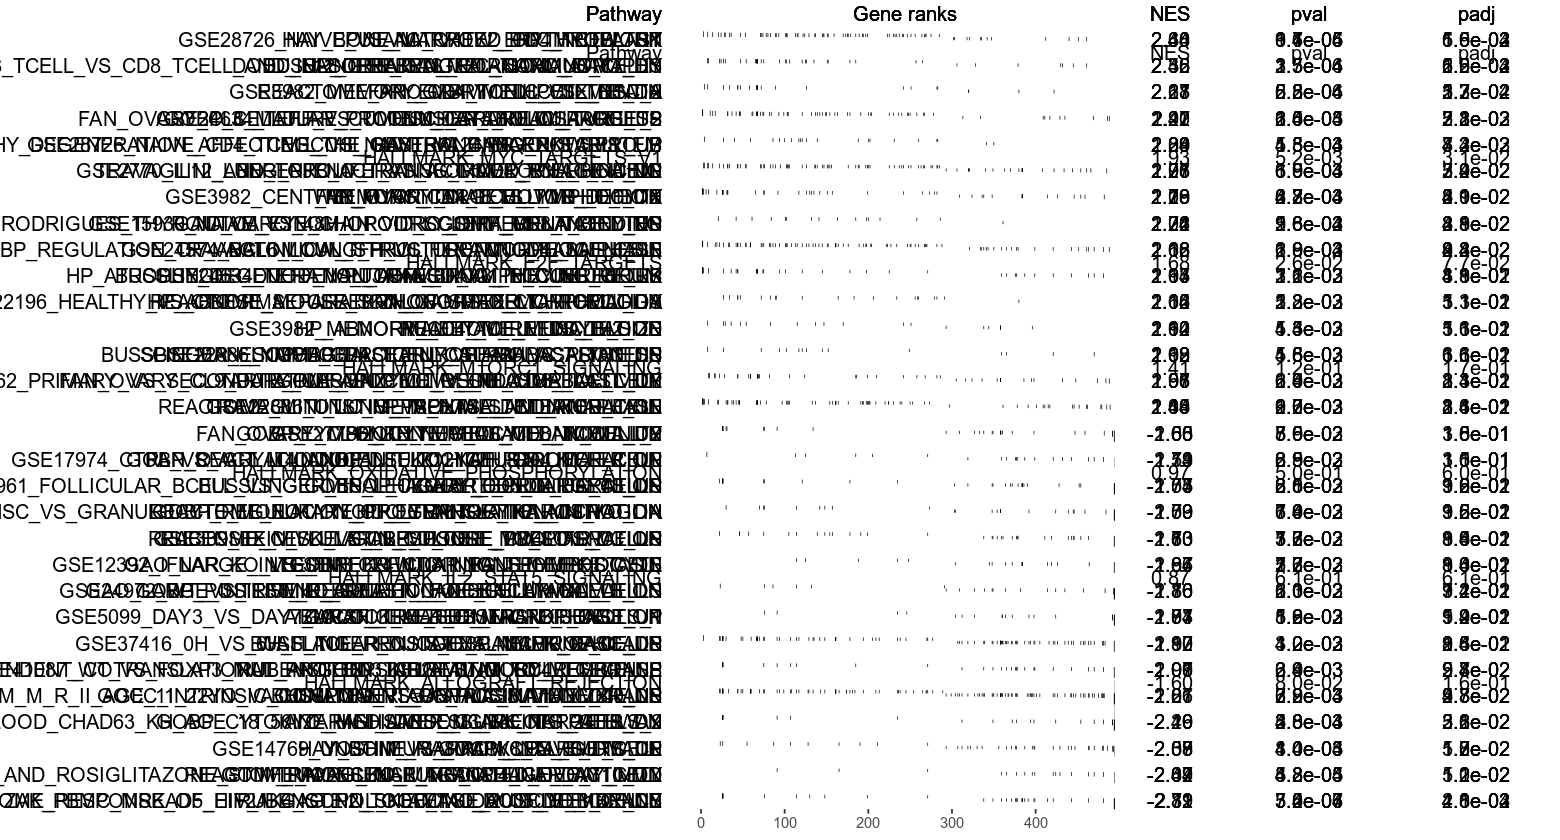

In [275]:
# for (category in all_pathways){
#     genesig_df = msigdbr(species = "human", category = category)
#     genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
#     pathways = genesig_pathways

#     ranks = -1*sign(dge$Dosage)*log10(dge$pval)
#     names(ranks) = dge$gene
#     fgseaRes = all_res[[category]][[name]][[ranks_name]] %>% as.data.table


#     topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=15), pathway]
#     topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=15), pathway]
#     topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
#     # fig.size(7, 13)
#     plotGseaTable(pathways[topPathways], ranks, fgseaRes,# render=FALSE,
#                   gseaParam=0.5,# title = paste0(': ', name, ' transcriptional cluster')
#                  )
    

# }


In [292]:
library(gridExtra)
library(grid)


plotGseaTable <- function(pathways, stats, fgseaRes,
                          gseaParam=1,
                          colwidths=c(5, 3, 0.8, 1.2, 1.2),
                          render=TRUE, title = '') {

    rnk <- rank(-stats)
    ord <- order(rnk)

    statsAdj <- stats[ord]
    statsAdj <- sign(statsAdj) * (abs(statsAdj) ^ gseaParam)
    statsAdj <- statsAdj / max(abs(statsAdj))

    pathways <- lapply(pathways, function(p) {
        unname(as.vector(na.omit(match(p, names(statsAdj)))))
    })

    # fixes #40
    pathways <- pathways[sapply(pathways, length) > 0]

    ps <- lapply(names(pathways), function(pn) {
        p <- pathways[[pn]]
        annotation <- fgseaRes[match(pn, fgseaRes$pathway), ]
        list(
            textGrob(pn, just="right", x=unit(0.95, "npc")),
            ggplot() +
                # ggtitle('TITLE TEST1')+
                geom_segment(aes(x=p, xend=p,
                                 y=0, yend=statsAdj[p]),
                             size=0.2) +
                scale_x_continuous(limits=c(0, length(statsAdj)),
                                   expand=c(0, 0)) +
                scale_y_continuous(limits=c(-1, 1),
                                   expand=c(0, 0)) +
                xlab(NULL) + ylab(NULL) +
                theme(panel.background = element_blank(),
                      axis.line=element_blank(),
                      axis.text=element_blank(),
                      axis.ticks=element_blank(),
                      panel.grid = element_blank(),
                      axis.title=element_blank(),
                      plot.margin = rep(unit(0,"null"),4),
                      panel.spacing = rep(unit(0,"null"),4)
                ),
            textGrob(sprintf("%.2f", annotation$NES)),
            textGrob(sprintf("%.1e", annotation$pval)),
            textGrob(sprintf("%.1e", annotation$padj))
            )
    })


    rankPlot <-
        ggplot() +
        geom_blank() +
        scale_x_continuous(limits=c(0, length(statsAdj)),
                           expand=c(0, 0)) +
        scale_y_continuous(limits=c(-1, 1),
                           expand=c(0, 0)) +
        xlab(NULL) + ylab(NULL) +
        theme(#plot.title.position = 'top',
            panel.background = element_blank(),
              axis.line=element_blank(),
              axis.text.y=element_blank(),
              axis.ticks.y=element_blank(),
              panel.grid = element_blank(),
              axis.title=element_blank(),
              plot.margin = unit(c(0,0,0.5,0), "npc"),
              panel.spacing = unit(c(0,0,0,0), "npc")
        )

    grobs <- c(
        lapply(c("Pathway", paste0("Gene ranks", title), "NES", "pval", "padj"), textGrob),
        unlist(ps, recursive = FALSE),
        list(nullGrob(),
             rankPlot,
             nullGrob(),
             nullGrob(),
             nullGrob()))

    # not drawing column if corresponding colwidth is set to zero
    grobsToDraw <- rep(colwidths != 0, length(grobs)/length(colwidths))


    p <- arrangeGrob(grobs=grobs[grobsToDraw],
                 ncol=sum(colwidths != 0),
                 widths=colwidths[colwidths != 0])

    if (render) {
        grid.draw(p)
    } else {
        p
    }
}




Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:gdata’:

    combine




In [278]:
all_pathways

[1] "H"  "C2" "C5" "C7" "C8"

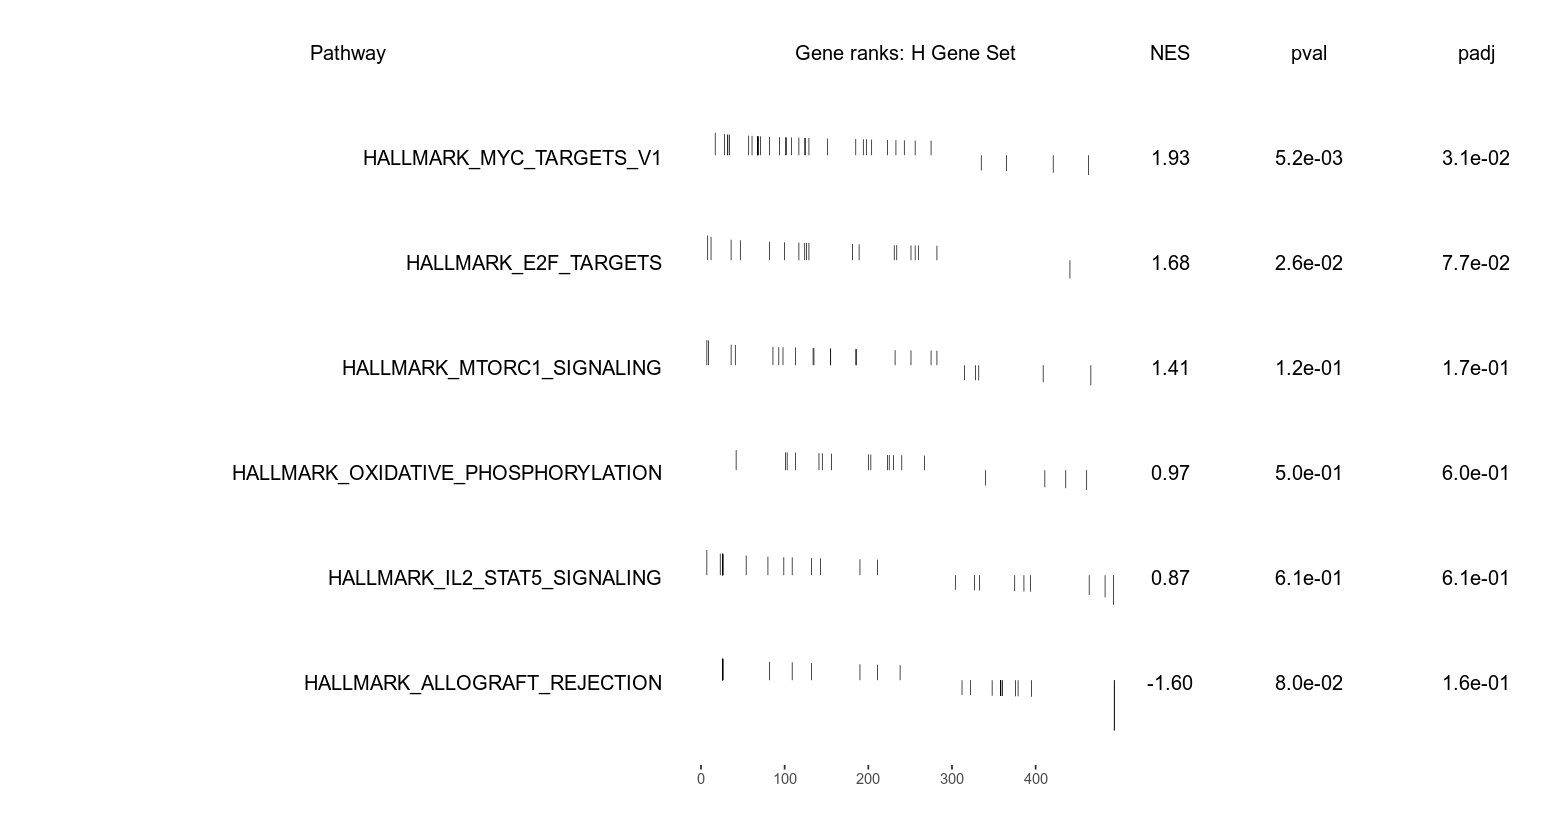

In [296]:
category = 'H'

genesig_df = msigdbr(species = "human", category = category)
genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
pathways = genesig_pathways

ranks = -1*sign(dge$Dosage)*log10(dge$pval)
names(ranks) = dge$gene
fgseaRes = all_res[[category]][[name]][[ranks_name]] %>% as.data.table


topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=15), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=15), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
# fig.size(7, 13)
plotGseaTable(pathways[topPathways], ranks, fgseaRes,# render=FALSE,
              gseaParam=0.5, title = paste0(': ', category, ' Gene Set')
             )



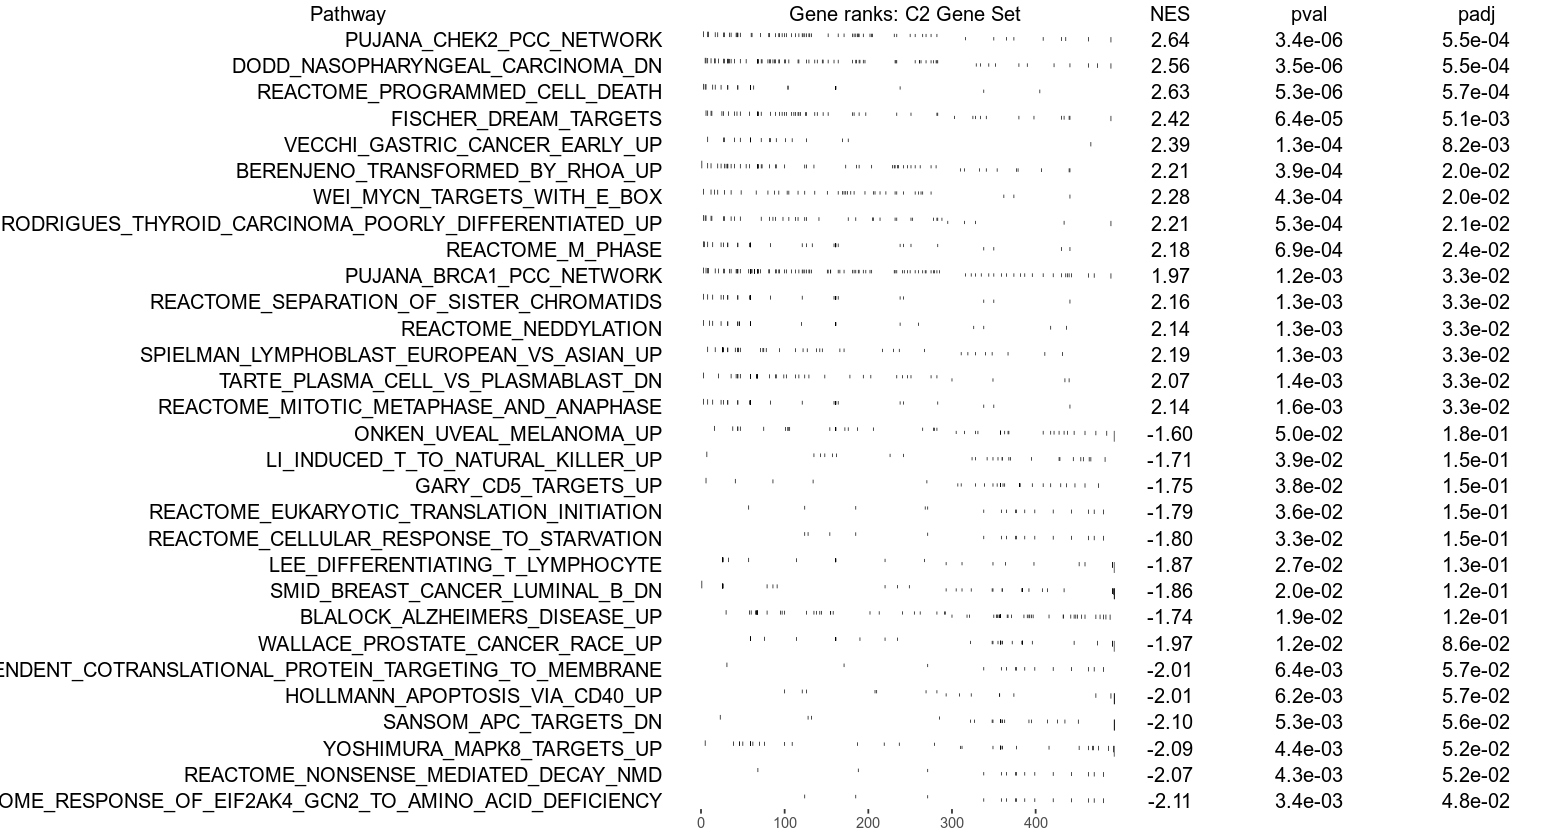

In [297]:
category = 'C2'

genesig_df = msigdbr(species = "human", category = category)
genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
pathways = genesig_pathways

ranks = -1*sign(dge$Dosage)*log10(dge$pval)
names(ranks) = dge$gene
fgseaRes = all_res[[category]][[name]][[ranks_name]] %>% as.data.table


topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=15), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=15), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
# fig.size(7, 13)
plotGseaTable(pathways[topPathways], ranks, fgseaRes,# render=FALSE,
              gseaParam=0.5, title = paste0(': ', category, ' Gene Set')
             )



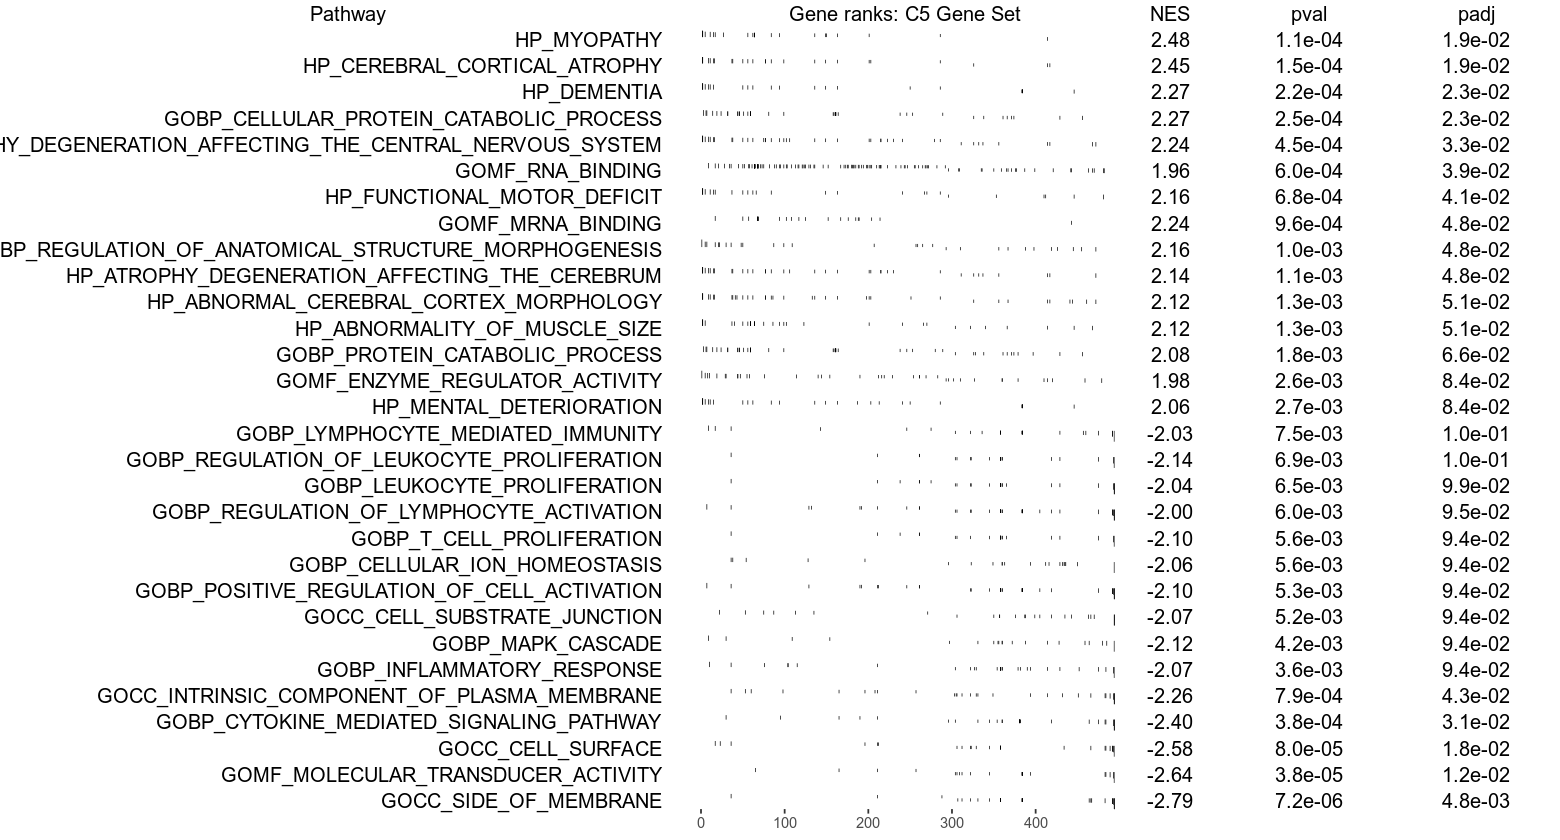

In [298]:
category = 'C5'

genesig_df = msigdbr(species = "human", category = category)
genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
pathways = genesig_pathways

ranks = -1*sign(dge$Dosage)*log10(dge$pval)
names(ranks) = dge$gene
fgseaRes = all_res[[category]][[name]][[ranks_name]] %>% as.data.table


topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=15), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=15), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
# fig.size(7, 13)
plotGseaTable(pathways[topPathways], ranks, fgseaRes,# render=FALSE,
              gseaParam=0.5, title = paste0(': ', category, ' Gene Set')
             )



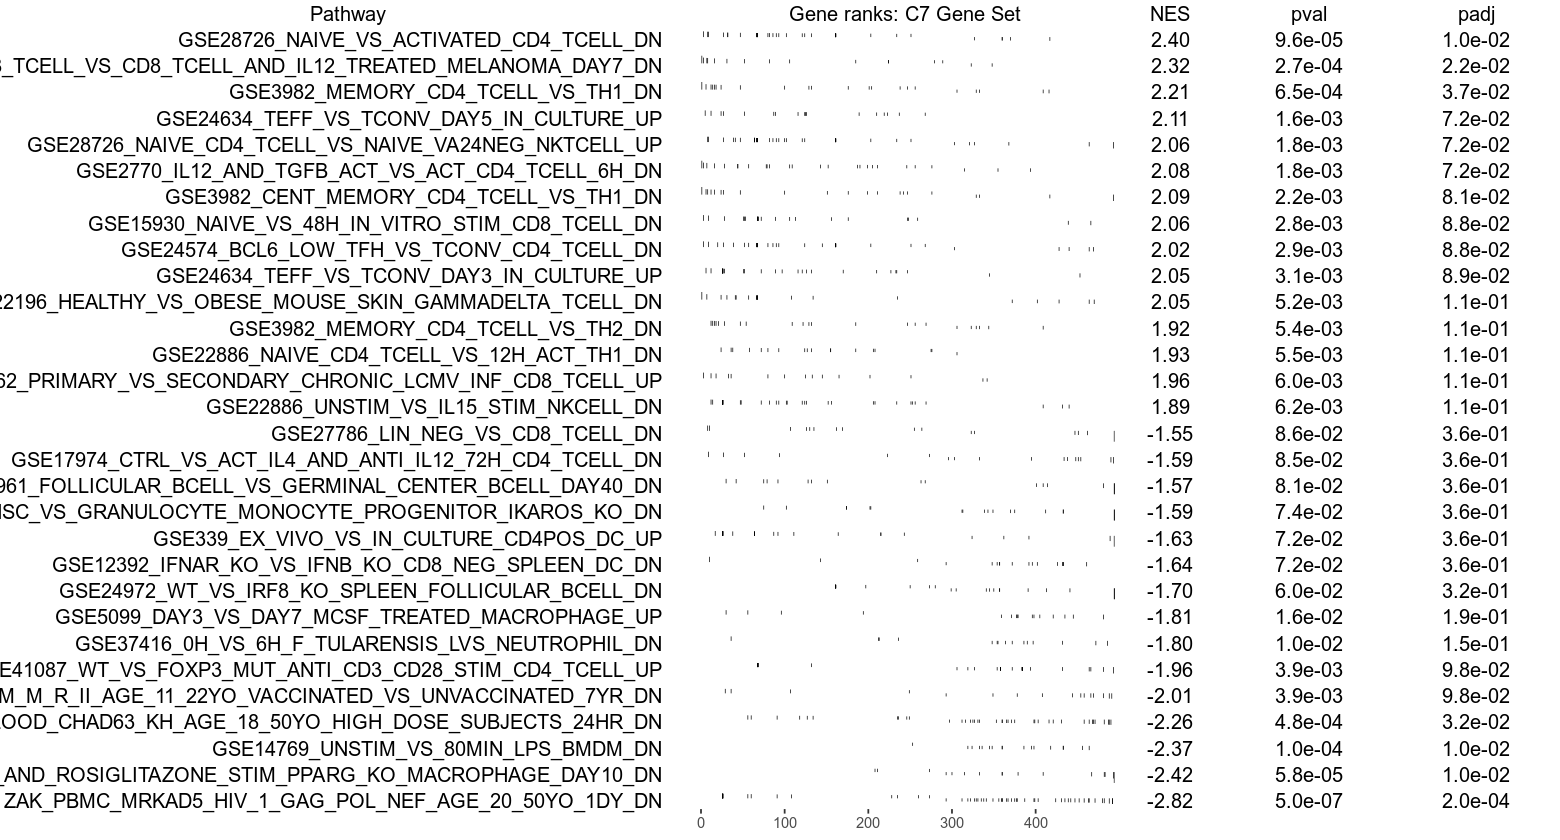

In [299]:
category = 'C7'

genesig_df = msigdbr(species = "human", category = category)
genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
pathways = genesig_pathways

ranks = -1*sign(dge$Dosage)*log10(dge$pval)
names(ranks) = dge$gene
fgseaRes = all_res[[category]][[name]][[ranks_name]] %>% as.data.table


topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=15), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=15), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
# fig.size(7, 13)
plotGseaTable(pathways[topPathways], ranks, fgseaRes,# render=FALSE,
              gseaParam=0.5, title = paste0(': ', category, ' Gene Set')
             )


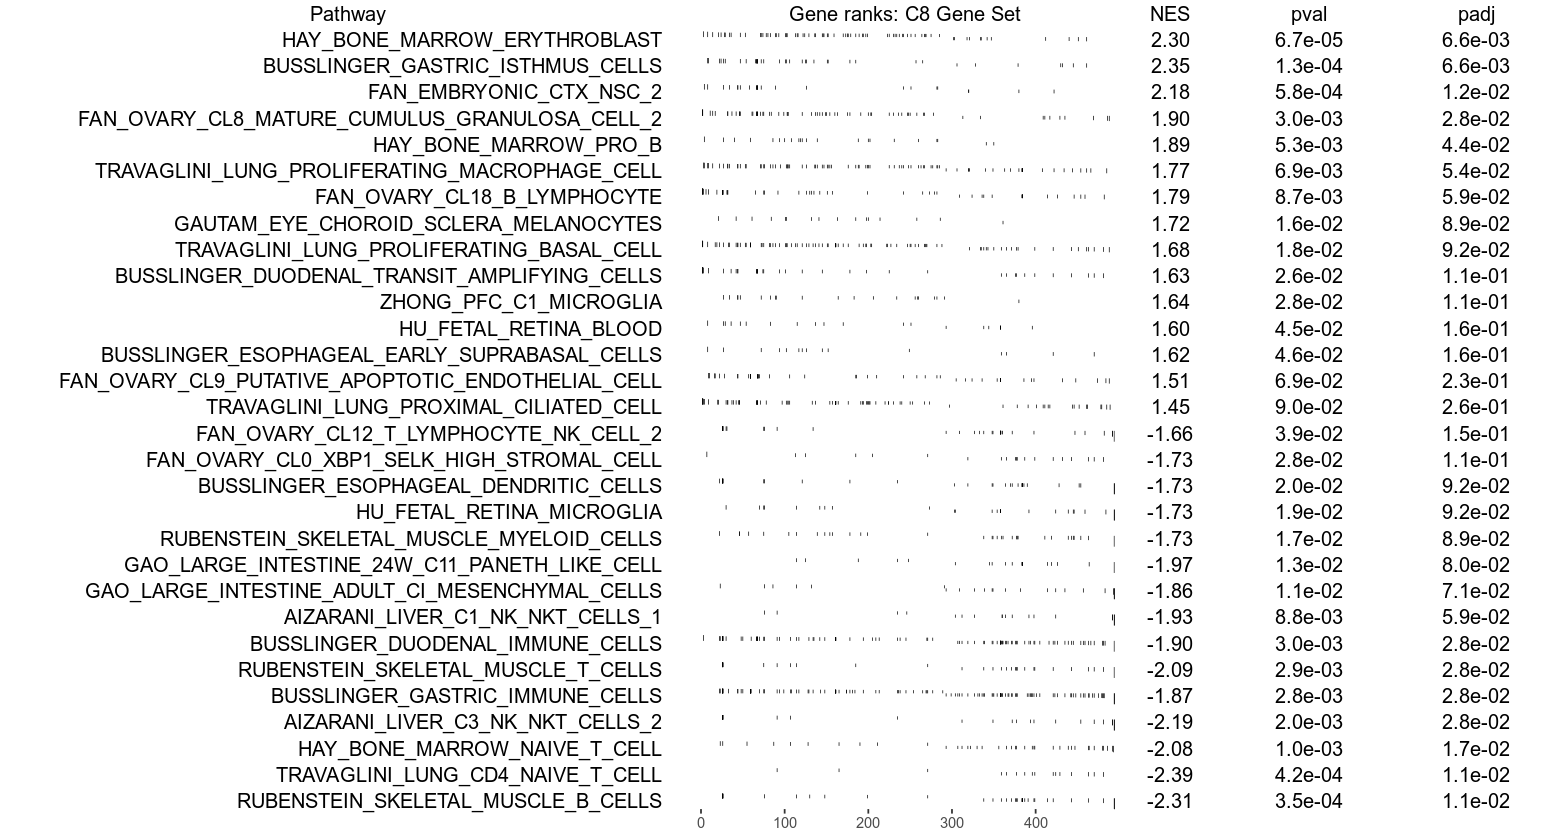

In [300]:
category = 'C8'

genesig_df = msigdbr(species = "human", category = category)
genesig_pathways = split(x = genesig_df$gene_symbol, f = genesig_df$gs_name)
pathways = genesig_pathways

ranks = -1*sign(dge$Dosage)*log10(dge$pval)
names(ranks) = dge$gene
fgseaRes = all_res[[category]][[name]][[ranks_name]] %>% as.data.table


topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=15), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=15), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
# fig.size(7, 13)
plotGseaTable(pathways[topPathways], ranks, fgseaRes,# render=FALSE,
              gseaParam=0.5, title = paste0(': ', category, ' Gene Set')
             )



In [285]:
dge_all %>% filter(padjBH < 0.1)

gene      (Intercept) log10(nUMI.y) PlateP3     PlateP4    
1  MT-ND4     -4.425969  2.078477       0.28409152  0.26856559
2  TNFRSF4    -4.655002  2.084593       0.03033283  0.14226673
3  TRBC2      -5.858240  2.232350       0.18699033  0.09293436
4  PRDX1     -10.764354  2.971206       0.10027563 -0.01354446
5  PSMA5     -10.348666  2.729204       0.14387717 -0.19195699
6  XBP1       -9.078811  2.454108       0.19835737 -0.20987214
7  PTTG1      -9.728530  2.571053      -0.14994119 -0.44178706
8  CHCHD10   -10.795611  2.797628      -0.16662413  0.06944594
9  PTPRC      -8.554177  2.305599       0.30193346  0.16286289
10 DCTN3      -7.704257  1.917886      -0.18737895 -0.12663380
11 LINC01281  -8.685909  2.314100      -0.20419011 -0.22517316
12 SOCS3      -8.593957  1.928629       0.21456843 -0.02291247
13 PMAIP1    -15.321284  3.567407       0.39393382 -0.08420366
14 TIPIN     -11.530528  2.292712       0.67952881  0.46818195
15 DLG2       -7.984640  1.617612       0.11348277  0.19651222
16 DNM1L     -11.804175  2.380960       0.07427539 -0.09288627
17 NEMP1     -10.501714  2.417655      -0.30243313  0.09565859
18 PRSS23     -7.582522  1.697349      -0.20399916 -0.28065280
19 RAMP1      -8.375323  1.581896      -0.23949185 -0.39496095
20 ANXA3     -13.905199  2.672523       0.23053509  0.03674371
   Individual_Index10038222 Individual_Index10049338 Dosage     pval        
1  -0.110648992             -0.003069593              0.1016669 2.192569e-04
2  -0.161358057              0.104888835             -0.2655130 2.734006e-06
3  -0.430046949             -0.091059646             -0.2327188 4.336259e-05
4  -0.003583211             -0.151628254              0.1815989 1.369852e-04
5   0.129618358             -0.126724517              0.2177328 3.242493e-05
6  -0.313300044             -0.306184065              0.2680131 9.867138e-05
7   0.206720740              0.205075093              0.2783726 1.332768e-04
8  -0.291797364             -0.010548232              0.3430807 4.501331e-06
9  -0.193086499             -0.239063246             -0.6669936 1.110223e-16
10  0.245523472              0.175182324              0.2815874 5.681105e-05
11  0.217966204             -0.466821647             -0.4191378 1.171707e-04
12 -0.561995838             -0.217529470              0.3977640 1.445655e-04
13 -0.079094212             -0.287025520              0.4395479 9.224821e-05
14  0.072534016              0.121616604              0.4261324 3.451137e-04
15 -0.268522026              0.379270898             -0.4002765 3.177748e-04
16  0.185033705              0.437408649              0.5670664 9.154879e-05
17 -0.657785989             -0.672322163             -0.6065611 1.654019e-04
18 -0.616470247              0.766190552             -0.6773286 1.922113e-04
19  2.028815934              3.124281425             -0.7562096 1.915767e-04
20  0.896366435              0.225228462              0.8834488 1.544349e-08
   padjBH      
1  6.753112e-02
2  5.052443e-03
3  4.006703e-02
4  5.724795e-02
5  3.595276e-02
6  5.470341e-02
7  5.724795e-02
8  6.238844e-03
9  6.155076e-13
10 4.499435e-02
11 5.724795e-02
12 5.724795e-02
13 5.470341e-02
14 9.566551e-02
15 9.272335e-02
16 5.470341e-02
17 6.113255e-02
18 6.268350e-02
19 6.268350e-02
20 4.280935e-05

In [362]:
ranks_name = '-sign(dosage)*log10(pval)'
name = 'all'

In [366]:
all_res[['H']][['all']][['-sign(dosage)*log10(pval)']] %>% filter(NES > 0, padj < 0.05) %>% arrange(padj) %>% select(-leadingEdge)


pathway                            pval         padj         log2err  
1 HALLMARK_MYC_TARGETS_V1            2.150681e-08 9.462998e-07 0.7337620
2 HALLMARK_E2F_TARGETS               2.646334e-05 3.881289e-04 0.5756103
3 HALLMARK_OXIDATIVE_PHOSPHORYLATION 2.312800e-03 2.544080e-02 0.4317077
4 HALLMARK_G2M_CHECKPOINT            3.408323e-03 2.999325e-02 0.4317077
5 HALLMARK_MTORC1_SIGNALING          4.441102e-03 3.256808e-02 0.4070179
  ES        NES      size
1 0.5118501 1.947263 187 
2 0.4808251 1.784701 149 
3 0.4061361 1.532388 168 
4 0.4119348 1.511894 141 
5 0.3995946 1.486394 156

In [367]:
all_res[['C2']][['all']][['-sign(dosage)*log10(pval)']] %>% filter(NES > 0, padj < 0.05) %>% arrange(padj) %>% select(-leadingEdge)


pathway                                                                                                                  
1   TARTE_PLASMA_CELL_VS_PLASMABLAST_DN                                                                                      
2   KEGG_PARKINSONS_DISEASE                                                                                                  
3   KEGG_OXIDATIVE_PHOSPHORYLATION                                                                                           
4   WONG_EMBRYONIC_STEM_CELL_CORE                                                                                            
5   WEI_MYCN_TARGETS_WITH_E_BOX                                                                                              
6   WP_ELECTRON_TRANSPORT_CHAIN_OXPHOS_SYSTEM_IN_MITOCHONDRIA                                                                
7   REACTOME_APC_C_MEDIATED_DEGRADATION_OF_CELL_CYCLE_PROTEINS                                                               
8   REACTOME_METABOLISM_OF_POLYAMINES                                                                                        
9   REACTOME_UCH_PROTEINASES                                                                                                 
10  MANALO_HYPOXIA_DN                                                                                                        
11  REACTOME_APOPTOSIS                                                                                                       
12  BERENJENO_TRANSFORMED_BY_RHOA_UP                                                                                         
13  RODRIGUES_THYROID_CARCINOMA_POORLY_DIFFERENTIATED_UP                                                                     
14  GRADE_COLON_AND_RECTAL_CANCER_UP                                                                                         
15  REACTOME_APC_C_CDH1_MEDIATED_DEGRADATION_OF_CDC20_AND_OTHER_APC_C_CDH1_TARGETED_PROTEINS_IN_LATE_MITOSIS_EARLY_G1        
16  REACTOME_CROSS_PRESENTATION_OF_SOLUBLE_EXOGENOUS_ANTIGENS_ENDOSOMES                                                      
17  REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SYNTHESIS_BY_CHEMIOSMOTIC_COUPLING_AND_HEAT_PRODUCTION_BY_UNCOUPLING_PROTEINS
18  SOTIRIOU_BREAST_CANCER_GRADE_1_VS_3_UP                                                                                   
19  STARK_PREFRONTAL_CORTEX_22Q11_DELETION_DN                                                                                
20  WINNEPENNINCKX_MELANOMA_METASTASIS_UP                                                                                    
21  WONG_MITOCHONDRIA_GENE_MODULE                                                                                            
22  KEGG_SPLICEOSOME                                                                                                         
23  REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS                                                                            
24  KEGG_PROTEASOME                                                                                                          
25  MUELLER_PLURINET                                                                                                         
26  KEGG_HUNTINGTONS_DISEASE                                                                                                 
27  REACTOME_HEDGEHOG_LIGAND_BIOGENESIS                                                                                      
28  RHODES_CANCER_META_SIGNATURE                                                                                             
29  REACTOME_REGULATION_OF_MRNA_STABILITY_BY_PROTEINS_THAT_BIND_AU_RICH_ELEMENTS                                             
30  TIEN_INTESTINE_PROBIOTICS_24HR_UP                                                                                        
⋮   ⋮                                                                                             

In [368]:
all_res[['C5']][['all']][['-sign(dosage)*log10(pval)']] %>% filter(NES > 0, padj < 0.05) %>% arrange(padj) %>% select(-leadingEdge)


pathway                                                             
1   GOBP_ATP_METABOLIC_PROCESS                                          
2   GOCC_MITOCHONDRIAL_PROTEIN_CONTAINING_COMPLEX                       
3   HP_INCREASED_SERUM_LACTATE                                          
4   GOBP_OXIDATIVE_PHOSPHORYLATION                                      
5   GOCC_MITOCHONDRIAL_ENVELOPE                                         
6   GOCC_INNER_MITOCHONDRIAL_MEMBRANE_PROTEIN_COMPLEX                   
7   HP_SLOW_DECREASE_IN_VISUAL_ACUITY                                   
8   GOCC_ORGANELLE_INNER_MEMBRANE                                       
9   GOBP_ATP_SYNTHESIS_COUPLED_ELECTRON_TRANSPORT                       
10  GOBP_PROTON_TRANSMEMBRANE_TRANSPORT                                 
11  GOCC_PROTEASOME_COMPLEX                                             
12  GOCC_RESPIRASOME                                                    
13  GOCC_PEPTIDASE_COMPLEX                                              
14  HP_ABNORMALITY_OF_ACID_BASE_HOMEOSTASIS                             
15  HP_ENCEPHALOPATHY                                                   
16  HP_ABNORMALITY_OF_THE_MITOCHONDRION                                 
17  HP_EPISODIC_VOMITING                                                
18  HP_INCREASED_CSF_LACTATE                                            
19  HP_BLURRED_VISION                                                   
20  HP_PIGMENTARY_RETINOPATHY                                           
21  GOMF_OXIDOREDUCTION_DRIVEN_ACTIVE_TRANSMEMBRANE_TRANSPORTER_ACTIVITY
22  GOCC_ENDOPEPTIDASE_COMPLEX                                          
23  GOBP_REGULATION_OF_CHROMOSOME_ORGANIZATION                          
24  HP_ABNORMAL_CSF_METABOLITE_LEVEL                                    
25  GOMF_PROTON_TRANSMEMBRANE_TRANSPORTER_ACTIVITY                      
26  HP_ABNORMALITY_OF_RETINAL_PIGMENTATION                              
27  GOBP_MITOCHONDRION_ORGANIZATION                                     
28  GOBP_AEROBIC_RESPIRATION                                            
29  HP_VENTRICULAR_PREEXCITATION                                        
30  HP_HYPERTROPHIC_CARDIOMYOPATHY                                      
⋮   ⋮                                                                   
124 GOCC_FICOLIN_1_RICH_GRANULE                                         
125 HP_ABNORMAL_GLUCOSE_HOMEOSTASIS                                     
126 GOBP_GLUTAMINE_FAMILY_AMINO_ACID_METABOLIC_PROCESS                  
127 GOBP_MITOCHONDRIAL_RNA_METABOLIC_PROCESS                            
128 GOBP_PROTEASOMAL_PROTEIN_CATABOLIC_PROCESS                          
129 HP_DECREASED_ACTIVITY_OF_THE_PYRUVATE_DEHYDROGENASE_COMPLEX         
130 HP_EXTERNAL_OPHTHALMOPLEGIA                                         
131 HP_RETINAL_VASCULAR_TORTUOSITY                                      
132 HP_LEFT_VENTRICULAR_HYPERTROPHY                                     
133 HP_ABNORMAL_GASTROINTESTINAL_MOTILITY                               
134 GOBP_NUCLEOSIDE_PHOSPHATE_BIOSYNTHETIC_PROCESS                      
135 GOBP_APOPTOTIC_MITOCHONDRIAL_CHANGES                                
136 HP_PROXIMAL_TUBULOPATHY                                             
137 GOBP_RIBONUCLEOSIDE_TRIPHOSPHATE_BIOSYNTHETIC_PROCESS               
138 HP_MIGRAINE                                                         
139 HP_MUSCLE_FIBRILLATION                                              
140 HP_ABNORMAL_RETINAL_VASCULAR_MORPHOLOGY                             
141 GOBP_RIBONUCLEOSIDE_TRIPHOSPHATE_METABOLIC_PROCESS                  
142 GOBP_POSITIVE_REGULATION_OF_CHROMOSOME_ORGANIZATION                 
143 GOCC_OXIDOREDUCTASE_COMPLEX                                         
144 HP_GENERALIZED_MYOCLONIC_SEIZURE                                    
145 HP_CARDIAC_CONDUCTION_ABNORMALITY                                   
146 GOCC_PROTEASOME_ACCESSORY_COMPLEX                         

In [369]:
all_res[['C8']][['all']][['-sign(dosage)*log10(pval)']] %>% filter(NES > 0, padj < 0.05) %>% arrange(padj) %>% select(-leadingEdge)


pathway                                              pval        
1  FAN_OVARY_CL8_MATURE_CUMULUS_GRANULOSA_CELL_2        8.961098e-10
2  ZHONG_PFC_MAJOR_TYPES_NPCS                           1.464542e-05
3  HAY_BONE_MARROW_PRO_B                                2.069909e-05
4  GAUTAM_EYE_IRIS_CILIARY_BODY_SMOOTH_MUSCLE_CELLS     2.525422e-05
5  BUSSLINGER_GASTRIC_ISTHMUS_CELLS                     5.454947e-05
6  ZHONG_PFC_C1_MICROGLIA                               6.889539e-05
7  ZHONG_PFC_C8_ORG_PROLIFERATING                       7.123578e-05
8  GAUTAM_EYE_CHOROID_SCLERA_MELANOCYTES                1.621194e-04
9  FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOSA_CELL 2.688805e-04
10 ZHONG_PFC_C2_UNKNOWN_NPC                             5.080170e-04
11 FAN_OVARY_CL15_SMALL_ANTRAL_FOLLICLE_GRANULOSA_CELL  5.398033e-04
12 MENON_FETAL_KIDNEY_7_LOOPOF_HENLE_CELLS_DISTAL       6.566515e-04
13 HAY_BONE_MARROW_EARLY_ERYTHROBLAST                   8.249839e-04
14 FAN_EMBRYONIC_CTX_NSC_2                              9.130769e-04
15 TRAVAGLINI_LUNG_PROLIFERATING_NK_T_CELL              9.075308e-04
16 BUSSLINGER_GASTRIC_PARIETAL_CELLS                    1.158390e-03
17 BUSSLINGER_DUODENAL_TRANSIT_AMPLIFYING_CELLS         1.651089e-03
18 DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_UNSPECIFIED  3.690704e-03
19 MANNO_MIDBRAIN_NEUROTYPES_HPROGFPM                   3.924090e-03
20 HAY_BONE_MARROW_EOSINOPHIL                           4.928301e-03
21 FAN_OVARY_CL18_B_LYMPHOCYTE                          5.262719e-03
22 MANNO_MIDBRAIN_NEUROTYPES_HPROGBP                    5.354045e-03
23 BUSSLINGER_DUODENAL_DIFFERENTIATING_STEM_CELLS       6.302284e-03
24 FAN_EMBRYONIC_CTX_MICROGLIA_1                        8.654128e-03
   padj         log2err   ES        NES      size
1  3.647167e-07 0.8012156 0.4220961 1.757350 470 
2  5.920114e-04 0.5933255 0.5374199 1.864505  95 
3  7.020440e-04 0.5756103 0.4414656 1.706140 203 
4  7.341762e-04 0.5756103 0.4747230 1.771538 151 
5  1.273003e-03 0.5573322 0.4103766 1.629232 258 
6  1.380617e-03 0.5384341 0.4382618 1.680156 190 
7  1.380617e-03 0.5384341 0.6230194 1.875361  42 
8  2.572028e-03 0.5188481 0.4822925 1.732419 112 
9  3.530141e-03 0.4984931 0.3934385 1.542517 230 
10 5.441130e-03 0.4772708 0.5792860 1.803090  49 
11 5.633332e-03 0.4772708 0.3508798 1.448117 410 
12 6.363265e-03 0.4772708 0.4091355 1.560588 182 
13 7.631101e-03 0.4772708 0.5398479 1.757303  63 
14 7.906857e-03 0.4772708 0.4241278 1.592913 155 
15 7.906857e-03 0.4772708 0.4688536 1.660755 106 
16 9.429299e-03 0.4550599 0.4172985 1.569515 154 
17 1.244432e-02 0.4550599 0.4012532 1.514221 163 
18 2.503527e-02 0.4317077 0.6980548 1.736201  17 
19 2.618205e-02 0.4070179 0.4023565 1.492263 144 
20 2.993759e-02 0.4070179 0.5889406 1.691043  32 
21 3.124844e-02 0.4070179 0.3385108 1.377406 337 
22 3.124844e-02 0.4070179 0.4011778 1.461359 123 
23 3.466256e-02 0.4070179 0.3584469 1.416595 250 
24 4.295403e-02 0.3807304 0.4065963 1.451636 109

In [363]:
output = all_res[['C7']][['all']][['-sign(dosage)*log10(pval)']] %>% filter(NES > 0, padj < 0.05) %>% arrange(padj) %>% select(-leadingEdge)
output

pathway                                                                    
1  GSE22886_UNSTIM_VS_IL15_STIM_NKCELL_DN                                     
2  GSE22886_UNSTIM_VS_IL2_STIM_NKCELL_DN                                      
3  GSE36826_WT_VS_IL1R_KO_SKIN_STAPH_AUREUS_INF_UP                            
4  GSE24634_TREG_VS_TCONV_POST_DAY5_IL4_CONVERSION_UP                         
5  GSE29164_CD8_TCELL_VS_CD8_TCELL_AND_IL12_TREATED_MELANOMA_DAY7_DN          
6  GSE2770_IL12_AND_TGFB_ACT_VS_ACT_CD4_TCELL_6H_DN                           
7  GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN                                   
8  GSE18893_TCONV_VS_TREG_24H_TNF_STIM_UP                                     
9  GSE41867_DAY6_VS_DAY8_LCMV_ARMSTRONG_EFFECTOR_CD8_TCELL_DN                 
10 GSE23505_IL6_IL1_VS_IL6_IL1_TGFB_TREATED_CD4_TCELL_DN                      
11 GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_DN                                 
12 GSE24574_BCL6_LOW_TFH_VS_TCONV_CD4_TCELL_DN                                
13 GSE26156_DOUBLE_POSITIVE_VS_CD4_SINGLE_POSITIVE_THYMOCYTE_DN               
14 GSE33162_UNTREATED_VS_4H_LPS_STIM_HDAC3_KO_MACROPHAGE_DN                   
15 GSE32986_UNSTIM_VS_GMCSF_AND_CURDLAN_LOWDOSE_STIM_DC_UP                    
16 GSE22886_NEUTROPHIL_VS_DC_DN                                               
17 GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_OLD_DN                      
18 GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN                                         
19 GSE24634_TEFF_VS_TCONV_DAY5_IN_CULTURE_UP                                  
20 GSE12845_IGD_NEG_BLOOD_VS_NAIVE_TONSIL_BCELL_UP                            
21 GSE15930_NAIVE_VS_48H_IN_VITRO_STIM_CD8_TCELL_DN                           
22 GSE45837_WT_VS_GFI1_KO_PDC_DN                                              
23 GSE4984_GALECTIN1_VS_VEHICLE_CTRL_TREATED_DC_DN                            
24 GSE40274_CTRL_VS_XBP1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN                    
25 GAUCHER_PBMC_YF_VAX_STAMARIL_UNKNOWN_AGE_14DY_UP                           
26 GSE27859_DC_VS_CD11C_INT_F480_INT_DC_DN                                    
27 GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL_OLD_DN                      
28 GSE13485_DAY1_VS_DAY21_YF17D_VACCINE_PBMC_DN                               
29 GSE3982_CENT_MEMORY_CD4_TCELL_VS_TH1_DN                                    
30 GSE13547_CTRL_VS_ANTI_IGM_STIM_BCELL_12H_UP                                
⋮  ⋮                                                                          
45 GSE27291_6H_VS_7D_STIM_GAMMADELTA_TCELL_UP                                 
46 GSE12845_IGD_POS_VS_NEG_BLOOD_BCELL_DN                                     
47 GSE3982_MAST_CELL_VS_CENT_MEMORY_CD4_TCELL_UP                              
48 GSE20727_CTRL_VS_ROS_INH_AND_DNFB_ALLERGEN_TREATED_DC_DN                   
49 GSE14908_ATOPIC_VS_NONATOPIC_PATIENT_HDM_STIM_CD4_TCELL_DN                 
50 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_DN                                 
51 GSE28726_NAIVE_CD4_TCELL_VS_NAIVE_VA24NEG_NKTCELL_UP                       
52 GSE3982_EOSINOPHIL_VS_TH1_DN                                               
53 GSE5679_CTRL_VS_RARA_AGONIST_AM580_TREATED_DC_UP                           
54 GSE7568_IL4_VS_IL4_AND_DEXAMETHASONE_TREATED_MACROPHAGE_UP                 
55 VAN_DEN_BIGGELAAR_PBMC_PREVNAR_9MO_INFANT_STIMULATED_VS_UNSTIMULATED_9MO_UP
56 GSE21927_BALBC_VS_C57BL6_MONOCYTE_TUMOR_UP                                 
57 GSE37605_TREG_VS_TCONV_C57BL6_FOXP3_IRES_GFP_DN                            
58 GSE22886_NEUTROPHIL_VS_MONOCYTE_DN                                         
59 GSE24142_ADULT_VS_FETAL_EARLY_THYMIC_PROGENITOR_DN                         
60 GSE15624_CTRL_VS_6H_HALOFUGINONE_TREATED_CD4_TCELL_DN                      
61 GSE29617_CTRL_VS_TIV_FLU_VACCINE_PBMC_2008_DN                              
62 GSE3982_MAC_VS_NEUTROPHIL_LPS_STIM_UP                                      
63 KAECH_DAY8_EFF_VS_DAY15_EFF_CD8_TCELL_UP          

In [364]:
write_delim(output, "../Misc/CD45_GSEA.tsv", delim = "\t", col_names = TRUE)

In [49]:
length(ranks)

[1] 20

In [ ]:
# run_gsea <- function(clus, name, pathways = pathways, dge_FS_SV = dge_FS_SV){
    
#     ### Modidfy ranks from just logFC
#     dge_clus = dge_FS_SV %>% filter(group == clus)
#     ranks <- -1*sign(dge_clus$logFC)*log10(dge_clus$pval) #dge_clus$logFC 
#     names(ranks) <- dge_clus$feature

#     # fig.size(5, 8)
#     # print(barplot(sort(ranks, decreasing = T), main = names(clusters)[clusters==clus]))
    
#     fgseaRes <- fgsea(pathways = pathways, #immune_pathways, 
#                       stats    = ranks,
#                       minSize  = 15,
#                       maxSize  = 500)


# #     topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=15), pathway]
# #     topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=15), pathway]
# #     topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
# #     fig.size(7, 15)
# #     plotGseaTable(pathways[topPathways], ranks, fgseaRes,# render=FALSE,
# #                   gseaParam=0.5, title = paste0(': ', name, ' transcriptional cluster'))
    
#         # fig.size(8, 10)
#     ggplot(rbind(fgseaRes %>% filter(padj < 0.05) %>% filter(ES > 0) %>% arrange(padj) %>% head (15) ,
#           fgseaRes %>% filter(padj < 0.05) %>% filter(ES < 0) %>% arrange(padj) %>% head (15)), 
#            aes(reorder(pathway, NES), NES)) +
#         # geom_point(size = 4) +
#         # geom_vline(xintercept = 0, size = 2) + 
#     geom_col()+
#       coord_flip() +
#       labs(x="Pathway", y="Normalized Enrichment Score",
#            title=paste0(name#,"\nPathways NES from GSEA"
#                        )) + 
#       theme_minimal(base_size = 20)


# }

In [31]:
dge

gene    (Intercept) log10(nUMI.y) PlateP3       PlateP4     
1   MT-CO2  -3.5006194  2.130221      -0.13827120    0.018954251
2   MALAT1   0.2594335  1.074377      -0.11083920   -0.016030636
3   TMSB10  -2.4553364  1.660458      -0.65099613   -0.338659113
4   RPL10   -4.0642373  2.128046      -0.27020974   -0.156026197
5   RPL3    -5.3756914  2.456338       0.14788238    0.146953201
6   MT-ND4  -4.4259691  2.078477       0.28409152    0.268565595
7   RPS6    -4.6581179  2.176813      -0.13162439   -0.009284912
8   RPL6    -7.3175655  2.556347       0.08880872    0.071339313
9   RPL32   -3.5846973  1.635311      -0.70767002   -0.359669173
10  RPL15   -5.2920275  2.224837      -0.24771868   -0.128515200
11  RPL12   -4.5061421  1.856933      -0.58405732   -0.328318979
12  RPL10A  -4.7362604  1.958686      -0.40749827   -0.160905983
13  ASTN2   -5.2392512  1.945691      -0.16387207    0.012845651
14  RPL14   -4.9579276  1.995558      -0.34915678   -0.193983488
15  RPL7    -5.9750339  2.207241      -0.05262168    0.117168964
16  UBA52   -5.0911409  1.932372      -0.73014198   -0.431767876
17  PLPP3   -5.6630672  2.134180      -0.11370402   -0.010237456
18  MT-ND1  -6.4389027  2.346595      -0.02708170   -0.167103828
19  HLA-E   -5.5792958  2.050916       0.01422731   -0.103053378
20  MYL12A  -6.1171229  2.045952      -0.01815682   -0.086583955
21  IL2RA   -6.5579441  2.386719       0.10919499    0.121199787
22  NOP53   -6.1447813  2.147126       0.04040118   -0.010611702
23  PFN1    -7.2465873  2.453293      -0.18020013   -0.153634170
24  DDIT4   -4.6629506  1.945556      -0.02402629   -0.163832832
25  TNFRSF4 -4.6550017  2.084593       0.03033283    0.142266733
26  CFL1    -8.7598533  2.788407       0.11547086    0.045696760
27  CD82    -7.7288648  2.516256       0.14048968    0.228050688
28  H2AFZ   -9.7469981  2.946715       0.11251219    0.005802383
29  CD52    -4.8835484  1.765568      -0.56904130   -0.078460375
30  TRBC2   -5.8582399  2.232350       0.18699033    0.092934364
⋮   ⋮       ⋮           ⋮             ⋮             ⋮           
465 GTF2H1  -12.201556  2.566078      -0.2544588631  0.04935140 
466 MAFF    -11.368510  2.344556       0.7694080688  0.53814635 
467 GRAP2   -11.046370  2.306322      -0.0717308912  0.34530845 
468 DHODH   -10.110659  2.313203      -0.2076828236 -0.29792527 
469 ANO9     -8.602425  1.995953      -0.6946418473 -0.89297224 
470 DOHH    -16.696882  3.783044       0.1556989942  0.27786968 
471 VPS37C  -17.108738  3.924882       0.0807599671  0.24855386 
472 TMPRSS3 -10.903055  2.333125      -0.3592661467  0.42223485 
473 EXOC5   -10.196053  2.166012       0.4335275177  0.22601269 
474 RABIF   -14.804912  3.094207       0.0196136782 -0.07465594 
475 NCF1     -5.252784  1.232092      -0.4099188193  0.43482310 
476 SLC7A6   -7.966522  1.605272      -0.4146850943 -0.54230302 
477 IVD     -15.968113  3.400847       0.5101179030  0.62066088 
478 NEMP1   -10.501714  2.417655      -0.3024331349  0.09565859 
479 GADD45G  -4.350083  1.000281      -0.2787182156 -0.16899128 
480 FBXO5   -17.899030  3.921509       0.2970514526  0.39669938 
481 AKAP8L   -9.004507  1.788003       0.1635645845 -0.09142041 
482 FLYWCH2 -11.364612  2.336281      -0.4201345679 -0.39249430 
483 CCDC18  -16.571041  3.759600       0.1885458197  0.43272410 
484 PRELID2 -11.204095  2.358024       0.3441492067  0.48456119 
485 FAM98A   -9.742153  1.863699      -0.0954030958  0.18531076 
486 CUX1     -8.924984  1.994440      -0.4846238863  0.31458367 
487 PTGER2   -7.341183  1.439513      -0.0003376752  0.35714609 
488 PRSS23   -7.582522  1.697349      -0.2039991605 -0.28065280 
489 RAMP1    -8.375323  1.581896      -0.2394918542 -0.39496095 
490 PHYH    -15.500921  3.491515       0.1572382307  0.08256512 
491 DDX23    -9.025788  1.677674       0.0768956141  0.11554756 
492 CAAP1   -11.113508  2.351346      -0.6320556812 -0.61620255 
493 ANXA3   -13.905199  2.672523       0.2305350902  0.03674371 
494 ANAPC7  -15.677556  3.533059      -

In [ ]:
run_gsea(clus = 0, name = 'T', immune_pathways, dge_FS_SV = dge_FS_scaled)


In [ ]:
run_gsea(clus = 1, name = 'B', immune_pathways, dge_FS_SV = dge_FS_scaled)

In [ ]:
# plotEnrichment(examplePathways[["5991130_Programmed_Cell_Death"]],
#                exampleRanks) + labs(title="Programmed Cell Death")


## Filter to just T-cell C7 pathways

In [24]:
category = 'C7'

In [25]:
genesig_df = msigdbr(species = "human", category = category)


In [27]:
genesig_df[['gs_name']] %>% unique %>% length

[1] 5219

In [26]:
include_terms = 'CD4_TCELL|CD4|TREG|TH17|TH1|TH2|TFH'

exclude_terms = 'BCELL|MYELOID|THYMOCYTE|INNATE_LYMPHOID_CELL|POS_DC|WEAK_DC|CD40|PBMC_VS_MEM_CD4_TCELL|HEMATOPOIETIC_STEM_CELL|LYMPHOID_PRIMED_MPP|BASOPHIL|_DC_VS_|EOSINOPHI|MAC_VS|MAST_CELL|NEUTROPHIL|NKCELL|PROGENITOR|LSK|LIN_NEG_VS|NKTCELL'




In [28]:
pathway_names_filt = (genesig_df[['gs_name']] %>% unique)[(grepl(include_terms, 
               genesig_df[['gs_name']] %>% unique))
        &(!grepl(exclude_terms, 
      genesig_df[['gs_name']] %>% unique))]


In [29]:
genesig_df_filt = genesig_df %>% filter(gs_name %in% pathway_names_filt)

genesig_pathways = split(x = genesig_df_filt$gene_symbol, f = genesig_df_filt$gs_name)
pathways = genesig_pathways


In [30]:
length(pathways)

[1] 1111

In [31]:
# Use all genes
name = 'all'
dge = dge_all # %>% filter(padjBH < 0.1)   

ranks_name = '-sign(dosage)*log10(pval)'

# if (ranks_name=='-sign(dosage)*log10(pval)'){
ranks = -1*sign(dge$Dosage)*log10(dge$pval)
# }
# else if (ranks_name=='-dosage*log10(pval)'){
#     ranks = -1*(dge$Dosage)*log10(dge$pval)}
# else {ranks = dge$Dosage}

names(ranks) = dge$gene
ranks = sort(ranks)

gsea_res = fgsea(pathways = pathways, 
              stats    = ranks,
              minSize  = 15,
              maxSize  = 500)

res = gsea_res %>% as.data.frame


In [32]:
((res %>% filter(padj < 0.05))['NES']>0 )%>% table

.
FALSE  TRUE 
   14    22 

In [33]:
res %>% filter(padj < 0.05) %>% select(-leadingEdge) %>% arrange(desc(NES))

pathway                                                                  
1  GSE2770_IL12_AND_TGFB_ACT_VS_ACT_CD4_TCELL_6H_DN                         
2  GSE24634_TREG_VS_TCONV_POST_DAY5_IL4_CONVERSION_UP                       
3  GSE18893_TCONV_VS_TREG_24H_TNF_STIM_UP                                   
4  GSE23505_IL6_IL1_VS_IL6_IL1_TGFB_TREATED_CD4_TCELL_DN                    
5  GSE3982_CENT_MEMORY_CD4_TCELL_VS_TH1_DN                                  
6  GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN                                 
7  GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_DN                               
8  GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN                                       
9  GSE24574_BCL6_LOW_TFH_VS_TCONV_CD4_TCELL_DN                              
10 GSE40274_CTRL_VS_XBP1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN                  
11 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_DN                               
12 GSE3982_EFF_MEMORY_CD4_TCELL_VS_TH1_DN                                   
13 GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_DN                                 
14 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_DN                               
15 GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_OLD_DN                    
16 GSE14908_ATOPIC_VS_NONATOPIC_PATIENT_HDM_STIM_CD4_TCELL_DN               
17 GSE37532_TREG_VS_TCONV_PPARG_KO_CD4_TCELL_FROM_VISCERAL_ADIPOSE_TISSUE_UP
18 GSE14415_INDUCED_TREG_VS_FAILED_INDUCED_TREG_UP                          
19 GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL_OLD_DN                    
20 GSE14415_ACT_VS_CTRL_NATURAL_TREG_UP                                     
21 GSE3982_MEMORY_CD4_TCELL_VS_TH2_DN                                       
22 GSE24634_NAIVE_CD4_TCELL_VS_DAY5_IL4_CONV_TREG_DN                        
23 GSE43863_DAY6_EFF_VS_DAY150_MEM_LY6C_INT_CXCR5POS_CD4_TCELL_UP           
24 GSE24634_NAIVE_CD4_TCELL_VS_DAY3_IL4_CONV_TREG_UP                        
25 GSE21670_UNTREATED_VS_IL6_TREATED_STAT3_KO_CD4_TCELL_UP                  
26 GSE2770_IL4_ACT_VS_ACT_CD4_TCELL_48H_DN                                  
27 GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP                               
28 GSE21670_STAT3_KO_VS_WT_CD4_TCELL_TGFB_IL6_TREATED_DN                    
29 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_UP                               
30 GSE7852_LN_VS_FAT_TREG_DN                                                
31 GSE43863_TH1_VS_TFH_MEMORY_CD4_TCELL_DN                                  
32 GSE43863_NAIVE_VS_MEMORY_TFH_CD4_TCELL_D150_LCMV_UP                      
33 GSE3039_CD4_TCELL_VS_ALPHABETA_CD8_TCELL_UP                              
34 GSE18893_TCONV_VS_TREG_2H_TNF_STIM_DN                                    
35 GSE43863_TH1_VS_LY6C_INT_CXCR5POS_EFFECTOR_CD4_TCELL_DN                  
36 GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP                 
   pval         padj         log2err   ES         NES       size
1  9.243699e-07 0.0006195344 0.6594444  0.5350569  1.960723 128 
2  1.136760e-06 0.0006195344 0.6435518  0.5051470  1.871945 143 
3  4.403670e-06 0.0010275167 0.6105269  0.5043956  1.871843 145 
4  6.796197e-06 0.0012346424 0.6105269  0.5141431  1.869094 121 
5  2.661063e-06 0.0009668529 0.6272567  0.4965419  1.840056 143 
6  1.125879e-05 0.0017531548 0.5933255  0.4884151  1.817122 150 
7  4.018514e-05 0.0054752259 0.5573322  0.4719983  1.753986 144 
8  5.839591e-05 0.0067241381 0.5573322  0.4692189  1.745382 148 
9  6.598313e-05 0.0067241381 0.5384341  0.4647865  1.730924 154 
10 5.309492e-04 0.0251623761 0.4772708  0.5039346  1.730779  86 
11 6.785827e-05 0.0067241381 0.5384341  0.4539639  1.699240 157 
12 5.099605e-04 0.0251623761 0.4772708  0.4585542  1.680131 131 
13 1.267916e-03 0.0383896740 0.4550599  0.4772643  1.675089  94 
14 3.112938e-04 0.0205462338 0.4984931  0.4572935  1.674029 125 
15 3.405520e-04 0.0206223155 0.4984931  0.4471853  1.659140 146 
16 1.120676e-03 0.0359275515 0.4550599  0.4607736  1.651787 108 
17 1.234642e-03 0.0383896740 0.4550599  0.4591076

In [34]:
res_filt = res %>% filter(padj < 0.05)  %>% arrange(desc(NES))

rownames(res_filt) = res_filt$pathway

In [35]:
res_filt['rank'] = seq(1, dim(res_filt)[1])

res_filt['rev_rank'] = rev(res_filt[['rank']])

In [565]:
res_filt

pathway                                                                  
1  GSE2770_IL12_AND_TGFB_ACT_VS_ACT_CD4_TCELL_6H_DN                         
2  GSE24634_TREG_VS_TCONV_POST_DAY5_IL4_CONVERSION_UP                       
3  GSE18893_TCONV_VS_TREG_24H_TNF_STIM_UP                                   
4  GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN                                 
5  GSE23505_IL6_IL1_VS_IL6_IL1_TGFB_TREATED_CD4_TCELL_DN                    
6  GSE40274_CTRL_VS_XBP1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN                  
7  GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_OLD_DN                    
8  GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_DN                               
9  GSE3982_CENT_MEMORY_CD4_TCELL_VS_TH1_DN                                  
10 GSE24574_BCL6_LOW_TFH_VS_TCONV_CD4_TCELL_DN                              
11 GSE37605_TREG_VS_TCONV_C57BL6_FOXP3_IRES_GFP_DN                          
12 GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN                                       
13 GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL_OLD_DN                    
14 GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_YOUNG_DN                  
15 GSE3982_EFF_MEMORY_CD4_TCELL_VS_TH1_DN                                   
16 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_DN                               
17 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_DN                               
18 GSE15624_CTRL_VS_6H_HALOFUGINONE_TREATED_CD4_TCELL_DN                    
19 GSE3982_MEMORY_CD4_TCELL_VS_TH2_DN                                       
20 GSE14908_ATOPIC_VS_NONATOPIC_PATIENT_HDM_STIM_CD4_TCELL_DN               
21 GSE24634_TREG_VS_TCONV_POST_DAY3_IL4_CONVERSION_UP                       
22 GSE40274_CTRL_VS_LEF1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN                  
23 GSE24210_RESTING_TREG_VS_TCONV_DN                                        
24 GSE37532_TREG_VS_TCONV_PPARG_KO_CD4_TCELL_FROM_VISCERAL_ADIPOSE_TISSUE_UP
25 GSE39820_CTRL_VS_TGFBETA1_IL6_CD4_TCELL_UP                               
26 GSE14415_INDUCED_TREG_VS_FAILED_INDUCED_TREG_UP                          
27 GSE24634_NAIVE_CD4_TCELL_VS_DAY5_IL4_CONV_TREG_DN                        
28 GSE14415_ACT_VS_CTRL_NATURAL_TREG_UP                                     
29 GSE36476_YOUNG_VS_OLD_DONOR_MEMORY_CD4_TCELL_72H_TSST_ACT_DN             
30 GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP                               
31 GSE18893_CTRL_VS_TNF_TREATED_TREG_24H_UP                                 
32 GSE24634_NAIVE_CD4_TCELL_VS_DAY5_IL4_CONV_TREG_UP                        
33 GSE24210_RESTING_TREG_VS_TCONV_UP                                        
34 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_UP                               
35 GSE40274_FOXP3_VS_FOXP3_AND_GATA1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN      
36 GSE37605_C57BL6_VS_NOD_FOXP3_FUSION_GFP_TREG_DN                          
37 GSE24634_TREG_VS_TCONV_POST_DAY5_IL4_CONVERSION_DN                       
38 GSE24634_NAIVE_CD4_TCELL_VS_DAY3_IL4_CONV_TREG_UP                        
39 GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT_CD4_TCELL_DN              
40 GSE43863_DAY6_EFF_VS_DAY150_MEM_LY6C_INT_CXCR5POS_CD4_TCELL_UP           
41 GSE43863_TH1_VS_TFH_MEMORY_CD4_TCELL_DN                                  
42 GSE7852_LN_VS_FAT_TREG_DN                                                
43 GSE21670_UNTREATED_VS_IL6_TREATED_STAT3_KO_CD4_TCELL_UP                  
44 GSE21670_STAT3_KO_VS_WT_CD4_TCELL_TGFB_IL6_TREATED_DN                    
45 GSE43863_NAIVE_VS_MEMORY_TFH_CD4_TCELL_D150_LCMV_UP                      
46 GSE3039_CD4_TCELL_VS_ALPHABETA_CD8_TCELL_UP                              
47 GSE43863_TH1_VS_LY6C_INT_CXCR5POS_EFFECTOR_CD4_TCELL_DN                  
48 GSE18893_TCONV_VS_TREG_2H_TNF_STIM_DN                                    
49 GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP                 
   pval         padj         log2err   ES         NES       size
1  2.595037e-07 0.0001415593 0.6749629  0.5463462  2.011244 128 
2  1.304611e-07 0.00014

In [587]:
res_filt %>% filter(NES > 0) %>% arrange(pval) %>% select(-leadingEdge)

pathway                                                                  
1  GSE24634_TREG_VS_TCONV_POST_DAY5_IL4_CONVERSION_UP                       
2  GSE2770_IL12_AND_TGFB_ACT_VS_ACT_CD4_TCELL_6H_DN                         
3  GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN                                 
4  GSE18893_TCONV_VS_TREG_24H_TNF_STIM_UP                                   
5  GSE23505_IL6_IL1_VS_IL6_IL1_TGFB_TREATED_CD4_TCELL_DN                    
6  GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_DN                               
7  GSE24574_BCL6_LOW_TFH_VS_TCONV_CD4_TCELL_DN                              
8  GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN                                       
9  GSE3982_CENT_MEMORY_CD4_TCELL_VS_TH1_DN                                  
10 GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_OLD_DN                    
11 GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL_OLD_DN                    
12 GSE40274_CTRL_VS_XBP1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN                  
13 GSE24634_TREG_VS_TCONV_POST_DAY3_IL4_CONVERSION_UP                       
14 GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_YOUNG_DN                  
15 GSE3982_MEMORY_CD4_TCELL_VS_TH2_DN                                       
16 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_DN                               
17 GSE3982_EFF_MEMORY_CD4_TCELL_VS_TH1_DN                                   
18 GSE37605_TREG_VS_TCONV_C57BL6_FOXP3_IRES_GFP_DN                          
19 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_DN                               
20 GSE24210_RESTING_TREG_VS_TCONV_DN                                        
21 GSE14908_ATOPIC_VS_NONATOPIC_PATIENT_HDM_STIM_CD4_TCELL_DN               
22 GSE14415_INDUCED_TREG_VS_FAILED_INDUCED_TREG_UP                          
23 GSE15624_CTRL_VS_6H_HALOFUGINONE_TREATED_CD4_TCELL_DN                    
24 GSE24634_NAIVE_CD4_TCELL_VS_DAY5_IL4_CONV_TREG_DN                        
25 GSE37532_TREG_VS_TCONV_PPARG_KO_CD4_TCELL_FROM_VISCERAL_ADIPOSE_TISSUE_UP
26 GSE40274_CTRL_VS_LEF1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN                  
27 GSE14415_ACT_VS_CTRL_NATURAL_TREG_UP                                     
28 GSE39820_CTRL_VS_TGFBETA1_IL6_CD4_TCELL_UP                               
   pval         padj         log2err   ES        NES      size rank
1  1.304611e-07 0.0001415593 0.6901325 0.5347638 1.991720 142   2  
2  2.595037e-07 0.0001415593 0.6749629 0.5463462 2.011244 128   1  
3  7.864419e-07 0.0002145020 0.6594444 0.5065727 1.900967 150   4  
4  1.722756e-06 0.0003759054 0.6435518 0.5118057 1.914023 146   3  
5  1.181250e-05 0.0018410621 0.5933255 0.5101345 1.865560 122   5  
6  2.521343e-05 0.0029591920 0.5756103 0.4707190 1.761354 145   8  
7  3.024625e-05 0.0029591920 0.5756103 0.4648144 1.746574 157  10  
8  3.504140e-05 0.0029591920 0.5573322 0.4585229 1.717917 149  12  
9  3.672803e-05 0.0029591920 0.5573322 0.4703952 1.758672 144   9  
10 3.797313e-05 0.0029591920 0.5573322 0.4743059 1.776126 147   7  
11 7.062666e-05 0.0048158551 0.5384341 0.4560182 1.706346 145  13  
12 7.803067e-05 0.0050077331 0.5384341 0.5155447 1.806357  87   6  
13 1.609661e-04 0.0083625743 0.5188481 0.4378702 1.640539 149  21  
14 1.931876e-04 0.0094313546 0.5188481 0.4549132 1.684522 135  14  
15 1.988278e-04 0.0094313546 0.5188481 0.4403425 1.655904 153  19  
16 2.105597e-04 0.0095716916 0.5188481 0.4463664 1.676570 158  16  
17 3.161936e-04 0.0135138421 0.4984931 0.4542734 1.683774 131  15  
18 3.278590e-04 0.0135138421 0.4984931 0.4976636 1.738829  85  11  
19 3.344397e-04 0.0135138421 0.4984931 0.4530743 1.667388 126  17  
20 5.260741e-04 0.0185144155 0.4772708 0.4351096 1.612367 137  23  
21 6.406195e-04 0.0218411205 0.4772708 0.4585479 1.655086 109  20  
22 7.421159e-04 0.0238131886 0.4772708 0.4290716 1.589992 137  26  
23 8.741320e-04 0.0264910552 0.4772708 0.4699358 1.662752  95  18  
24 9.976592e-04 0.0294174655 0.4550599 0.4236723 1.578099 140  27  
25 1.612336e-03 0.0429038641 0.4550599 0.4450926 1.606520 109  24  
26

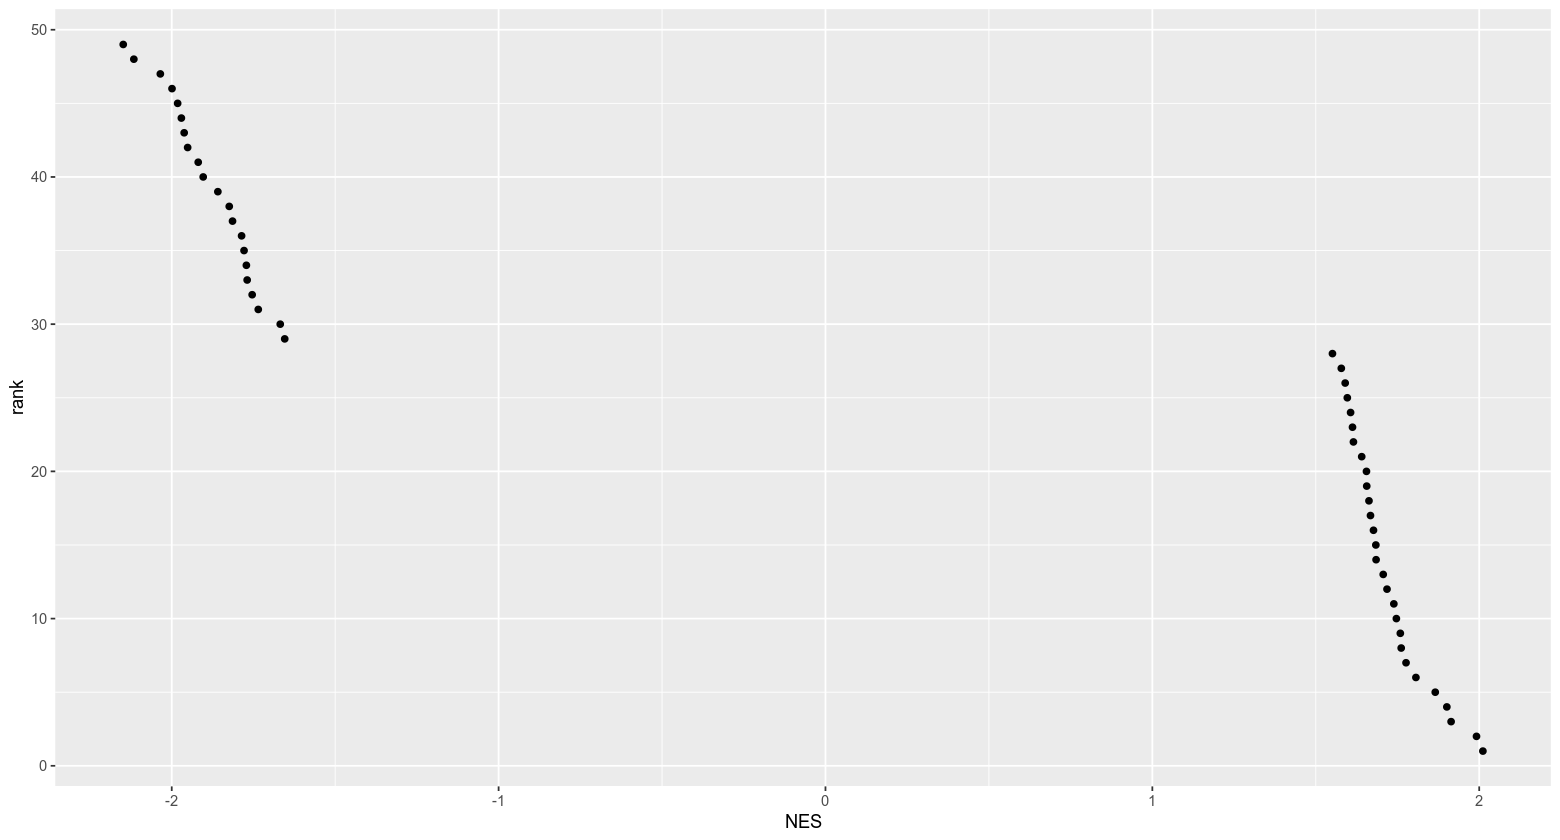

In [492]:
ggplot(res_filt)+
    geom_point(aes(x = NES, y = rank))

In [36]:
res_filt[['pathway_label']] = res_filt[['pathway']] %>% str_split('_', n = 2) %>% map(2) %>% unlist

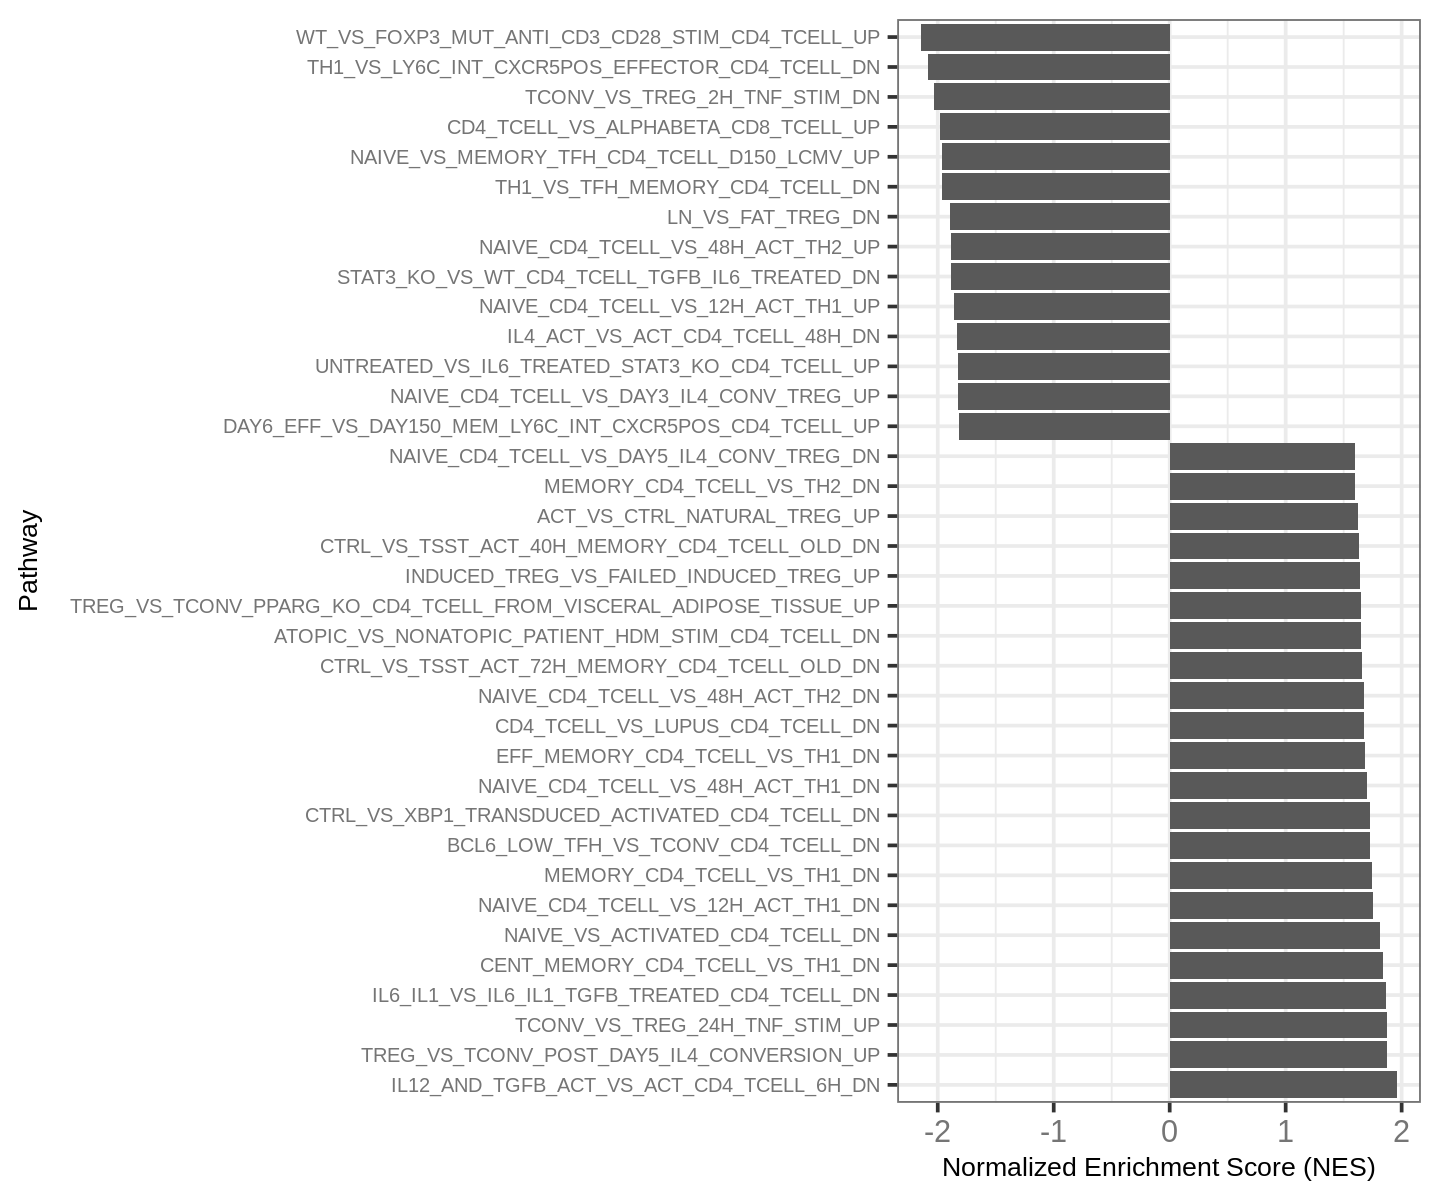

In [37]:
fig.size(10, 12)
ggplot(res_filt)+
    geom_bar(aes(x = NES, y = as.factor(rank)), stat = 'identity')+
    scale_y_discrete(labels = res_filt[['pathway_label']])+
    ylab('Pathway')+
    xlab('Normalized Enrichment Score (NES)')+
    theme_pres()+
    theme(axis.text.y = element_text(size = 12), 
          axis.title.x = element_text(size = 16),axis.title.y = element_text(size = 16),
         )

    

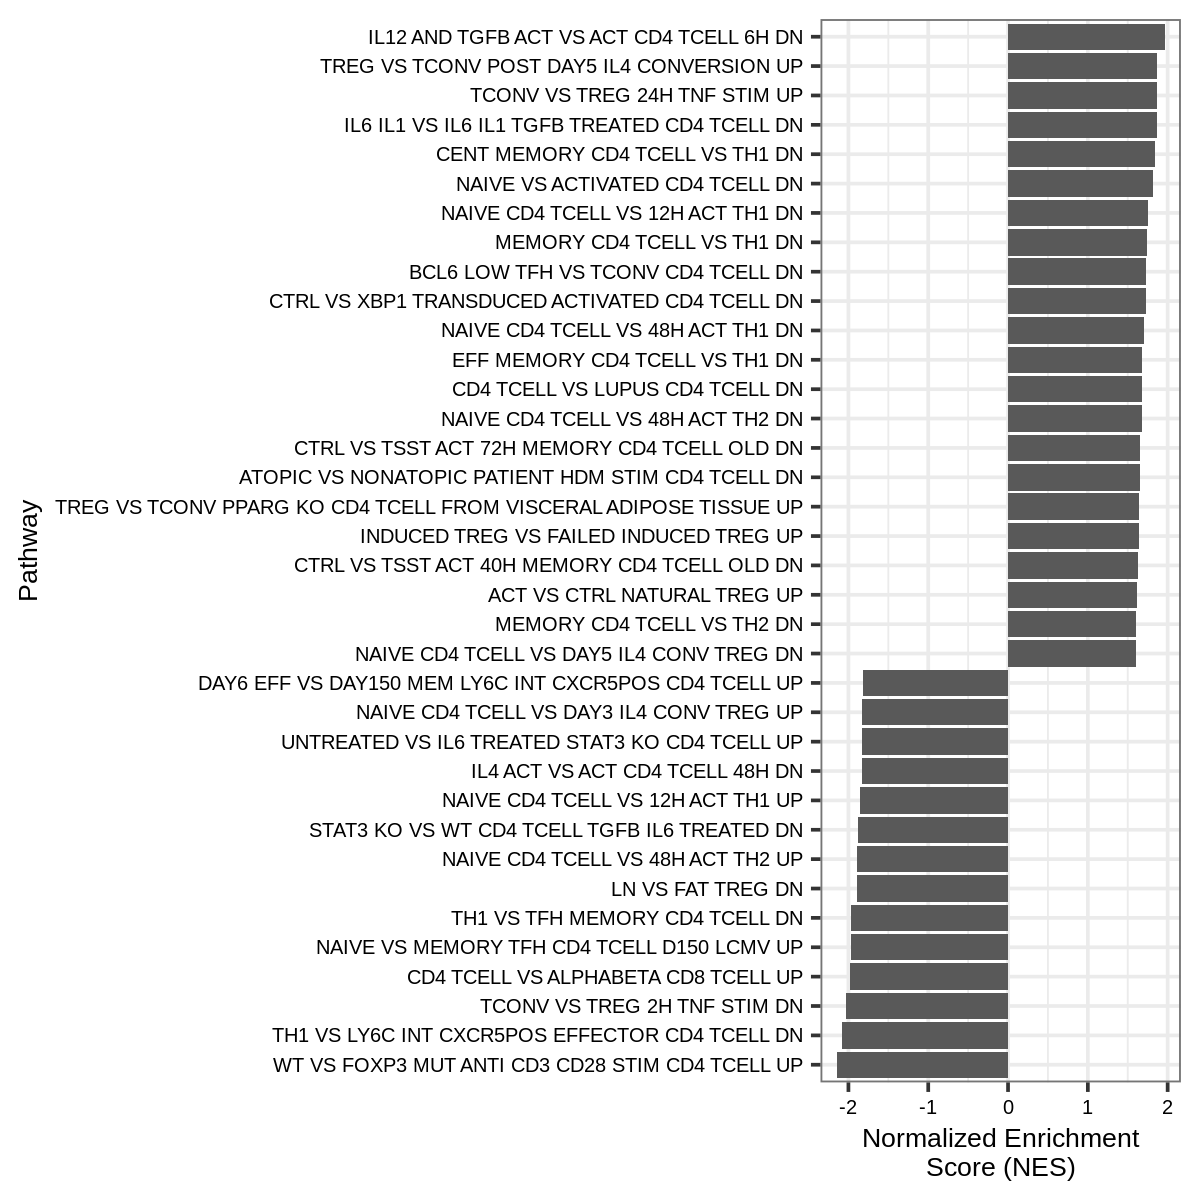

In [49]:
# pdf(file = '../Figures/GSEA_CD45_All.pdf', width = 10, height = 10)

fig.size(10, 10)
ggplot(res_filt)+
    geom_bar(aes(x = NES, y = as.factor(rev_rank)), stat = 'identity')+
    scale_y_discrete(labels = rev(res_filt[['pathway_label']]) %>% str_replace_all('_', ' '))+
    ylab('Pathway')+
    xlab('Normalized Enrichment\nScore (NES)')+
    theme_pres()+
    theme(axis.text.y = element_text(size = 12, color = 'black'), 
          axis.text.x = element_text(size = 12, color = 'black'), 
          axis.title.x = element_text(size = 16),axis.title.y = element_text(size = 16),
         )

# dev.off()

In [41]:
res_filt %>% select(-leadingEdge) %>% head(20)

pathway                                                                  
GSE2770_IL12_AND_TGFB_ACT_VS_ACT_CD4_TCELL_6H_DN                          GSE2770_IL12_AND_TGFB_ACT_VS_ACT_CD4_TCELL_6H_DN                         
GSE24634_TREG_VS_TCONV_POST_DAY5_IL4_CONVERSION_UP                        GSE24634_TREG_VS_TCONV_POST_DAY5_IL4_CONVERSION_UP                       
GSE18893_TCONV_VS_TREG_24H_TNF_STIM_UP                                    GSE18893_TCONV_VS_TREG_24H_TNF_STIM_UP                                   
GSE23505_IL6_IL1_VS_IL6_IL1_TGFB_TREATED_CD4_TCELL_DN                     GSE23505_IL6_IL1_VS_IL6_IL1_TGFB_TREATED_CD4_TCELL_DN                    
GSE3982_CENT_MEMORY_CD4_TCELL_VS_TH1_DN                                   GSE3982_CENT_MEMORY_CD4_TCELL_VS_TH1_DN                                  
GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN                                  GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN                                 
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_DN                                GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_DN                               
GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN                                        GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN                                       
GSE24574_BCL6_LOW_TFH_VS_TCONV_CD4_TCELL_DN                               GSE24574_BCL6_LOW_TFH_VS_TCONV_CD4_TCELL_DN                              
GSE40274_CTRL_VS_XBP1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN                   GSE40274_CTRL_VS_XBP1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN                  
GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_DN                                GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_DN                               
GSE3982_EFF_MEMORY_CD4_TCELL_VS_TH1_DN                                    GSE3982_EFF_MEMORY_CD4_TCELL_VS_TH1_DN                                   
GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_DN                                  GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_DN                                 
GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_DN                                GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_DN                               
GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_OLD_DN                     GSE36476_CTRL_VS_TSST_ACT_72H_MEMORY_CD4_TCELL_OLD_DN                    
GSE14908_ATOPIC_VS_NONATOPIC_PATIENT_HDM_STIM_CD4_TCELL_DN                GSE14908_ATOPIC_VS_NONATOPIC_PATIENT_HDM_STIM_CD4_TCELL_DN               
GSE37532_TREG_VS_TCONV_PPARG_KO_CD4_TCELL_FROM_VISCERAL_ADIPOSE_TISSUE_UP GSE37532_TREG_VS_TCONV_PPARG_KO_CD4_TCELL_FROM_VISCERAL_ADIPOSE_TISSUE_UP
GSE14415_INDUCED_TREG_VS_FAILED_INDUCED_TREG_UP                           GSE14415_INDUCED_TREG_VS_FAILED_INDUCED_TREG_UP                          
GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL_OLD_DN                     GSE36476_CTRL_VS_TSST_ACT_40H_MEMORY_CD4_TCELL_OLD_DN                    
GSE14415_ACT_VS_CTRL_NATURAL_TREG_UP                                      GSE14415_ACT_VS_CTRL_NATURAL_TREG_UP                                     
                                                                          pval        
GSE2770_IL12_AND_TGFB_ACT_VS_ACT_CD4_TCELL_6H_DN                          9.243699e-07
GSE24634_TREG_VS_TCONV_POST_DAY5_IL4_CONVERSION_UP                        1.136760e-06
GSE18893_TCONV_VS_TREG_24H_TNF_STIM_UP                                    4.403670e-06
GSE23505_IL6_IL1_VS_IL6_IL1_TGFB_TREATED_CD4_TCELL_DN                     6.796197e-06
GSE3982_CENT_MEMORY_CD4_TCELL_VS_TH1_DN                                   2.661063e-06
GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN                                  1.125879e-05
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_DN                                4.018514e-05
GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN                                        5.839591e-05
GSE24574_BCL6_LOW_TFH_VS_TCONV_CD4_TCELL_DN                               6.598313e-05
GSE40274_CTRL_VS_XBP1_TRANSDUCED_ACTIVATED_CD4_TCELL_DN                   5.309492e-04
GSE22886_

In [42]:
res_filt %>% select(-leadingEdge) %>% tail(10)

pathway                                                 
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP               GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP              
GSE21670_STAT3_KO_VS_WT_CD4_TCELL_TGFB_IL6_TREATED_DN    GSE21670_STAT3_KO_VS_WT_CD4_TCELL_TGFB_IL6_TREATED_DN   
GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_UP               GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_UP              
GSE7852_LN_VS_FAT_TREG_DN                                GSE7852_LN_VS_FAT_TREG_DN                               
GSE43863_TH1_VS_TFH_MEMORY_CD4_TCELL_DN                  GSE43863_TH1_VS_TFH_MEMORY_CD4_TCELL_DN                 
GSE43863_NAIVE_VS_MEMORY_TFH_CD4_TCELL_D150_LCMV_UP      GSE43863_NAIVE_VS_MEMORY_TFH_CD4_TCELL_D150_LCMV_UP     
GSE3039_CD4_TCELL_VS_ALPHABETA_CD8_TCELL_UP              GSE3039_CD4_TCELL_VS_ALPHABETA_CD8_TCELL_UP             
GSE18893_TCONV_VS_TREG_2H_TNF_STIM_DN                    GSE18893_TCONV_VS_TREG_2H_TNF_STIM_DN                   
GSE43863_TH1_VS_LY6C_INT_CXCR5POS_EFFECTOR_CD4_TCELL_DN  GSE43863_TH1_VS_LY6C_INT_CXCR5POS_EFFECTOR_CD4_TCELL_DN 
GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP
                                                         pval        
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP               6.786349e-04
GSE21670_STAT3_KO_VS_WT_CD4_TCELL_TGFB_IL6_TREATED_DN    5.118995e-04
GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_UP               8.505800e-04
GSE7852_LN_VS_FAT_TREG_DN                                3.945528e-04
GSE43863_TH1_VS_TFH_MEMORY_CD4_TCELL_DN                  1.372737e-04
GSE43863_NAIVE_VS_MEMORY_TFH_CD4_TCELL_D150_LCMV_UP      1.737682e-04
GSE3039_CD4_TCELL_VS_ALPHABETA_CD8_TCELL_UP              3.204458e-04
GSE18893_TCONV_VS_TREG_2H_TNF_STIM_DN                    3.715639e-04
GSE43863_TH1_VS_LY6C_INT_CXCR5POS_EFFECTOR_CD4_TCELL_DN  1.565314e-04
GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP 4.713379e-06
                                                         padj        log2err  
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP               0.029588482 0.4772708
GSE21670_STAT3_KO_VS_WT_CD4_TCELL_TGFB_IL6_TREATED_DN    0.025162376 0.4772708
GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_UP               0.035118335 0.4772708
GSE7852_LN_VS_FAT_TREG_DN                                0.021503128 0.4984931
GSE43863_TH1_VS_TFH_MEMORY_CD4_TCELL_DN                  0.012469029 0.5188481
GSE43863_NAIVE_VS_MEMORY_TFH_CD4_TCELL_D150_LCMV_UP      0.013529098 0.5188481
GSE3039_CD4_TCELL_VS_ALPHABETA_CD8_TCELL_UP              0.020546234 0.4984931
GSE18893_TCONV_VS_TREG_2H_TNF_STIM_DN                    0.021316035 0.4984931
GSE43863_TH1_VS_LY6C_INT_CXCR5POS_EFFECTOR_CD4_TCELL_DN  0.013124556 0.5188481
GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP 0.001027517 0.6105269
                                                         ES         NES      
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP               -0.4989024 -1.857640
GSE21670_STAT3_KO_VS_WT_CD4_TCELL_TGFB_IL6_TREATED_DN    -0.5117314 -1.881929
GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_UP               -0.5125734 -1.888755
GSE7852_LN_VS_FAT_TREG_DN                                -0.5230341 -1.891111
GSE43863_TH1_VS_TFH_MEMORY_CD4_TCELL_DN                  -0.5113035 -1.962751
GSE43863_NAIVE_VS_MEMORY_TFH_CD4_TCELL_D150_LCMV_UP      -0.5345167 -1.963402
GSE3039_CD4_TCELL_VS_ALPHABETA_CD8_TCELL_UP              -0.5728486 -1.976984
GSE18893_TCONV_VS_TREG_2H_TNF_STIM_DN                    -0.5918272 -2.035443
GSE43863_TH1_VS_LY6C_INT_CXCR5POS_EFFECTOR_CD4_TCELL_DN  -0.5880249 -2.082733
GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP -0.5600743 -2.144649
                                                         size rank rev_rank
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP               81   27   10      
GSE21670_STAT3_KO_VS_WT_CD4_TCELL_TGFB_IL6_TREATED_DN    73   28    9      
GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH2_UP               79   29    8      
GS

In [43]:
pname = 'GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN'

In [44]:
show_pathways = c('GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN', 'GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN')

In [614]:
plotEnrichment

function (pathway, stats, gseaParam = 1, ticksSize = 0.2) 
{
    rnk <- rank(-stats)
    ord <- order(rnk)
    statsAdj <- stats[ord]
    statsAdj <- sign(statsAdj) * (abs(statsAdj)^gseaParam)
    statsAdj <- statsAdj/max(abs(statsAdj))
    pathway <- unname(as.vector(na.omit(match(pathway, names(statsAdj)))))
    pathway <- sort(pathway)
    gseaRes <- calcGseaStat(statsAdj, selectedStats = pathway, 
        returnAllExtremes = TRUE)
    bottoms <- gseaRes$bottoms
    tops <- gseaRes$tops
    n <- length(statsAdj)
    xs <- as.vector(rbind(pathway - 1, pathway))
    ys <- as.vector(rbind(bottoms, tops))
    toPlot <- data.frame(x = c(0, xs, n + 1), y = c(0, ys, 0))
    diff <- (max(tops) - min(bottoms))/8
    x = y = NULL
    g <- ggplot(toPlot, aes(x = x, y = y)) + geom_point(color = "green", 
        size = 0.1) + geom_hline(yintercept = max(tops), colour = "red", 
        linetype = "dashed") + geom_hline(yintercept = min(bottoms), 
        colour = "red", linetype = "dashed") + geom_hline(yintercept = 0, 
        colour = "black") + geom_line(color = "green") + theme_bw() + 
        geom_segment(data = data.frame(x = pathway), mapping = aes(x = x, 
            y = -diff/2, xend = x, yend = diff/2), size = ticksSize) + 
        theme(panel.border = element_blank(), panel.grid.minor = element_blank()) + 
        labs(x = "rank", y = "enrichment score")
    g
}
<bytecode: 0x7f4ca18e1c10>
<environment: namespace:fgsea>

In [45]:
plotEnrichment_mod <- function (pathway, stats, gseaParam = 1, ticksSize = 0.2) 
{
    rnk <- rank(-stats)
    ord <- order(rnk)
    statsAdj <- stats[ord]
    statsAdj <- sign(statsAdj) * (abs(statsAdj)^gseaParam)
    statsAdj <- statsAdj/max(abs(statsAdj))
    pathway <- unname(as.vector(na.omit(match(pathway, names(statsAdj)))))
    pathway <- sort(pathway)
    gseaRes <- calcGseaStat(statsAdj, selectedStats = pathway, 
        returnAllExtremes = TRUE)
    bottoms <- gseaRes$bottoms
    tops <- gseaRes$tops
    n <- length(statsAdj)
    xs <- as.vector(rbind(pathway - 1, pathway))
    ys <- as.vector(rbind(bottoms, tops))
    toPlot <- data.frame(x = c(0, xs, n + 1), y = c(0, ys, 0))
    diff <- (max(tops) - min(bottoms))/8
    x = y = NULL
    g <- ggplot(toPlot, aes(x = x, y = y)) + geom_point(color = "green", 
        size = 1) + geom_hline(yintercept = max(tops), colour = "black", 
        linetype = "dashed") + geom_hline(yintercept = min(bottoms), 
        colour = "black", linetype = "dashed") + geom_hline(yintercept = 0, 
        colour = "black") + geom_line(color = "green", size = 1) + theme_bw() + 
        geom_segment(data = data.frame(x = pathway), mapping = aes(x = x, 
            y = -diff/2, xend = x, yend = diff/2), size = ticksSize) + 
        theme(panel.border = element_blank(), panel.grid.minor = element_blank(),
              axis.text = element_text(size =17), axis.title =  element_text(size = 17), 
              title = element_text(size = 17)
             ) + 
        labs(x = "Rank", y = "Enrichment Score (ES)")
    g
}


In [46]:
paste0(pname %>% str_split('_', n = 2) %>% map(2) %>% unlist, '      P=', 
       res_filt[pname, 'padj'] %>% formatC(format = "e", digits = 2))

[1] "NAIVE_VS_ACTIVATED_CD4_TCELL_DN      P=1.75e-03"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


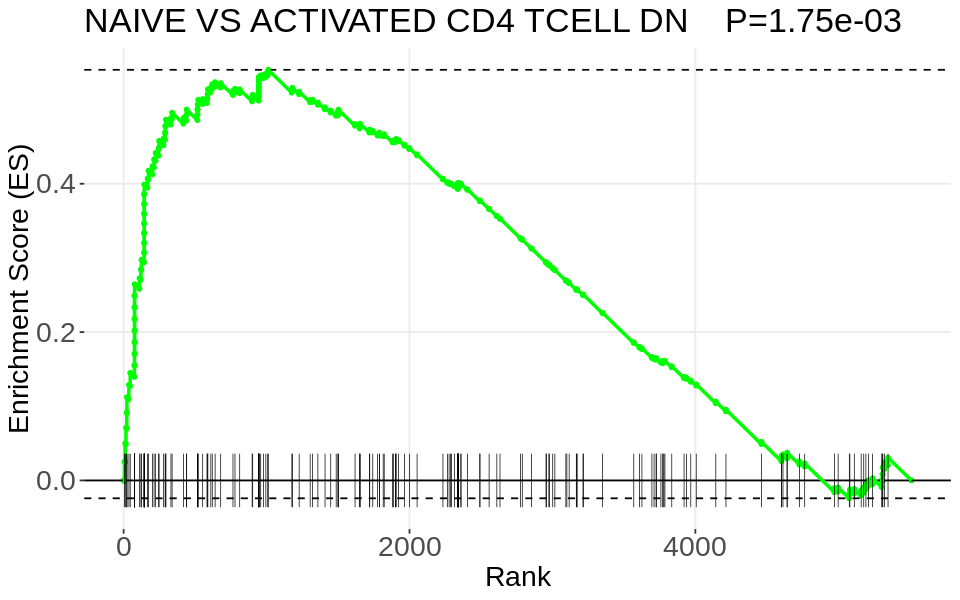

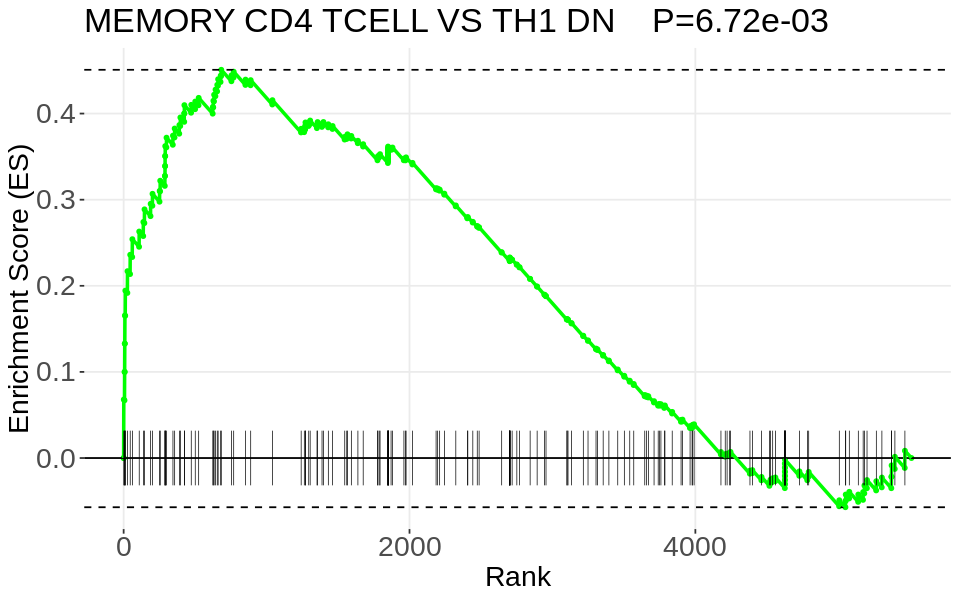

In [47]:
for (pname in show_pathways){
    fig.size(5, 8)
    p = plotEnrichment_mod(pathways[[pname]],
                   ranks) + 
    labs(title=paste0(pname %>% str_split('_', n = 2) %>% map(2) %>% unlist, '    P=', 
       res_filt[pname, 'padj'] %>% formatC(format = "e", digits = 2)) %>% str_replace_all('_', ' ')
        )
    print(p)

}

In [725]:
show_pathways

[1] "GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN"
[2] "GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN"

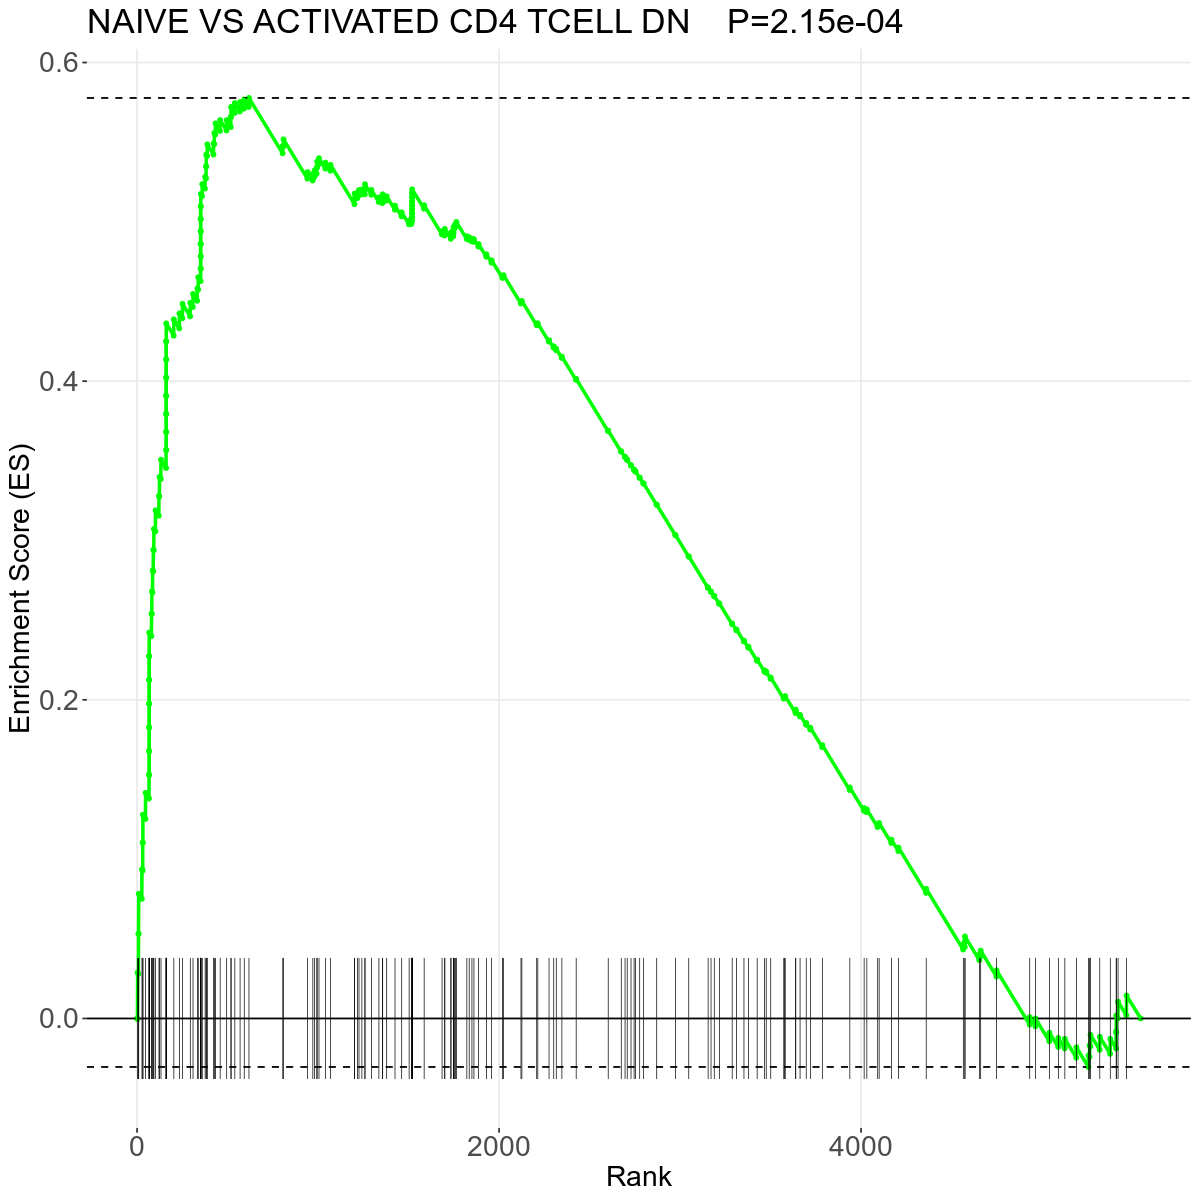

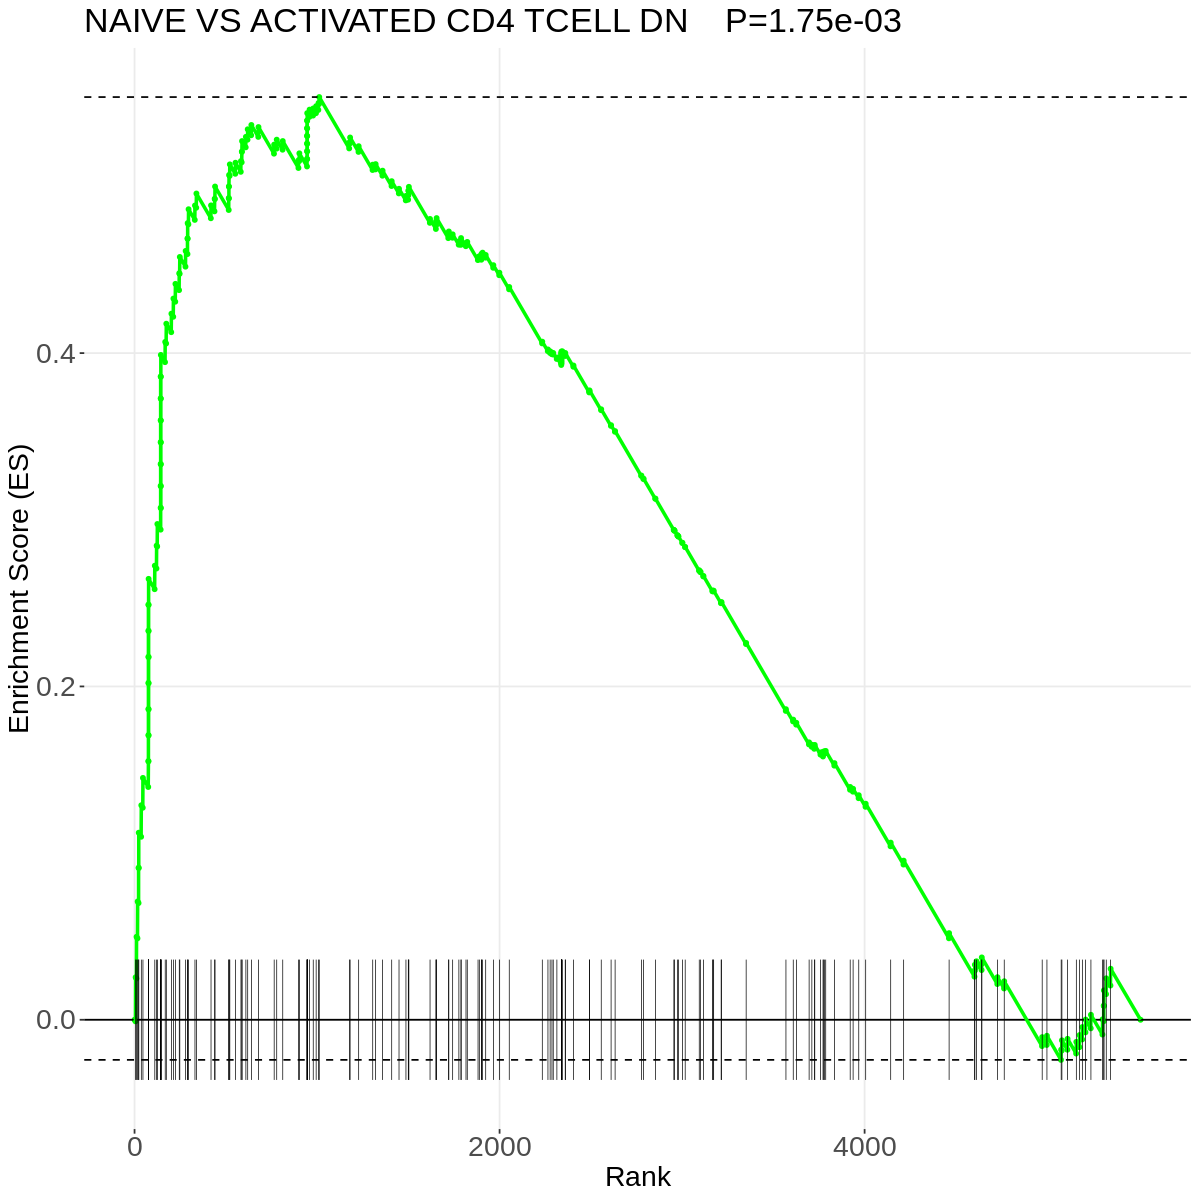

In [52]:
# pdf(file = '../Figures/GSEA_CD45_Naive_VS_Activated.pdf', width = 8, height = 5)
pname = 'GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN'

p = plotEnrichment_mod(pathways[[pname]],
                   ranks) + 
    labs(title=paste0(pname %>% str_split('_', n = 2) %>% map(2) %>% unlist, '    P=', 
       res_filt[pname, 'padj'] %>% formatC(format = "e", digits = 2)) %>% str_replace_all('_', ' ')
        )
p

# dev.off()

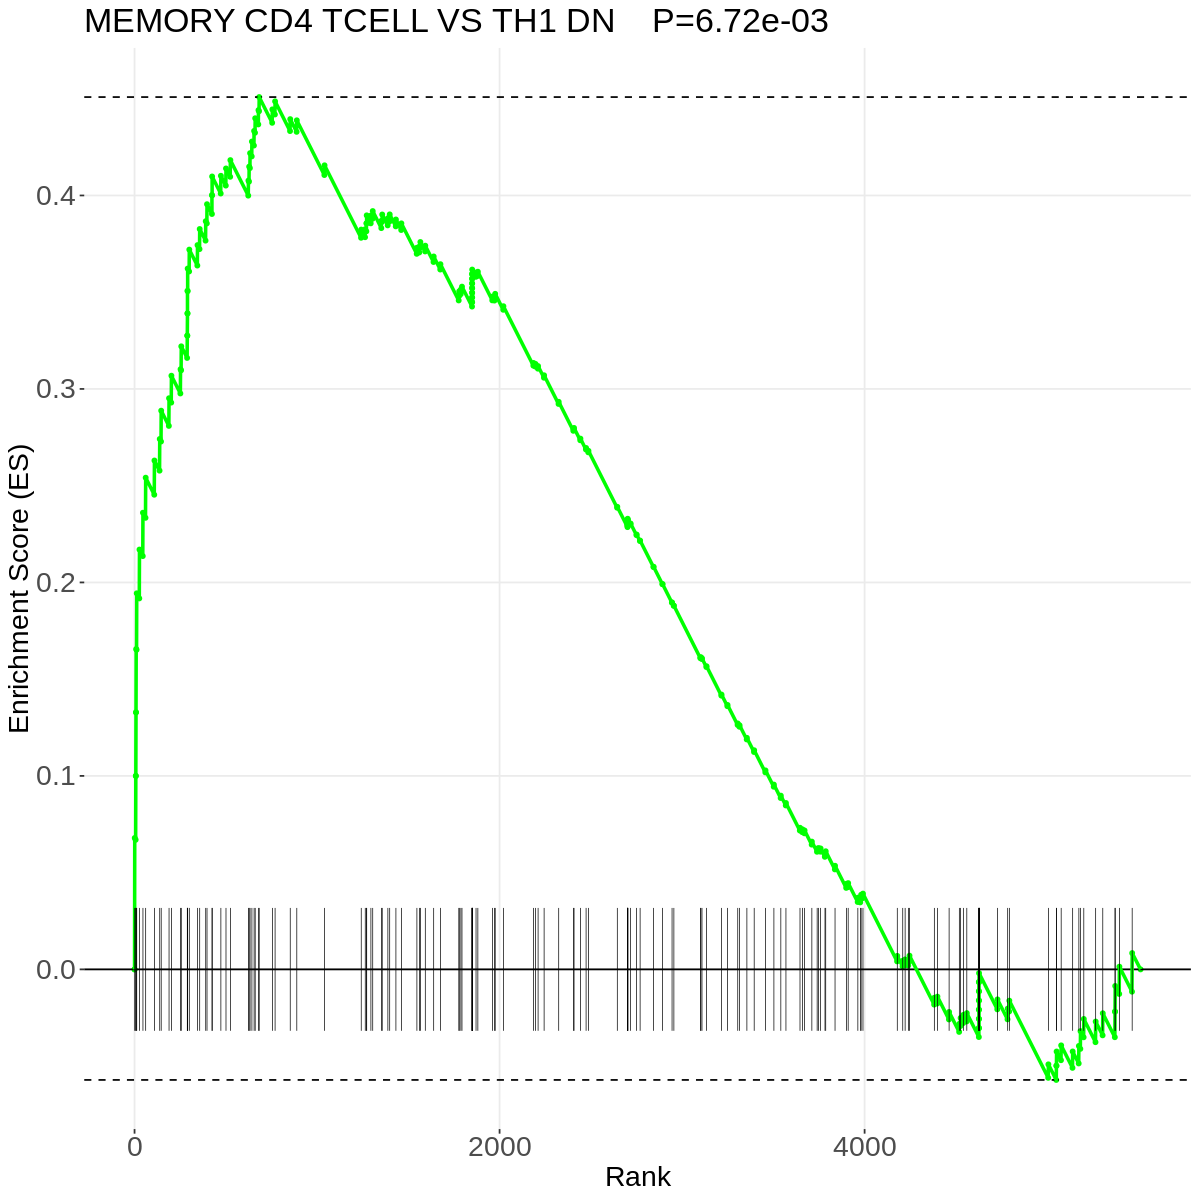

In [54]:
# pdf(file = '../Figures/GSEA_CD45_Memory_VS_Th1.pdf', width = 8, height = 5)
pname = 'GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN'

p = plotEnrichment_mod(pathways[[pname]],
                   ranks) + 
    labs(title=paste0(pname %>% str_split('_', n = 2) %>% map(2) %>% unlist, '    P=', 
       res_filt[pname, 'padj'] %>% formatC(format = "e", digits = 2)) %>% str_replace_all('_', ' ')
        )
p

# dev.off()

# Polarization (IL2RA)

In [83]:
dge_all = read_delim('../Misc/Polarization_DGE.csv') %>% as.data.frame

Rows: 4018 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Genes
dbl (3): pval, beta, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [76]:
dge_all = dge_all %>% mutate(padj_bonf = pval * nrow(dge_all))

In [102]:
critical_pval = (dge_all %>% arrange(padj %>% rev) %>% filter(padj < 0.05) %>% head(1))$pval

In [106]:
min_p = dge_all$pval[dge_all$pval!=0] %>% na.omit %>% min
dge_all$pval_cap=dge_all$pval
dge_all$pval_cap[dge_all$pval_cap==0] = min_p
min_p

[1] 1.110223e-16

In [ ]:
(dge_all %>% filter(padj < 0.05) %>% arrange(beta) %>% head(100))$Genes

[1] "TNFSF10"    "XAF1"       "IFITM3"     "CD38"       "HERC5"     
  [6] "EPSTI1"     "PLAAT4"     "OAS1"       "MX1"        "PPFIBP1"   
 [11] "GBP1"       "SAMD9L"     "PRKX"       "AC116049.2" "ISG15"     
 [16] "IFI44L"     "IFI6"       "DDHD1"      "ITGAL"      "HLA-DRB1"  
 [21] "MAL"        "GSDMD"      "MX2"        "P2RX5"      "XBP1"      
 [26] "PLAC8"      "DEGS1"      "RGL4"       "GRAMD1B"    "USP18"     
 [31] "ST3GAL1"    "NMI"        "CD96"       "GZMB"       "IFI30"     
 [36] "CD48"       "ARL4C"      "TNFSF13B"   "STAT4"      "LGALS3BP"  
 [41] "UNC93B1"    "IL32"       "STAT1"      "JAK2"       "ADA"       
 [46] "GLUL"       "LGALS9"     "PNPT1"      "TCTEX1D2"   "ELMO1"     
 [51] "OAS2"       "CD59"       "IRF7"       "ABI3"       "HEXB"      
 [56] "LPIN1"      "EIF2AK2"    "CHD7"       "NAPA"       "ANXA2"     
 [61] "COPS4"      "SHISA5"     "SOCS3"      "GALM"       "BDH1"      
 [66] "NARF"       "LAP3"       "OAS3"       "CDCA5"      "BST2"      
 [71] "TMEM208"    "AL450384.2" "GALK1"      "PPM1K"      "PGGHG"     
 [76] "INPP5D"     "OSTF1"      "FDFT1"      "RRP7A"      "SLF1"      
 [81] "DAXX"       "DOCK8"      "PARP14"     "AHNAK"      "IFI35"     
 [86] "CENPU"      "IKBKE"      "RBM42"      "HMGCS1"     "ELAC2"     
 [91] "CCDC85B"    "DIAPH3"     "CD99"       "HSH2D"      "PPP2R5C"   
 [96] "TMEM189"    "NCOA7"      "PGS1"       "AK3"        "STOM"

In [10]:
(dge_all %>% filter(padj < 0.05, beta > 0) %>% arrange(beta))$Genes

[1] "RPS19"      "RPL34"      "RPL29"      "RPS12"      "TXNRD1"    
  [6] "RPS20"      "RPL31"      "RPL24"      "RPL8"       "RPL18"     
 [11] "RPL17"      "RPS28"      "RPL13"      "RPL26"      "PLPP3"     
 [16] "RPSA"       "RPS5"       "RPS29"      "EEF1D"      "RPS23"     
 [21] "RPS27A"     "RPS2"       "BTF3"       "PCBP2"      "RPS17"     
 [26] "RPL10A"     "RPS7"       "AC023469.1" "RPS13"      "RPL15"     
 [31] "AC068724.3" "COX4I1"     "RPL18A"     "SLC25A6"    "KIZ-AS1"   
 [36] "RPS16"      "RPS3"       "TRMT112"    "NPM1"       "RPS14"     
 [41] "RPS15A"     "ASTN2"      "RPL7"       "CRIP1"      "NDUFV2"    
 [46] "RPS6"       "RPL13A"     "TMSB4X"     "RPL6"       "LCP1"      
 [51] "SYNGR2"     "RPLP1"      "RPS8"       "CD2"        "RPS3A"     
 [56] "EIF1"       "IMPDH2"     "RGS10"      "RACK1"      "RPL4"      
 [61] "RPL10"      "SNHG5"      "AC078923.1" "NDFIP1"     "RPS4X"     
 [66] "JUNB"       "SNHG29"     "CHCHD3"     "STEAP1B"    "TRBC2"     
 [71] "SLC27A4"    "NOP53"      "SRGN"       "RPL7A"      "EEF2"      
 [76] "HCK"        "MT2A"       "PTPN6"      "WIF1"       "EEF1G"     
 [81] "SAE1"       "APEX1"      "CHURC1"     "TNIP1"      "ABCG1"     
 [86] "PRDX4"      "CD5"        "ARID5A"     "GAS5"       "MCL1"      
 [91] "GTF2I"      "FXYD5"      "REXO2"      "TXNDC17"    "HPCAL1"    
 [96] "RPL3"       "COMMD3"     "SQOR"       "TRAF1"      "RPL5"      
[101] "HILPDA"     "WWOX"       "TMEM147"    "LAT"        "BAIAP2L1"  
[106] "TSHZ2"      "EEF1A1"     "EEF1B2"     "SLAMF1"     "TNFAIP3"   
[111] "TAGLN2"     "GSTO1"      "S100A6"     "CDK6"       "RAB27A"    
[116] "ZFAND5"     "EED"        "HSPB1"      "DNPH1"      "PCOLCE2"   
[121] "CAPZA2"     "SKAP1"      "FAM151B"    "RPLP0"      "ETFB"      
[126] "ARL2"       "KCNN4"      "POLD4"      "ZFR"        "BEX3"      
[131] "OLA1"       "PRKCA"      "COX20"      "PPAN"       "LSP1"      
[136] "TNFRSF25"   "HMGA1"      "BMERB1"     "CXCR4"      "ZBTB32"    
[141] "DAD1"       "HDDC2"      "REL"        "ADTRP"      "TRBC1"     
[146] "PABPC1"     "PINX1"      "OCIAD2"     "PIM3"       "UCP2"      
[151] "TMBIM1"     "CD6"        "PERP"       "LRRC41"     "BTG1"      
[156] "POU2F2"     "OXNAD1"     "FURIN"      "RAB8B"      "EXOC2"     
[161] "STAT5B"     "C12orf45"   "IL2RA"      "CD200"      "LDLRAD4"   
[166] "NPTN"       "RABEP1"     "DIPK1A"     "TNIP2"      "NUDT4"     
[171] "ECE1"       "CD82"       "HUWE1"      "ZBED2"      "FMNL1"     
[176] "VPS39"      "DUSP2"      "ZFP36L2"    "VSIR"       "RBBP8"     
[181] "IFNAR2"     "ITK"        "DNAJC18"    "AC090825.1" "EIF4B"     
[186] "SLA"        "BACH2"      "SNX9"       "MGST2"      "PLK3"      
[191] "EML2"       "TMEM173"    "SLC35F2"    "IER3"       "PLP2"      
[196] "IRF4"       "CCND2"      "IL21R"      "LINC01588"  "IL23A"     
[201] "SELL"       "ANKH"       "TNFAIP8"    "PDCD1"      "PFKFB3"    
[206] "ID3"        "PRDX1"      "AL161449.2" "APOBEC3G"   "SH2D2A"    
[211] "CAMTA2"     "IVNS1ABP"   "ZC3H12D"    "CD44"       "APOBEC3C"  
[216] "FHL3"       "RUNX1"      "CRTAP"      "GLB1"       "NSMCE1"    
[221] "FHOD1"      "NFKBIA"     "DNAJB1"     "TGIF1"      "PCED1B"    
[226] "LPXN"       "CPM"        "PCED1B-AS1" "PGM2L1"     "NAPSA"     
[231] "FOXP3"      "RBPJ"       "LTA"        "F5"         "APOBEC3H"  
[236] "JAML"       "DUSP4"      "RGCC"       "DIXDC1"     "IL4I1"     
[241] "CAVIN3"     "LMNA"       "CCL5"       "RGS16"      "TIMP1"

In [11]:
(dge_all %>% filter(padj < 0.05, beta < 0)  %>% arrange(beta))$Genes

[1] "TNFSF10"    "XAF1"       "IFITM3"     "CD38"       "HERC5"     
  [6] "EPSTI1"     "PLAAT4"     "OAS1"       "MX1"        "PPFIBP1"   
 [11] "GBP1"       "SAMD9L"     "PRKX"       "AC116049.2" "ISG15"     
 [16] "IFI44L"     "IFI6"       "DDHD1"      "ITGAL"      "HLA-DRB1"  
 [21] "MAL"        "GSDMD"      "MX2"        "P2RX5"      "XBP1"      
 [26] "PLAC8"      "DEGS1"      "RGL4"       "GRAMD1B"    "USP18"     
 [31] "ST3GAL1"    "NMI"        "CD96"       "GZMB"       "IFI30"     
 [36] "CD48"       "ARL4C"      "TNFSF13B"   "STAT4"      "LGALS3BP"  
 [41] "UNC93B1"    "IL32"       "STAT1"      "JAK2"       "ADA"       
 [46] "GLUL"       "LGALS9"     "PNPT1"      "TCTEX1D2"   "ELMO1"     
 [51] "OAS2"       "CD59"       "IRF7"       "ABI3"       "HEXB"      
 [56] "LPIN1"      "EIF2AK2"    "CHD7"       "NAPA"       "ANXA2"     
 [61] "COPS4"      "SHISA5"     "SOCS3"      "GALM"       "BDH1"      
 [66] "NARF"       "LAP3"       "OAS3"       "CDCA5"      "BST2"      
 [71] "TMEM208"    "AL450384.2" "GALK1"      "PPM1K"      "PGGHG"     
 [76] "INPP5D"     "OSTF1"      "FDFT1"      "RRP7A"      "SLF1"      
 [81] "DAXX"       "DOCK8"      "PARP14"     "AHNAK"      "IFI35"     
 [86] "CENPU"      "IKBKE"      "RBM42"      "HMGCS1"     "ELAC2"     
 [91] "CCDC85B"    "DIAPH3"     "CD99"       "HSH2D"      "PPP2R5C"   
 [96] "TMEM189"    "NCOA7"      "PGS1"       "AK3"        "STOM"      
[101] "UBE2F"      "ASCC3"      "ADPGK"      "RIOX2"      "SRP19"     
[106] "ASMTL"      "CLEC2B"     "ETS1"       "HAVCR2"     "PSMG4"     
[111] "STAG3"      "COASY"      "UBQLN2"     "SPATS2L"    "TBC1D10C"  
[116] "TSR3"       "CHST11"     "FAF1"       "U2AF1L4"    "IDI1"      
[121] "MGST3"      "APEH"       "PSMB4"      "BCL2L14"    "RFC4"      
[126] "ISG20"      "UBE2G1"     "PLSCR1"     "BAX"        "RALBP1"    
[131] "RALB"       "BET1L"      "MRPS10"     "CDCA7"      "DYNLT1"    
[136] "RPS6KA1"    "ERP29"      "TANK"       "ACAT1"      "UBE2M"     
[141] "CPNE1"      "DCXR"       "CD81"       "ADD3"       "PARP9"     
[146] "HTATSF1"    "TMSB10"     "DIAPH2"     "PRKCB"      "FUT8"      
[151] "MED4"       "EVL"        "CNP"        "ARIH2"      "SLC39A8"   
[156] "PRELID1"    "GOLGB1"     "ARF3"       "LY6E"       "TK1"       
[161] "SIVA1"      "GINS2"      "RNASEH2B"   "IKZF1"      "EBP"       
[166] "LARS"       "LBR"        "SFI1"       "STX16"      "GMNN"      
[171] "NDUFA9"     "MCPH1"      "PML"        "TUBA1B"     "ANAPC5"    
[176] "CAMK2D"     "ZFPM2-AS1"  "PSMB10"     "DRAP1"      "UBE2L6"    
[181] "KLF6"       "RIPOR2"     "RPA1"       "FDPS"       "MRPS18C"   
[186] "TTC17"      "TXNL4A"     "ERG28"      "IDH2"       "SUSD3"     
[191] "SH3BGRL"    "RNF213"     "JPT1"       "WBP2"       "MLEC"      
[196] "YWHAH"      "FIBP"       "FAM107B"    "SRRT"       "H2AFY"     
[201] "TRAM1"      "RAB5IF"     "RUVBL2"     "RNF5"       "DCTN3"     
[206] "ACAT2"      "PTDSS1"     "RAB8A"      "PSMB8"      "P4HB"      
[211] "CKLF"       "REX1BD"     "C12orf75"   "CYB5B"      "WARS"      
[216] "CYCS"       "PSIP1"      "PSME2"      "SSR3"       "CD247"     
[221] "CSK"        "SDHA"       "TAP1"       "PSMB9"      "DNMT1"     
[226] "MRPS15"     "HMGN3"      "TMEM50A"    "PSMF1"      "SEC61B"    
[231] "GNA15"      "HM13"       "ARHGDIA"    "IFITM2"     "BCAS3"     
[236] "PRDX3"      "PHPT1"      "PPIB"       "COX5B"      "AP2S1"     
[241] "PSMA5"      "TMBIM6"     "KDM4C"      "PIM1"       "TMED10"    
[246] "MT-ND1"     "PSMD7"      "TMEM123"    "NOP10"      "KMT2E"     
[251] "PITPNC1"    "NDUFA6"     "RPN2"       "SURF4"      "MLF2"      
[256] "RAB11A"     "CDKAL1"     "FTL"        "GSTK1"      "LINC01186" 
[261] "GMFG"       "FTH1"       "CALM3"      "COTL1"      "HNRNPA3"   
[266] "CLIC1"      "LRRFIP1"    "HNRNPU"     "GBP2"       "PSME1"     
[271] "ANXA11"     "DEK"        "ARHGDIB"    "SEPTIN6"    "SF3B2"     
[276] "AK2"        "GUK1"       "SOD1"       "TPM4"       "CALR"      
[281] "SP100"      "SUB1" 

In [158]:
dge_all %>% filter(padj < 0.05) %>% arrange(beta) %>% head(30)
dge_all %>% filter(padj < 0.05) %>% arrange(beta) %>% tail(30)

Genes      pval         beta       padj         pval_cap     label
1  TNFSF10    0.000000e+00 -0.7975559 0.000000e+00 1.110223e-16 NA   
2  XAF1       3.330669e-16 -0.6740670 6.079985e-14 3.330669e-16 NA   
3  IFITM3     0.000000e+00 -0.6288018 0.000000e+00 1.110223e-16 NA   
4  CD38       0.000000e+00 -0.6198495 0.000000e+00 1.110223e-16 NA   
5  HERC5      2.085110e-12 -0.6193261 1.947396e-10 2.085110e-12 NA   
6  EPSTI1     0.000000e+00 -0.6158881 0.000000e+00 1.110223e-16 NA   
7  PLAAT4     3.248691e-07 -0.6087640 1.105656e-05 3.248691e-07 NA   
8  OAS1       1.110223e-16 -0.5973656 2.123169e-14 1.110223e-16 NA   
9  MX1        0.000000e+00 -0.5868175 0.000000e+00 1.110223e-16 NA   
10 PPFIBP1    2.474548e-07 -0.5804380 8.842794e-06 2.474548e-07 NA   
11 GBP1       1.342179e-07 -0.5782943 5.037562e-06 1.342179e-07 NA   
12 SAMD9L     3.959668e-08 -0.5689833 1.728481e-06 3.959668e-08 NA   
13 PRKX       8.835688e-11 -0.5633143 5.544394e-09 8.835688e-11 NA   
14 AC116049.2 1.887379e-15 -0.5493374 2.915275e-13 1.887379e-15 NA   
15 ISG15      0.000000e+00 -0.5452363 0.000000e+00 1.110223e-16 NA   
16 IFI44L     2.003897e-11 -0.5437012 1.512599e-09 2.003897e-11 NA   
17 IFI6       0.000000e+00 -0.5381996 0.000000e+00 1.110223e-16 NA   
18 DDHD1      2.256510e-07 -0.5204634 8.164094e-06 2.256510e-07 NA   
19 ITGAL      2.503188e-07 -0.4832890 8.842794e-06 2.503188e-07 NA   
20 HLA-DRB1   1.579309e-06 -0.4787898 4.466554e-05 1.579309e-06 NA   
21 MAL        2.942091e-14 -0.4786820 3.997928e-12 2.942091e-14 NA   
22 GSDMD      4.156003e-08 -0.4766159 1.794678e-06 4.156003e-08 NA   
23 MX2        1.504188e-06 -0.4744806 4.314871e-05 1.504188e-06 NA   
24 P2RX5      6.653076e-06 -0.4707603 1.599925e-04 6.653076e-06 NA   
25 XBP1       9.203749e-14 -0.4689078 1.148442e-11 9.203749e-14 NA   
26 PLAC8      1.235465e-10 -0.4567662 7.517618e-09 1.235465e-10 NA   
27 DEGS1      1.818094e-07 -0.4500154 6.637698e-06 1.818094e-07 NA   
28 RGL4       2.225805e-06 -0.4477414 5.999217e-05 2.225805e-06 NA   
29 GRAMD1B    1.586048e-05 -0.4438145 3.461721e-04 1.586048e-05 NA   
30 USP18      4.702572e-12 -0.4421324 4.196784e-10 4.702572e-12 NA

Genes      pval         beta      padj         pval_cap     label
515 FHL3       2.456344e-05 0.4132888 5.137853e-04 2.456344e-05 NA   
516 RUNX1      3.553492e-06 0.4242514 9.388699e-05 3.553492e-06 NA   
517 CRTAP      2.223903e-06 0.4254729 5.999217e-05 2.223903e-06 NA   
518 GLB1       2.975923e-08 0.4397372 1.313330e-06 2.975923e-08 NA   
519 NSMCE1     1.559974e-12 0.4442016 1.528014e-10 1.559974e-12 NA   
520 FHOD1      1.581438e-08 0.4531592 7.384949e-07 1.581438e-08 NA   
521 NFKBIA     6.661338e-16 0.4614428 1.114664e-13 6.661338e-16 NA   
522 DNAJB1     3.003183e-04 0.4626946 4.585849e-03 3.003183e-04 NA   
523 TGIF1      5.364905e-07 0.4634899 1.751663e-05 5.364905e-07 NA   
524 PCED1B     5.302314e-12 0.4646805 4.530658e-10 5.302314e-12 NA   
525 LPXN       7.120313e-08 0.4657119 2.877462e-06 7.120313e-08 NA   
526 CPM        2.570255e-06 0.4693910 6.835857e-05 2.570255e-06 NA   
527 PCED1B-AS1 2.986500e-14 0.4747822 3.997928e-12 2.986500e-14 NA   
528 PGM2L1     1.114635e-07 0.4836034 4.263212e-06 1.114635e-07 NA   
529 NAPSA      1.161862e-07 0.5178576 4.401921e-06 1.161862e-07 NA   
530 FOXP3      2.033979e-06 0.5276546 5.556776e-05 2.033979e-06 FOXP3
531 RBPJ       0.000000e+00 0.5607353 0.000000e+00 1.110223e-16 NA   
532 LTA        4.477551e-08 0.5759831 1.912962e-06 4.477551e-08 NA   
533 F5         6.815440e-09 0.6025444 3.297687e-07 6.815440e-09 NA   
534 APOBEC3H   4.836842e-11 0.6103116 3.292332e-09 4.836842e-11 NA   
535 JAML       0.000000e+00 0.6125221 0.000000e+00 1.110223e-16 NA   
536 DUSP4      0.000000e+00 0.6549492 0.000000e+00 1.110223e-16 NA   
537 RGCC       0.000000e+00 0.6806342 0.000000e+00 1.110223e-16 NA   
538 DIXDC1     1.620926e-12 0.6840596 1.549914e-10 1.620926e-12 NA   
539 IL4I1      4.440892e-16 0.8016455 7.754184e-14 4.440892e-16 NA   
540 CAVIN3     2.886580e-15 0.8206040 4.293520e-13 2.886580e-15 NA   
541 LMNA       0.000000e+00 0.8473812 0.000000e+00 1.110223e-16 NA   
542 CCL5       1.943210e-08 0.9065593 8.868103e-07 1.943210e-08 NA   
543 RGS16      0.000000e+00 0.9658450 0.000000e+00 1.110223e-16 NA   
544 TIMP1      0.000000e+00 1.1603777 0.000000e+00 1.110223e-16 NA

In [104]:
dge_all = dge_all %>% mutate(label = ifelse(Genes %in% 
        c('FOXP3', 'IL2RA', 'CD25', #'CXCR3', 'IFNG', 'IFNG-AS1', 'CCR5', 'TBX21',
         'STAT4' #'JAK2'
         ),
                                 Genes, NA))

In [19]:
dge_all$label %>% table

.
FOXP3 IL2RA STAT4  <NA> 
    1     1     1  4015 

In [163]:
dge_all$label %>% table

.
CXCR3 FOXP3 IL2RA STAT4  <NA> 
    1     1     1     1  4014 

In [185]:
dge_all$Genes[grepl('IFN', dge_all$Genes)]

[1] "IFNAR2" "IFNAR1"

In [16]:
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'IFNG')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'IFNG-AS1')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'TBX21')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'CXCR3')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'CCR5')


which((dge_all  %>% arrange(beta))$Genes == 'IFNG')
which((dge_all  %>% arrange(beta))$Genes == 'IFNG-AS1')
which((dge_all %>% arrange(beta))$Genes == 'TBX21')
# which((dge_all  %>% arrange(beta))$Genes == 'CXCR3')
which((dge_all  %>% arrange(beta))$Genes == 'CCR5')


integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

In [12]:
library(ggrepel)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4015 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


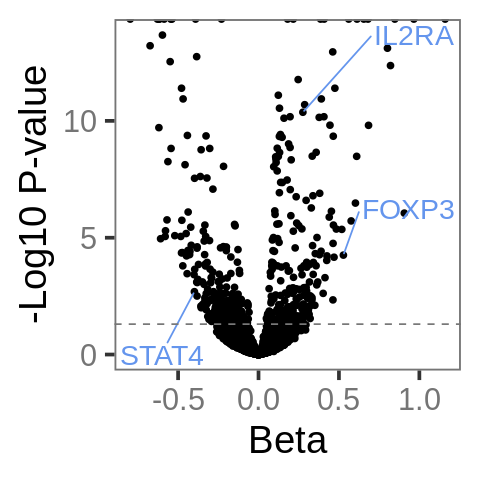

In [ ]:
# fig.size(4, 4)
# ggplot(dge_all, aes(x = beta, y = -log10(padj)))+
#     geom_point()+
#     geom_text_repel(aes(label = label), size = 6, max.overlaps = Inf, force = 1000, color = 'cornflowerblue',
#                    min.segment.length = 0, seed = 15) +
#     theme_clean()+
#     xlab('Beta')+
#     ylab('-Log10 P-value')+
#     geom_hline(aes(yintercept = -log10(0.05)), color = 'gray47', linetype = 'dashed')

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4015 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


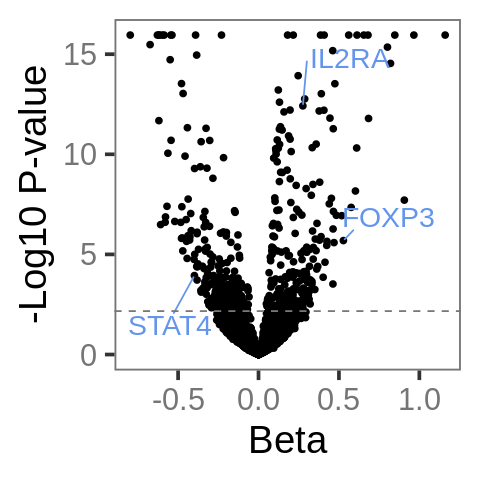

In [150]:
# pdf(file = '../Figures/IL2RA_VolcanoPlotTregTh1.pdf', width = 4, height = 4)
fig.size(4, 4)
ggplot(dge_all, aes(x = beta, y = -log10(pval_cap)))+
    geom_point()+
    geom_text_repel(aes(label = label), size = 6, max.overlaps = Inf, force = 1020, color = 'cornflowerblue',
                   min.segment.length = 0, seed = 32) +
    theme_clean()+
    xlab('Beta')+
    ylab('-Log10 P-value')+
    geom_hline(aes(yintercept = -log10(critical_pval)), color = 'gray47', linetype = 'dashed')
# dev.off()

## Filter to just T-cell C7 pathways

In [160]:
category = 'C7'

In [161]:
genesig_df = msigdbr(species = "human", category = category)


In [18]:
genesig_df[['gs_name']] %>% unique %>% length

[1] 5219

In [162]:
include_terms = 'CD4_TCELL|CD4|TREG|TH17|TH1|TH2|TFH'

exclude_terms = 'BCELL|MYELOID|THYMOCYTE|INNATE_LYMPHOID_CELL|POS_DC|WEAK_DC|CD40|PBMC_VS_MEM_CD4_TCELL|HEMATOPOIETIC_STEM_CELL|LYMPHOID_PRIMED_MPP|BASOPHIL|_DC_VS_|EOSINOPHI|MAC_VS|MAST_CELL|NEUTROPHIL|NKCELL|PROGENITOR|LSK|LIN_NEG_VS|NKTCELL|MOUSE'




In [163]:
include_terms = 'TREG'
exclude_terms = 'BCELL|MYELOID|THYMOCYTE|INNATE_LYMPHOID_CELL|POS_DC|WEAK_DC|CD40|PBMC_VS_MEM_CD4_TCELL|HEMATOPOIETIC_STEM_CELL|LYMPHOID_PRIMED_MPP|BASOPHIL|_DC_VS_|EOSINOPHI|MAC_VS|MAST_CELL|NEUTROPHIL|NKCELL|PROGENITOR|LSK|LIN_NEG_VS|NKTCELL|MOUSE'


In [164]:
pathway_names_filt = (genesig_df[['gs_name']] %>% unique)[(grepl(include_terms, 
               genesig_df[['gs_name']] %>% unique))
        &(!grepl(exclude_terms, 
      genesig_df[['gs_name']] %>% unique))]


In [165]:
pathway_names_filt = (genesig_df[['gs_name']] %>% unique)[(grepl(include_terms, 
               genesig_df[['gs_name']] %>% unique))
        &(!grepl(exclude_terms, 
      genesig_df[['gs_name']] %>% unique))]


In [291]:
pathway_names_filt[(grepl('TH1', pathway_names_filt))]

[1] "GSE14308_TH17_VS_INDUCED_TREG_DN" "GSE14308_TH17_VS_INDUCED_TREG_UP"
[3] "GSE14308_TH17_VS_NATURAL_TREG_DN" "GSE14308_TH17_VS_NATURAL_TREG_UP"
[5] "GSE14308_TH1_VS_INDUCED_TREG_DN"  "GSE14308_TH1_VS_INDUCED_TREG_UP" 
[7] "GSE14308_TH1_VS_NATURAL_TREG_DN"  "GSE14308_TH1_VS_NATURAL_TREG_UP"

In [286]:
act_treg_paths = pathway_names_filt[(grepl('ACT', pathway_names_filt))]

In [292]:
res %>% filter(pathway %in%act_treg_paths) %>% select(-leadingEdge)

pathway                                            pval       padj     
1  GSE14415_ACT_TCONV_VS_ACT_NATURAL_TREG_DN          0.42650104 0.6921572
2  GSE14415_ACT_TCONV_VS_ACT_NATURAL_TREG_UP          0.22690763 0.5498587
3  GSE14415_ACT_VS_CTRL_NATURAL_TREG_DN               0.24571429 0.5650515
4  GSE14415_ACT_VS_CTRL_NATURAL_TREG_UP               0.51143451 0.7469930
5  GSE15659_CD45RA_NEG_CD4_TCELL_VS_ACTIVATED_TREG_DN 0.62863071 0.7943141
6  GSE15659_CD45RA_NEG_CD4_TCELL_VS_ACTIVATED_TREG_UP 0.13827655 0.4518416
7  GSE15659_NAIVE_CD4_TCELL_VS_ACTIVATED_TREG_DN      0.57172131 0.7755082
8  GSE15659_NAIVE_CD4_TCELL_VS_ACTIVATED_TREG_UP      0.27833002 0.5817090
9  GSE15659_NONSUPPRESSIVE_TCELL_VS_ACTIVATED_TREG_DN 0.67413442 0.8158042
10 GSE15659_NONSUPPRESSIVE_TCELL_VS_ACTIVATED_TREG_UP 0.33829787 0.6485459
11 GSE15659_RESTING_VS_ACTIVATED_TREG_DN              0.06254140 0.3425365
12 GSE15659_RESTING_VS_ACTIVATED_TREG_UP              0.62111801 0.7920406
13 GSE28130_ACTIVATED_VS_INDUCEED_TREG_DN             0.42479675 0.6921572
14 GSE28130_ACTIVATED_VS_INDUCEED_TREG_UP             0.06395349 0.3425365
15 GSE7460_CD8_TCELL_VS_TREG_ACT_DN                   0.55144033 0.7663916
16 GSE7460_CD8_TCELL_VS_TREG_ACT_UP                   0.75502008 0.8627609
17 GSE7460_CTRL_VS_TGFB_TREATED_ACT_TREG_DN           0.18199609 0.5077258
18 GSE7460_CTRL_VS_TGFB_TREATED_ACT_TREG_UP           0.19334719 0.5186734
19 GSE7460_TREG_VS_TCONV_ACT_DN                       0.02284861 0.2075415
20 GSE7460_TREG_VS_TCONV_ACT_UP                       0.03290735 0.2542470
21 GSE7460_TREG_VS_TCONV_ACT_WITH_TGFB_DN             0.02350973 0.2090144
22 GSE7460_TREG_VS_TCONV_ACT_WITH_TGFB_UP             0.42916667 0.6921572
   log2err    ES         NES        size
1  0.08971047 -0.3435669 -1.0073524 71  
2  0.12814292 -0.4273142 -1.1573598 45  
3  0.11881504  0.4196716  1.1349250 58  
4  0.07998588 -0.3195265 -0.9755267 96  
5  0.06928365 -0.3239160 -0.9186001 60  
6  0.16823817  0.5396213  1.2913163 31  
7  0.07343814 -0.3429835 -0.9352509 48  
8  0.11331291 -0.4647633 -1.1625927 31  
9  0.06494077 -0.3035650 -0.8782347 65  
10 0.10512513  0.5163785  1.1159345 18  
11 0.28780513 -0.4944078 -1.4107618 61  
12 0.06977925  0.3970225  0.8897064 23  
13 0.08889453 -0.4210805 -1.0392216 29  
14 0.24891111  0.5167048  1.3791998 55  
15 0.07550153 -0.3161795 -0.9495220 83  
16 0.05884382 -0.3115212 -0.8437400 45  
17 0.14290115  0.5025597  1.2364383 35  
18 0.14290115 -0.3870621 -1.1501999 79  
19 0.35248786  0.6544767  1.5453700 28  
20 0.32177592 -0.5533862 -1.4955564 44  
21 0.35248786  0.5413852  1.4640771 58  
22 0.08971047  0.4723366  1.0500487 22

In [266]:
res %>% filter(pathway %in% c('GSE14308_TH1_VS_INDUCED_TREG_DN', 'GSE14308_TH1_VS_INDUCED_TREG_UP',
                             'GSE14308_TH1_VS_NATURAL_TREG_DN', 'GSE14308_TH1_VS_NATURAL_TREG_UP'))

pathway                         pval      padj      log2err    ES        
1 GSE14308_TH1_VS_INDUCED_TREG_DN 0.2343750 0.5584253 0.12384217  0.4181753
2 GSE14308_TH1_VS_INDUCED_TREG_UP 0.4485597 0.7034965 0.08653997 -0.3340009
3 GSE14308_TH1_VS_NATURAL_TREG_DN 0.7189922 0.8413974 0.05947603  0.3225984
4 GSE14308_TH1_VS_NATURAL_TREG_UP 0.7129094 0.8384628 0.05960370  0.3141189
  NES        size
1  1.1494879 68  
2 -0.9997149 82  
3  0.8476604 51  
4  0.8546142 62  
  leadingEdge                                                                                      
1 SH2D2A, RPL10 , RPS8  , COX4I1                                                                   
2 IRF7   , OAS2   , BST2   , PRELID1, CLIC1  , STAG3  , SRP19  , ARIH2  , SH3BGRL, LBR    , DCTN3  
3 LPXN  , LSP1  , VPS39 , HNRNPC, GGA2  , EXT1  , NFATC1, HLA-E , DDX5  , PITHD1                   
4 NSMCE1, F5    , NDUFV2, ARID5A, RPL24 , AKIP1 , PRKCSH

In [266]:
res %>% filter(pathway %in% c('GSE14308_TH1_VS_INDUCED_TREG_DN', 'GSE14308_TH1_VS_INDUCED_TREG_UP',
                             'GSE14308_TH1_VS_NATURAL_TREG_DN', 'GSE14308_TH1_VS_NATURAL_TREG_UP'))

pathway                         pval      padj      log2err    ES        
1 GSE14308_TH1_VS_INDUCED_TREG_DN 0.2343750 0.5584253 0.12384217  0.4181753
2 GSE14308_TH1_VS_INDUCED_TREG_UP 0.4485597 0.7034965 0.08653997 -0.3340009
3 GSE14308_TH1_VS_NATURAL_TREG_DN 0.7189922 0.8413974 0.05947603  0.3225984
4 GSE14308_TH1_VS_NATURAL_TREG_UP 0.7129094 0.8384628 0.05960370  0.3141189
  NES        size
1  1.1494879 68  
2 -0.9997149 82  
3  0.8476604 51  
4  0.8546142 62  
  leadingEdge                                                                                      
1 SH2D2A, RPL10 , RPS8  , COX4I1                                                                   
2 IRF7   , OAS2   , BST2   , PRELID1, CLIC1  , STAG3  , SRP19  , ARIH2  , SH3BGRL, LBR    , DCTN3  
3 LPXN  , LSP1  , VPS39 , HNRNPC, GGA2  , EXT1  , NFATC1, HLA-E , DDX5  , PITHD1                   
4 NSMCE1, F5    , NDUFV2, ARID5A, RPL24 , AKIP1 , PRKCSH

In [259]:
pathway_names_filt

[1] "GSE11924_TFH_VS_TH17_CD4_TCELL_DN"                                                      
  [2] "GSE11924_TFH_VS_TH17_CD4_TCELL_UP"                                                      
  [3] "GSE11924_TFH_VS_TH1_CD4_TCELL_DN"                                                       
  [4] "GSE11924_TFH_VS_TH1_CD4_TCELL_UP"                                                       
  [5] "GSE11924_TH1_VS_TH17_CD4_TCELL_DN"                                                      
  [6] "GSE11924_TH1_VS_TH17_CD4_TCELL_UP"                                                      
  [7] "GSE11924_TH1_VS_TH2_CD4_TCELL_DN"                                                       
  [8] "GSE11924_TH1_VS_TH2_CD4_TCELL_UP"                                                       
  [9] "GSE11924_TH2_VS_TH17_CD4_TCELL_DN"                                                      
 [10] "GSE11924_TH2_VS_TH17_CD4_TCELL_UP"                                                      
 [11] "GSE14026_TH1_VS_TH17_DN"                                                                
 [12] "GSE14026_TH1_VS_TH17_UP"                                                                
 [13] "GSE14308_TH17_VS_INDUCED_TREG_DN"                                                       
 [14] "GSE14308_TH17_VS_INDUCED_TREG_UP"                                                       
 [15] "GSE14308_TH17_VS_NAIVE_CD4_TCELL_DN"                                                    
 [16] "GSE14308_TH17_VS_NAIVE_CD4_TCELL_UP"                                                    
 [17] "GSE14308_TH17_VS_NATURAL_TREG_DN"                                                       
 [18] "GSE14308_TH17_VS_NATURAL_TREG_UP"                                                       
 [19] "GSE14308_TH1_VS_INDUCED_TREG_DN"                                                        
 [20] "GSE14308_TH1_VS_INDUCED_TREG_UP"                                                        
 [21] "GSE14308_TH1_VS_NAIVE_CD4_TCELL_DN"                                                     
 [22] "GSE14308_TH1_VS_NAIVE_CD4_TCELL_UP"                                                     
 [23] "GSE14308_TH1_VS_NATURAL_TREG_DN"                                                        
 [24] "GSE14308_TH1_VS_NATURAL_TREG_UP"                                                        
 [25] "GSE14308_TH1_VS_TH17_DN"                                                                
 [26] "GSE14308_TH1_VS_TH17_UP"                                                                
 [27] "GSE14308_TH2_VS_TH17_DN"                                                                
 [28] "GSE14308_TH2_VS_TH17_UP"                                                                
 [29] "GSE14308_TH2_VS_TH1_DN"                                                                 
 [30] "GSE14308_TH2_VS_TH1_UP"                                                                 
 [31] "GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_DN"                                             
 [32] "GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP"                                             
 [33] "GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_DN"                                             
 [34] "GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_UP"                                             
 [35] "GSE22886_TH1_VS_TH2_12H_ACT_DN"                                                         
 [36] "GSE22886_TH1_VS_TH2_12H_ACT_UP"                                                         
 [37] "GSE22886_TH1_VS_TH2_48H_ACT_DN"                                                         
 [38] "GSE22886_TH1_VS_TH2_48H_ACT_UP"                                                         
 [39] "GSE26030_TH1_VS_TH17_DAY15_POST_POLARIZATION_DN"                                        
 [40] "GSE26030_TH1_VS_TH17_DAY15_POST_POLARIZATION_UP"                                        
 [41] "GSE26030_TH1_VS_TH17_DAY5_POST_POLARIZATION_DN"                                         
 [42] "GSE26030_TH1_VS_TH17_DAY5_POST_POLARIZATION_UP"            

In [166]:
genesig_df_filt = genesig_df %>% filter(gs_name %in% pathway_names_filt)

genesig_pathways = split(x = genesig_df_filt$gene_symbol, f = genesig_df_filt$gs_name)
pathways = genesig_pathways


In [86]:
names(pathways)

[1] "GSE10094_LCMV_VS_LISTERIA_IND_EFF_CD4_TCELL_DN"                                                                        
   [2] "GSE10094_LCMV_VS_LISTERIA_IND_EFF_CD4_TCELL_UP"                                                                        
   [3] "GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_DN"                                                                              
   [4] "GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_UP"                                                                              
   [5] "GSE11057_CD4_CENT_MEM_VS_PBMC_DN"                                                                                      
   [6] "GSE11057_CD4_CENT_MEM_VS_PBMC_UP"                                                                                      
   [7] "GSE11057_CD4_EFF_MEM_VS_PBMC_DN"                                                                                       
   [8] "GSE11057_CD4_EFF_MEM_VS_PBMC_UP"                                                                                       
   [9] "GSE11057_EFF_MEM_VS_CENT_MEM_CD4_TCELL_DN"                                                                             
  [10] "GSE11057_EFF_MEM_VS_CENT_MEM_CD4_TCELL_UP"                                                                             
  [11] "GSE11057_NAIVE_CD4_VS_PBMC_CD4_TCELL_DN"                                                                               
  [12] "GSE11057_NAIVE_CD4_VS_PBMC_CD4_TCELL_UP"                                                                               
  [13] "GSE11057_NAIVE_VS_CENT_MEMORY_CD4_TCELL_DN"                                                                            
  [14] "GSE11057_NAIVE_VS_CENT_MEMORY_CD4_TCELL_UP"                                                                            
  [15] "GSE11057_NAIVE_VS_EFF_MEMORY_CD4_TCELL_DN"                                                                             
  [16] "GSE11057_NAIVE_VS_EFF_MEMORY_CD4_TCELL_UP"                                                                             
  [17] "GSE11057_NAIVE_VS_MEMORY_CD4_TCELL_DN"                                                                                 
  [18] "GSE11057_NAIVE_VS_MEMORY_CD4_TCELL_UP"                                                                                 
  [19] "GSE11818_WT_VS_DICER_KO_TREG_DN"                                                                                       
  [20] "GSE11818_WT_VS_DICER_KO_TREG_UP"                                                                                       
  [21] "GSE11884_WT_VS_FURIN_KO_NAIVE_CD4_TCELL_DN"                                                                            
  [22] "GSE11884_WT_VS_FURIN_KO_NAIVE_CD4_TCELL_UP"                                                                            
  [23] "GSE11924_TFH_VS_TH1_CD4_TCELL_DN"                                                                                      
  [24] "GSE11924_TFH_VS_TH1_CD4_TCELL_UP"                                                                                      
  [25] "GSE11924_TFH_VS_TH17_CD4_TCELL_DN"                                                                                     
  [26] "GSE11924_TFH_VS_TH17_CD4_TCELL_UP"                                                                                     
  [27] "GSE11924_TFH_VS_TH2_CD4_TCELL_DN"                                                                                      
  [28] "GSE11924_TFH_VS_TH2_CD4_TCELL_UP"                                                                                      
  [29] "GSE11924_TH1_VS_TH17_CD4_TCELL_DN"                                                                                     
  [30] "GSE11924_TH1_VS_TH17_CD4_TCELL_UP"                                                                                     
  [31] "GSE11924_TH1_VS_TH2_CD4_TCELL_DN"                                                                                      
  [32] "GSE11924_TH1_VS_TH2_CD4_TCE

In [249]:
length(pathways)

[1] 1097

In [24]:
dge_all %>% head

Genes  pval beta       padj
1 TMSB10 0    -0.2301869 0   
2 RPL3   0     0.1808447 0   
3 RPLP0  0     0.2160179 0   
4 IL32   0    -0.3912568 0   
5 SH2D2A 0     0.3858102 0   
6 ISG15  0    -0.5452363 0

In [31]:
dge_all %>% drop_na %>% tail

Genes   pval      beta         padj     
4011 TOLLIP  0.9971932 3.726857e-04 0.9983512
4012 HDHD2   0.9973568 3.470859e-04 0.9983512
4013 MT-CO2  0.9979565 7.155156e-05 0.9986092
4014 NOL10   0.9981119 2.340568e-04 0.9986092
4015 NDUFS8  0.9986621 1.038627e-04 0.9989108
4016 RPL22L1 0.9998940 7.422276e-06 0.9998940

In [89]:
dge_all %>% head

Genes  pval beta       padj pval_cap    
1 TMSB10 0    -0.2301869 0    1.110223e-16
2 RPL3   0     0.1808447 0    1.110223e-16
3 RPLP0  0     0.2160179 0    1.110223e-16
4 IL32   0    -0.3912568 0    1.110223e-16
5 SH2D2A 0     0.3858102 0    1.110223e-16
6 ISG15  0    -0.5452363 0    1.110223e-16

In [103]:
dge_all %>% filter(pval < 0.05)

Genes      pval         beta        padj         pval_cap    
1   TMSB10     0.000000e+00 -0.2301869  0.000000e+00 1.110223e-16
2   RPL3       0.000000e+00  0.1808447  0.000000e+00 1.110223e-16
3   RPLP0      0.000000e+00  0.2160179  0.000000e+00 1.110223e-16
4   IL32       0.000000e+00 -0.3912568  0.000000e+00 1.110223e-16
5   SH2D2A     0.000000e+00  0.3858102  0.000000e+00 1.110223e-16
6   ISG15      0.000000e+00 -0.5452363  0.000000e+00 1.110223e-16
7   IFI6       0.000000e+00 -0.5381996  0.000000e+00 1.110223e-16
8   APOBEC3C   0.000000e+00  0.4081255  0.000000e+00 1.110223e-16
9   RBPJ       0.000000e+00  0.5607353  0.000000e+00 1.110223e-16
10  IFITM3     0.000000e+00 -0.6288018  0.000000e+00 1.110223e-16
11  MX1        0.000000e+00 -0.5868175  0.000000e+00 1.110223e-16
12  DUSP4      0.000000e+00  0.6549492  0.000000e+00 1.110223e-16
13  RGCC       0.000000e+00  0.6806342  0.000000e+00 1.110223e-16
14  JAML       0.000000e+00  0.6125221  0.000000e+00 1.110223e-16
15  RGS16      0.000000e+00  0.9658450  0.000000e+00 1.110223e-16
16  EPSTI1     0.000000e+00 -0.6158881  0.000000e+00 1.110223e-16
17  CD38       0.000000e+00 -0.6198495  0.000000e+00 1.110223e-16
18  TNFSF10    0.000000e+00 -0.7975559  0.000000e+00 1.110223e-16
19  LMNA       0.000000e+00  0.8473812  0.000000e+00 1.110223e-16
20  TIMP1      0.000000e+00  1.1603777  0.000000e+00 1.110223e-16
21  OAS1       1.110223e-16 -0.5973656  2.123169e-14 1.110223e-16
22  XAF1       3.330669e-16 -0.6740670  6.079985e-14 3.330669e-16
23  IL4I1      4.440892e-16  0.8016455  7.754184e-14 4.440892e-16
24  NFKBIA     6.661338e-16  0.4614428  1.114664e-13 6.661338e-16
25  STAT1      1.110223e-15 -0.3844985  1.783462e-13 1.110223e-15
26  AC116049.2 1.887379e-15 -0.5493374  2.915275e-13 1.887379e-15
27  CAVIN3     2.886580e-15  0.8206040  4.293520e-13 2.886580e-15
28  PABPC1     1.187939e-14  0.2464306  1.703843e-12 1.187939e-14
29  MAL        2.942091e-14 -0.4786820  3.997928e-12 2.942091e-14
30  PCED1B-AS1 2.986500e-14  0.4747822  3.997928e-12 2.986500e-14
⋮   ⋮          ⋮            ⋮           ⋮            ⋮           
948 UXT        0.04662143    0.08129416 0.1975018    0.04662143  
949 ATP6V1B2   0.04671394   -0.16576792 0.1976851    0.04671394  
950 SMARCB1    0.04705748   -0.13388373 0.1987201    0.04705748  
951 AZI2       0.04705748   -0.15130033 0.1987201    0.04705748  
952 ANKRD37    0.04719177   -0.15744159 0.1987536    0.04719177  
953 NR3C1      0.04719546    0.14165521 0.1987536    0.04719546  
954 RNPS1      0.04721388   -0.09277953 0.1987536    0.04721388  
955 CERT1      0.04730518    0.19842962 0.1989294    0.04730518  
956 NDUFS7     0.04736676   -0.10050689 0.1989800    0.04736676  
957 NFAT5      0.04754618    0.18939747 0.1995250    0.04754618  
958 TOP2A      0.04781508   -0.19721592 0.2002537    0.04781508  
959 LTBP4      0.04786000    0.18771262 0.2002537    0.04786000  
960 XPO5       0.04788244    0.07727013 0.2002537    0.04788244  
961 FKBP5      0.04791928   -0.13707617 0.2002537    0.04791928  
962 PYURF      0.04797838   -0.12215036 0.2002923    0.04797838  
963 MAP2K2     0.04803964   -0.13711374 0.2003398    0.04803964  
964 KARS       0.04825338   -0.11842739 0.2010224    0.04825338  
965 ACADVL     0.04858309   -0.08291644 0.2020407    0.04858309  
966 HSPB11     0.04864821    0.12151274 0.2020407    0.04864821  
967 RPL23      0.04866711    0.06262499 0.2020407    0.04866711  
968 PRKCSH     0.04869905    0.09320952 0.2020407    0.04869905  
969 HLA-A      0.04887502   -0.04567617 0.2025615    0.04887502  
970 UBC        0.04929763   -0.07431737 0.2041023    0.04929763  
971 DDIT4      0.04938957    0.07806378 0.2041669    0.04938957  
972 NDUFS2     0.04947115   -0.10873359 0.2041669    0.04947115  
973 ABCB7      0.04949870    0.12671770 0.2041669    0.04949870  
974 FGF11      0.04951656   -0.19508605 0.2041669    0.04951656  
975 RAD21      0.04962273   -0.10837675 0.2043948    0.04962273  
976 PANK2      0.04977169   -0.15772359 0.20

In [104]:
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'IFNG')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'IFNG-AS1')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'TBX21')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'CXCR3')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'CCR5')

which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'CD25')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'IL2RA')
which((dge_all %>% filter(padj < 0.05) %>% arrange(beta))$Genes == 'FOXP3')
dge_all %>% filter(padj < 0.05) %>% arrange(beta)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

[1] 462

[1] 530

Genes      pval         beta       padj         pval_cap    
1   TNFSF10    0.000000e+00 -0.7975559 0.000000e+00 1.110223e-16
2   XAF1       3.330669e-16 -0.6740670 6.079985e-14 3.330669e-16
3   IFITM3     0.000000e+00 -0.6288018 0.000000e+00 1.110223e-16
4   CD38       0.000000e+00 -0.6198495 0.000000e+00 1.110223e-16
5   HERC5      2.085110e-12 -0.6193261 1.947396e-10 2.085110e-12
6   EPSTI1     0.000000e+00 -0.6158881 0.000000e+00 1.110223e-16
7   PLAAT4     3.248691e-07 -0.6087640 1.105656e-05 3.248691e-07
8   OAS1       1.110223e-16 -0.5973656 2.123169e-14 1.110223e-16
9   MX1        0.000000e+00 -0.5868175 0.000000e+00 1.110223e-16
10  PPFIBP1    2.474548e-07 -0.5804380 8.842794e-06 2.474548e-07
11  GBP1       1.342179e-07 -0.5782943 5.037562e-06 1.342179e-07
12  SAMD9L     3.959668e-08 -0.5689833 1.728481e-06 3.959668e-08
13  PRKX       8.835688e-11 -0.5633143 5.544394e-09 8.835688e-11
14  AC116049.2 1.887379e-15 -0.5493374 2.915275e-13 1.887379e-15
15  ISG15      0.000000e+00 -0.5452363 0.000000e+00 1.110223e-16
16  IFI44L     2.003897e-11 -0.5437012 1.512599e-09 2.003897e-11
17  IFI6       0.000000e+00 -0.5381996 0.000000e+00 1.110223e-16
18  DDHD1      2.256510e-07 -0.5204634 8.164094e-06 2.256510e-07
19  ITGAL      2.503188e-07 -0.4832890 8.842794e-06 2.503188e-07
20  HLA-DRB1   1.579309e-06 -0.4787898 4.466554e-05 1.579309e-06
21  MAL        2.942091e-14 -0.4786820 3.997928e-12 2.942091e-14
22  GSDMD      4.156003e-08 -0.4766159 1.794678e-06 4.156003e-08
23  MX2        1.504188e-06 -0.4744806 4.314871e-05 1.504188e-06
24  P2RX5      6.653076e-06 -0.4707603 1.599925e-04 6.653076e-06
25  XBP1       9.203749e-14 -0.4689078 1.148442e-11 9.203749e-14
26  PLAC8      1.235465e-10 -0.4567662 7.517618e-09 1.235465e-10
27  DEGS1      1.818094e-07 -0.4500154 6.637698e-06 1.818094e-07
28  RGL4       2.225805e-06 -0.4477414 5.999217e-05 2.225805e-06
29  GRAMD1B    1.586048e-05 -0.4438145 3.461721e-04 1.586048e-05
30  USP18      4.702572e-12 -0.4421324 4.196784e-10 4.702572e-12
⋮   ⋮          ⋮            ⋮          ⋮            ⋮           
515 FHL3       2.456344e-05 0.4132888  5.137853e-04 2.456344e-05
516 RUNX1      3.553492e-06 0.4242514  9.388699e-05 3.553492e-06
517 CRTAP      2.223903e-06 0.4254729  5.999217e-05 2.223903e-06
518 GLB1       2.975923e-08 0.4397372  1.313330e-06 2.975923e-08
519 NSMCE1     1.559974e-12 0.4442016  1.528014e-10 1.559974e-12
520 FHOD1      1.581438e-08 0.4531592  7.384949e-07 1.581438e-08
521 NFKBIA     6.661338e-16 0.4614428  1.114664e-13 6.661338e-16
522 DNAJB1     3.003183e-04 0.4626946  4.585849e-03 3.003183e-04
523 TGIF1      5.364905e-07 0.4634899  1.751663e-05 5.364905e-07
524 PCED1B     5.302314e-12 0.4646805  4.530658e-10 5.302314e-12
525 LPXN       7.120313e-08 0.4657119  2.877462e-06 7.120313e-08
526 CPM        2.570255e-06 0.4693910  6.835857e-05 2.570255e-06
527 PCED1B-AS1 2.986500e-14 0.4747822  3.997928e-12 2.986500e-14
528 PGM2L1     1.114635e-07 0.4836034  4.263212e-06 1.114635e-07
529 NAPSA      1.161862e-07 0.5178576  4.401921e-06 1.161862e-07
530 FOXP3      2.033979e-06 0.5276546  5.556776e-05 2.033979e-06
531 RBPJ       0.000000e+00 0.5607353  0.000000e+00 1.110223e-16
532 LTA        4.477551e-08 0.5759831  1.912962e-06 4.477551e-08
533 F5         6.815440e-09 0.6025444  3.297687e-07 6.815440e-09
534 APOBEC3H   4.836842e-11 0.6103116  3.292332e-09 4.836842e-11
535 JAML       0.000000e+00 0.6125221  0.000000e+00 1.110223e-16
536 DUSP4      0.000000e+00 0.6549492  0.000000e+00 1.110223e-16
537 RGCC       0.000000e+00 0.6806342  0.000000e+00 1.110223e-16
538 DIXDC1     1.620926e-12 0.6840596  1.549914e-10 1.620926e-12
539 IL4I1      4.440892e-16 0.8016455  7.754184e-14 4.440892e-16
540 CAVIN3     2.886580e-15 0.8206040  4.293520e-13 2.886580e-15
541 LMNA       0.000000e+00 0.8473812  0.000000e+00 1.110223e-16
542 CCL5       1.943210e-08 0.9065593  8.868103e-07 1.943210e-08
543 RGS16      0.000000e+00 0.9658450  0.000000e+00 1.110223e-16
544 TIMP1      0.000000e+00 1.1603777  

In [227]:
# Use all genes
name = 'all'
dge = dge_all %>% select(-label) %>% drop_na # %>% filter(padjBH < 0.1)   

ranks_name = '-sign(dosage)*log10(pval)'

# if (ranks_name=='-sign(dosage)*log10(pval)'){
ranks = -1*sign(dge$beta)*log10(dge$pval_cap)
# }
# else if (ranks_name=='-dosage*log10(pval)'){
#     ranks = -1*(dge$Dosage)*log10(dge$pval)}
# else {ranks = dge$Dosage}

names(ranks) = dge$Genes
ranks = sort(ranks)

gsea_res = fgsea(pathways = pathways, 
              stats    = ranks,
              minSize  = 15,
              maxSize  = 500)

res = gsea_res %>% as.data.frame


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.47% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [228]:
length(ranks)
which(names(ranks)=='FOXP3')
which(names(ranks)=='IL2RA')

[1] 4016

[1] 3931

[1] 3996

In [67]:
((res %>% filter(padj < 0.05))['NES']>0 )%>% table

.
FALSE  TRUE 
   41    20 

In [68]:
res %>% filter(padj < 0.05) %>% select(-leadingEdge) %>% arrange(desc(NES))

pathway                                                                            
1  GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_UP               
2  GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_UP                                    
3  GSE17974_CTRL_VS_ACT_IL4_AND_ANTI_IL12_1H_CD4_TCELL_DN                             
4  GSE22025_TGFB1_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_DN                      
5  GSE22886_TH1_VS_TH2_48H_ACT_UP                                                     
6  GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_UP                                           
7  GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP                                         
8  GSE17974_0H_VS_1H_IN_VITRO_ACT_CD4_TCELL_DN                                        
9  GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT_CD4_TCELL_DN                        
10 GSE24574_BCL6_LOW_TFH_VS_NAIVE_CD4_TCELL_DN                                        
11 GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_UP                                         
12 GSE11924_TH2_VS_TH17_CD4_TCELL_UP                                                  
13 GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_4H_ACT_CD4_TCELL_DN                        
14 GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP                           
15 GSE2770_TGFB_AND_IL4_VS_IL12_TREATED_ACT_CD4_TCELL_2H_UP                           
16 GSE17974_0H_VS_4H_IN_VITRO_ACT_CD4_TCELL_DN                                        
17 GSE22527_ANTI_CD3_INVIVO_VS_UNTREATED_MOUSE_TREG_UP                                
18 GSE14308_TH17_VS_NATURAL_TREG_DN                                                   
19 GSE21670_UNTREATED_VS_TGFB_IL6_TREATED_CD4_TCELL_DN                                
20 GSE24574_BCL6_HIGH_TFH_VS_TFH_CD4_TCELL_DN                                         
21 GSE22140_HEALTHY_VS_ARTHRITIC_GERMFREE_MOUSE_CD4_TCELL_UP                          
22 GSE2770_UNTREATED_VS_TGFB_AND_IL12_TREATED_ACT_CD4_TCELL_2H_DN                     
23 GSE2770_IL12_AND_TGFB_VS_IL4_TREATED_ACT_CD4_TCELL_48H_DN                          
24 GSE22140_GERMFREE_VS_SPF_ARTHRITIC_MOUSE_CD4_TCELL_DN                              
25 GSE39820_IL1B_IL6_VS_IL1B_IL6_IL23A_TREATED_CD4_TCELL_UP                           
26 GSE8835_CD4_VS_CD8_TCELL_CLL_PATIENT_UP                                            
27 GSE13306_RA_VS_UNTREATED_MEM_CD4_TCELL_UP                                          
28 GSE43863_NAIVE_VS_MEMORY_TH1_CD4_TCELL_D150_LCMV_UP                                
29 GSE18893_TCONV_VS_TREG_2H_CULTURE_DN                                               
30 GSE37533_UNTREATED_VS_PIOGLIZATONE_TREATED_CD4_TCELL_PPARG1_AND_FOXP3_TRASDUCED_DN 
⋮  ⋮                                                                                  
32 GSE22140_GERMFREE_VS_SPF_ARTHRITIC_MOUSE_CD4_TCELL_UP                              
33 GSE43955_TH0_VS_TGFB_IL6_TH17_ACT_CD4_TCELL_42H_UP                                 
34 GSE37534_GW1929_VS_PIOGLITAZONE_TREATED_CD4_TCELL_PPARG1_FOXP3_TRANSDUCED_UP       
35 GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_48H_ACT_CD4_TCELL_DN                       
36 GSE22140_GERMFREE_VS_SPF_MOUSE_CD4_TCELL_UP                                        
37 GSE37534_UNTREATED_VS_ROSIGLITAZONE_TREATED_CD4_TCELL_PPARG1_AND_FOXP3_TRASDUCED_DN
38 GSE24634_IL4_VS_CTRL_TREATED_NAIVE_CD4_TCELL_DAY3_DN                               
39 GSE42021_CD24INT_VS_CD24LOW_TREG_THYMUS_DN                                         
40 GSE7548_NAIVE_VS_DAY7_PCC_IMMUNIZATION_CD4_TCELL_DN                                
41 GSE24634_IL4_VS_CTRL_TREATED_NAIVE_CD4_TCELL_DAY5_DN                               
42 GSE40685_TREG_VS_FOXP3_KO_TREG_PRECURSOR_DN                                        
43 GSE36527_CD69_NEG_VS_POS_TREG_CD62L_LOS_KLRG1_NEG_UP                               
44 GSE34006_WT_VS_A2AR_KO_TREG_DN                                                     
45 GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_24H_ACT_CD4_TCELL_DN                       
4

In [202]:
res 

pathway pval padj log2err ES NES size leadingEdge

In [229]:
res_filt = res %>% filter(padj < 0.05)  %>% arrange(desc(NES))

In [230]:
rownames(res_filt) = res_filt$pathway

In [231]:
res_filt['rank'] = seq(1, dim(res_filt)[1])

In [232]:
res_filt['rev_rank'] = rev(res_filt[['rank']])

In [73]:
res_filt

pathway                                                                            
GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_UP                GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_UP               
GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_UP                                     GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_UP                                    
GSE17974_CTRL_VS_ACT_IL4_AND_ANTI_IL12_1H_CD4_TCELL_DN                              GSE17974_CTRL_VS_ACT_IL4_AND_ANTI_IL12_1H_CD4_TCELL_DN                             
GSE22025_TGFB1_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_DN                       GSE22025_TGFB1_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_DN                      
GSE22886_TH1_VS_TH2_48H_ACT_UP                                                      GSE22886_TH1_VS_TH2_48H_ACT_UP                                                     
GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_UP                                            GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_UP                                           
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP                                          GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP                                         
GSE17974_0H_VS_1H_IN_VITRO_ACT_CD4_TCELL_DN                                         GSE17974_0H_VS_1H_IN_VITRO_ACT_CD4_TCELL_DN                                        
GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT_CD4_TCELL_DN                         GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT_CD4_TCELL_DN                        
GSE24574_BCL6_LOW_TFH_VS_NAIVE_CD4_TCELL_DN                                         GSE24574_BCL6_LOW_TFH_VS_NAIVE_CD4_TCELL_DN                                        
GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_UP                                          GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_UP                                         
GSE11924_TH2_VS_TH17_CD4_TCELL_UP                                                   GSE11924_TH2_VS_TH17_CD4_TCELL_UP                                                  
GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_4H_ACT_CD4_TCELL_DN                         GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_4H_ACT_CD4_TCELL_DN                        
GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP                            GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP                           
GSE2770_TGFB_AND_IL4_VS_IL12_TREATED_ACT_CD4_TCELL_2H_UP                            GSE2770_TGFB_AND_IL4_VS_IL12_TREATED_ACT_CD4_TCELL_2H_UP                           
GSE17974_0H_VS_4H_IN_VITRO_ACT_CD4_TCELL_DN                                         GSE17974_0H_VS_4H_IN_VITRO_ACT_CD4_TCELL_DN                                        
GSE22527_ANTI_CD3_INVIVO_VS_UNTREATED_MOUSE_TREG_UP                                 GSE22527_ANTI_CD3_INVIVO_VS_UNTREATED_MOUSE_TREG_UP                                
GSE14308_TH17_VS_NATURAL_TREG_DN                                                    GSE14308_TH17_VS_NATURAL_TREG_DN                                                   
GSE21670_UNTREATED_VS_TGFB_IL6_TREATED_CD4_TCELL_DN                                 GSE21670_UNTREATED_VS_TGFB_IL6_TREATED_CD4_TCELL_DN                                
GSE24574_BCL6_HIGH_TFH_VS_TFH_CD4_TCELL_DN                                          GSE24574_BCL6_HIGH_TFH_VS_TFH_CD4_TCELL_DN                                         
GSE22140_HEALTHY_VS_ARTHRITIC_GERMFREE_MOUSE_CD4_TCELL_UP                           GSE22140_HEALTHY_VS_ARTHRITIC_GERMFREE_MOUSE_CD4_TCELL_UP                          
GSE2770_UNTREATED_VS_TGFB_AND_IL12_TREATED_ACT_CD4_TCELL_2H_DN                      GSE2770_UNTREATED_VS_TGFB_AND_IL12_TREATED_ACT_CD4_TCELL_2H_DN                     
GSE2770_IL12_AND_TGFB_VS_IL4_TREATED_ACT_CD4_TCELL_48H_DN                           GSE2770_IL12_AND_TGFB_VS_IL4_TREATED_ACT_CD4_TCELL_48H_DN                          
GSE22140_GERMFREE_VS_SPF_ARTHRITIC_MOUSE_CD4_TCELL_D

In [233]:
res_filt %>% filter(NES > 0) %>% arrange(pval) %>% select(-leadingEdge)

pathway                                                             
GSE41978_ID2_KO_VS_ID2_KO_AND_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_DN GSE41978_ID2_KO_VS_ID2_KO_AND_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_DN
GSE41978_KLRG1_HIGH_VS_LOW_EFFECTOR_CD8_TCELL_DN                     GSE41978_KLRG1_HIGH_VS_LOW_EFFECTOR_CD8_TCELL_DN                    
GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_UP GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_UP
KAECH_NAIVE_VS_DAY8_EFF_CD8_TCELL_UP                                 KAECH_NAIVE_VS_DAY8_EFF_CD8_TCELL_UP                                
GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_UP                      GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_UP                     
GSE22886_NAIVE_TCELL_VS_DC_UP                                        GSE22886_NAIVE_TCELL_VS_DC_UP                                       
GSE9650_EFFECTOR_VS_MEMORY_CD8_TCELL_DN                              GSE9650_EFFECTOR_VS_MEMORY_CD8_TCELL_DN                             
GSE9650_NAIVE_VS_EFF_CD8_TCELL_UP                                    GSE9650_NAIVE_VS_EFF_CD8_TCELL_UP                                   
GSE43260_BTLA_POS_VS_NEG_INTRATUMORAL_CD8_TCELL_DN                   GSE43260_BTLA_POS_VS_NEG_INTRATUMORAL_CD8_TCELL_DN                  
KAECH_DAY8_EFF_VS_MEMORY_CD8_TCELL_DN                                KAECH_DAY8_EFF_VS_MEMORY_CD8_TCELL_DN                               
GSE10239_NAIVE_VS_DAY4.5_EFF_CD8_TCELL_UP                            GSE10239_NAIVE_VS_DAY4.5_EFF_CD8_TCELL_UP                           
GSE22025_TGFB1_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_DN        GSE22025_TGFB1_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_DN       
GSE17974_CTRL_VS_ACT_IL4_AND_ANTI_IL12_1H_CD4_TCELL_DN               GSE17974_CTRL_VS_ACT_IL4_AND_ANTI_IL12_1H_CD4_TCELL_DN              
GSE22886_TH1_VS_TH2_48H_ACT_UP                                       GSE22886_TH1_VS_TH2_48H_ACT_UP                                      
GSE17974_0H_VS_4H_IN_VITRO_ACT_CD4_TCELL_DN                          GSE17974_0H_VS_4H_IN_VITRO_ACT_CD4_TCELL_DN                         
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP                           GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP                          
GSE17974_0H_VS_1H_IN_VITRO_ACT_CD4_TCELL_DN                          GSE17974_0H_VS_1H_IN_VITRO_ACT_CD4_TCELL_DN                         
GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_UP                             GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_UP                            
GSE24081_CONTROLLER_VS_PROGRESSOR_HIV_SPECIFIC_CD8_TCELL_UP          GSE24081_CONTROLLER_VS_PROGRESSOR_HIV_SPECIFIC_CD8_TCELL_UP         
GSE24574_BCL6_LOW_TFH_VS_NAIVE_CD4_TCELL_DN                          GSE24574_BCL6_LOW_TFH_VS_NAIVE_CD4_TCELL_DN                         
GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT_CD4_TCELL_DN          GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT_CD4_TCELL_DN         
GSE10239_NAIVE_VS_KLRG1INT_EFF_CD8_TCELL_UP                          GSE10239_NAIVE_VS_KLRG1INT_EFF_CD8_TCELL_UP                         
GSE11924_TH2_VS_TH17_CD4_TCELL_UP                                    GSE11924_TH2_VS_TH17_CD4_TCELL_UP                                   
GSE21670_UNTREATED_VS_TGFB_IL6_TREATED_CD4_TCELL_DN                  GSE21670_UNTREATED_VS_TGFB_IL6_TREATED_CD4_TCELL_DN                 
GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_UP                           GSE22886_NAIVE_CD4_TCELL_VS_48H_ACT_TH1_UP                          
GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP             GSE41087_WT_VS_FOXP3_MUT_ANTI_CD3_CD28_STIM_CD4_TCELL_UP            
GSE2770_TGFB_AND_IL4_VS_IL12_TREATED_ACT_CD4_TCELL_2H_UP             GSE2770_TGFB_AND_IL4_VS_IL12_TREATED_ACT_CD4_TCELL_2H_UP            
GSE7852_TREG_VS_TCONV_FAT_UP                                         GSE7852_TREG_VS_TCONV_FAT_UP                                        
GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_4H_ACT_CD4_TCELL_DN        

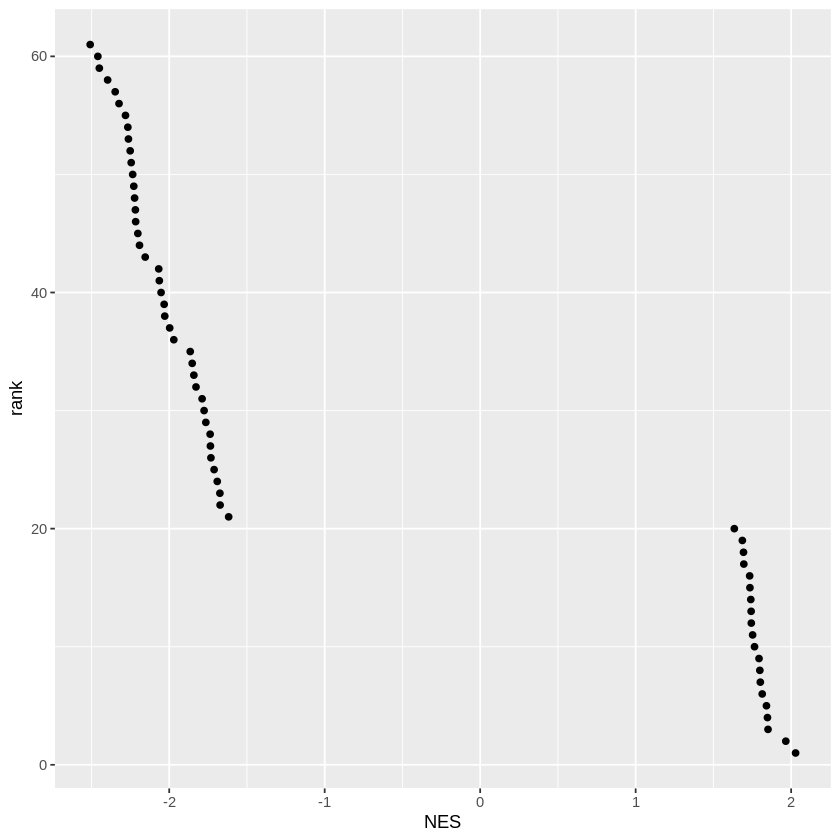

In [75]:
ggplot(res_filt)+
    geom_point(aes(x = NES, y = rank))

In [234]:
res_filt[['pathway_label']] = res_filt[['pathway']] %>% str_split('_', n = 2) %>% map(2) %>% unlist

In [199]:
res_filt %>% head

pathway pval padj log2err ES NES size leadingEdge

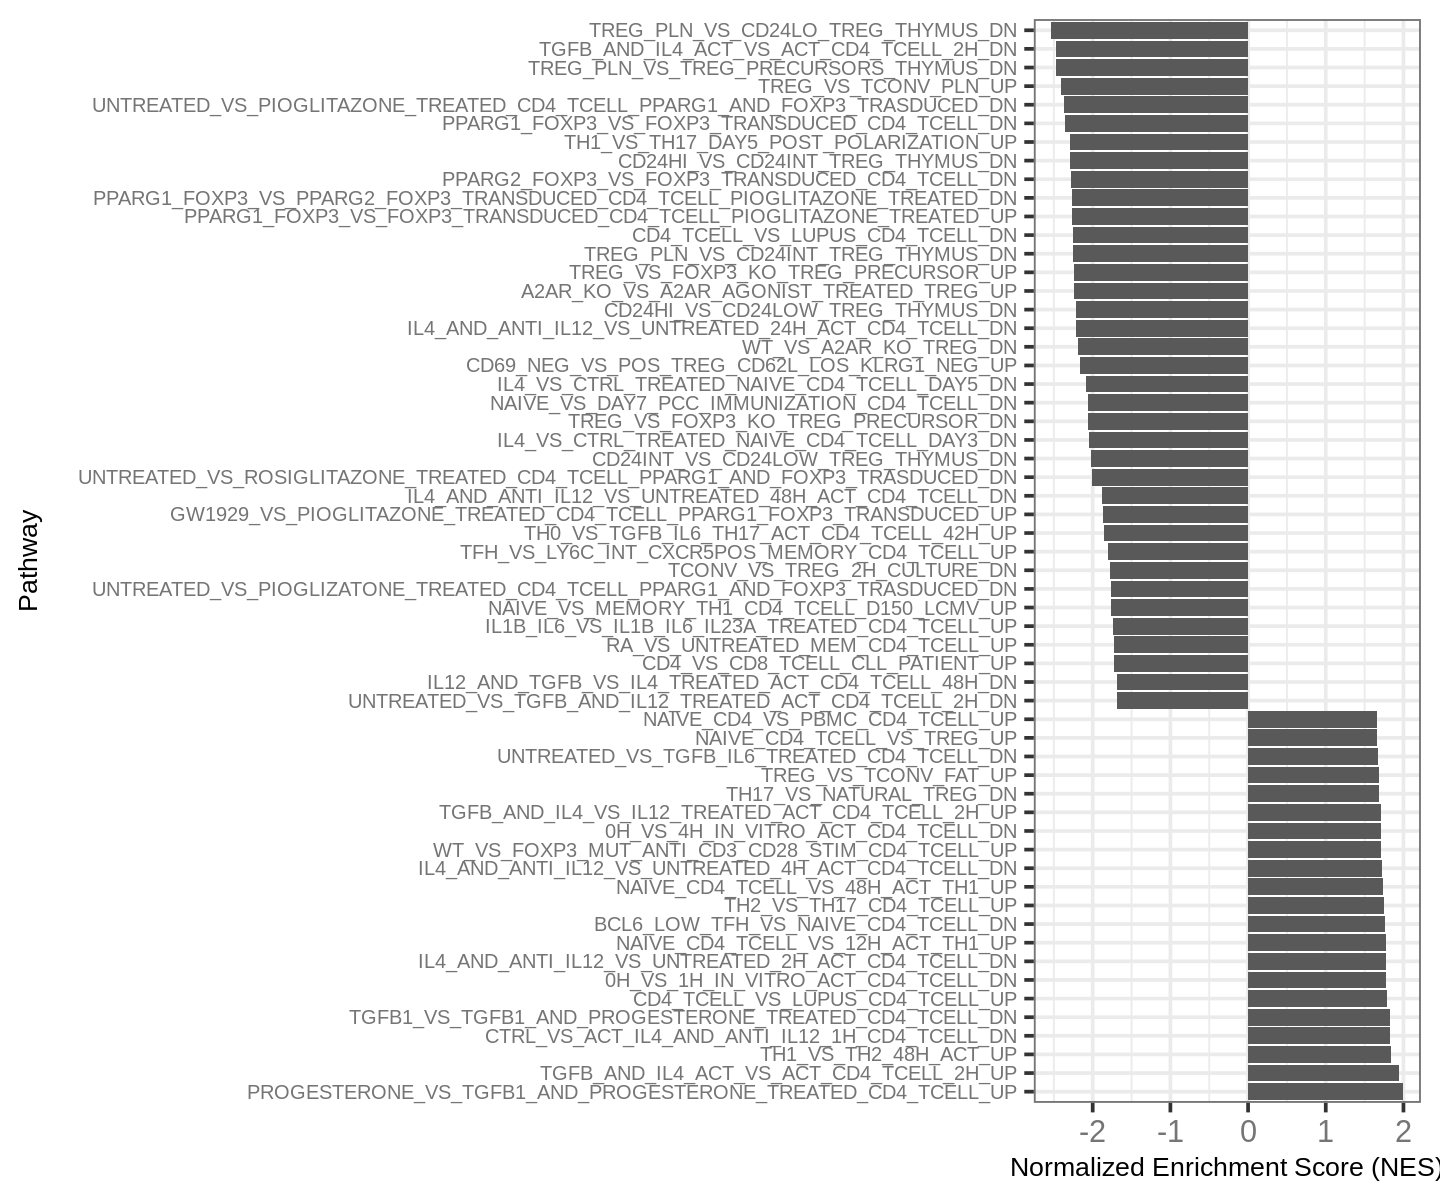

In [220]:
fig.size(10, 12)
ggplot(res_filt)+
    geom_bar(aes(x = NES, y = as.factor(rank)), stat = 'identity')+
    scale_y_discrete(labels = res_filt[['pathway_label']])+
    ylab('Pathway')+
    xlab('Normalized Enrichment Score (NES)')+
    theme_pres()+
    theme(axis.text.y = element_text(size = 12), 
          axis.title.x = element_text(size = 16),axis.title.y = element_text(size = 16),
         )

    

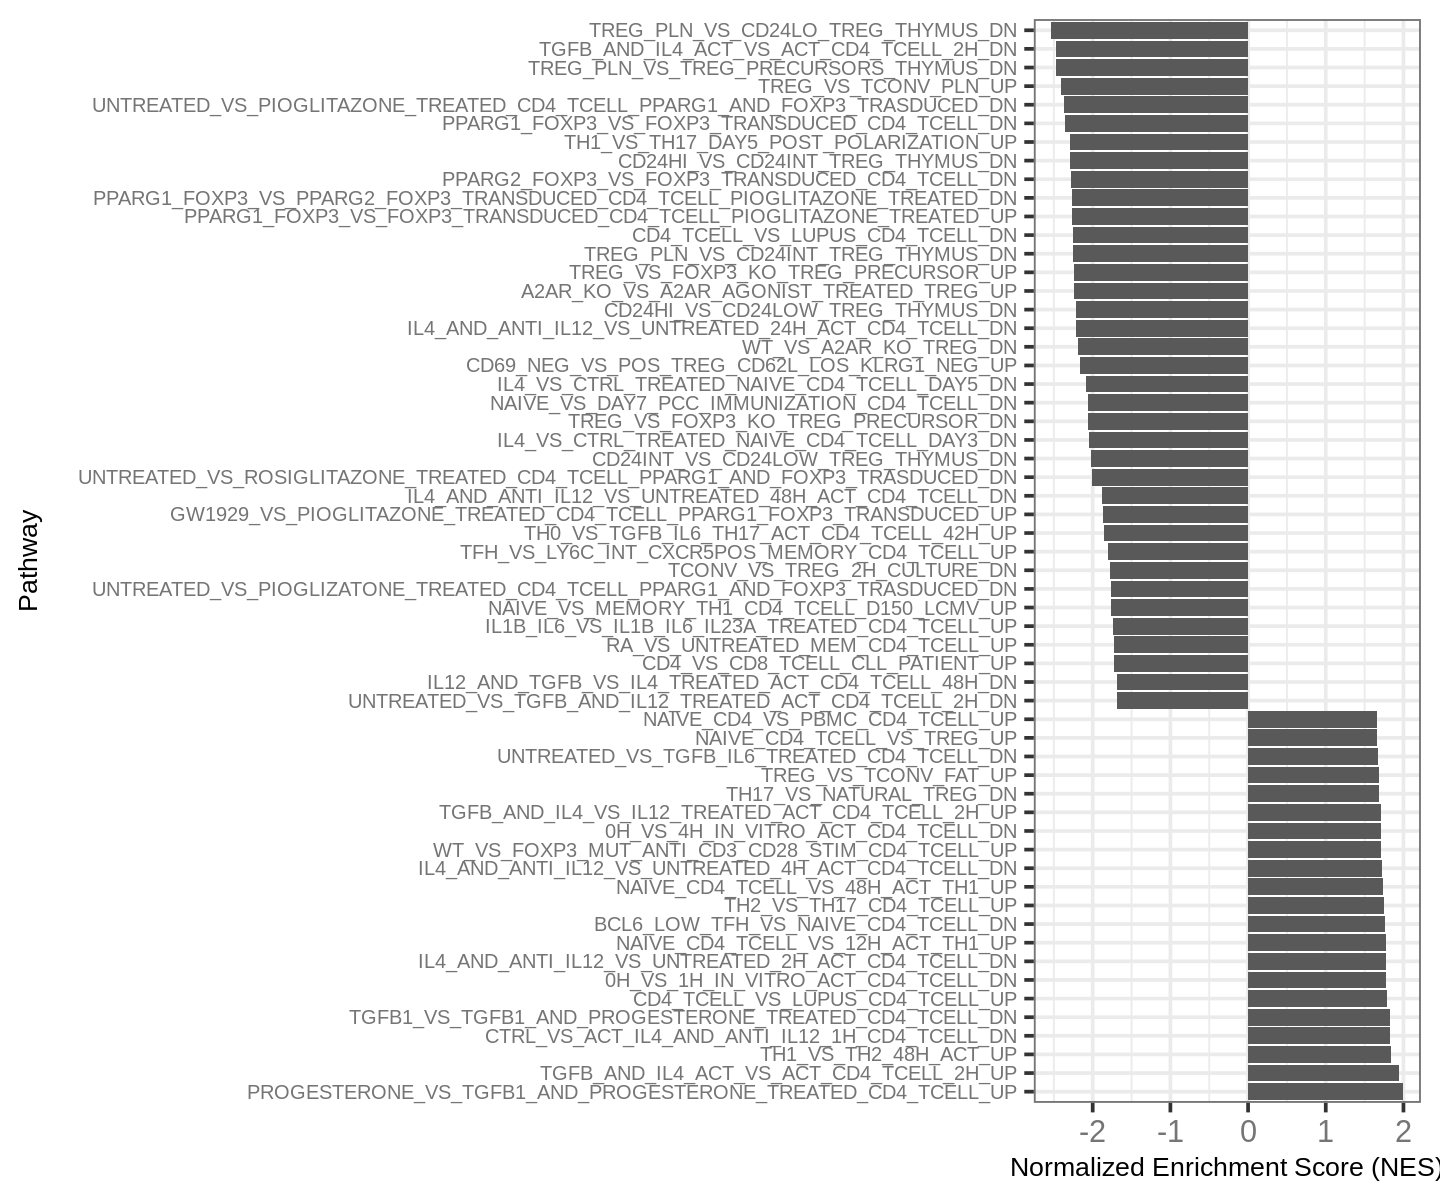

In [212]:
fig.size(10, 12)
ggplot(res_filt)+
    geom_bar(aes(x = NES, y = as.factor(rank)), stat = 'identity')+
    scale_y_discrete(labels = res_filt[['pathway_label']])+
    ylab('Pathway')+
    xlab('Normalized Enrichment Score (NES)')+
    theme_pres()+
    theme(axis.text.y = element_text(size = 12), 
          axis.title.x = element_text(size = 16),axis.title.y = element_text(size = 16),
         )

    

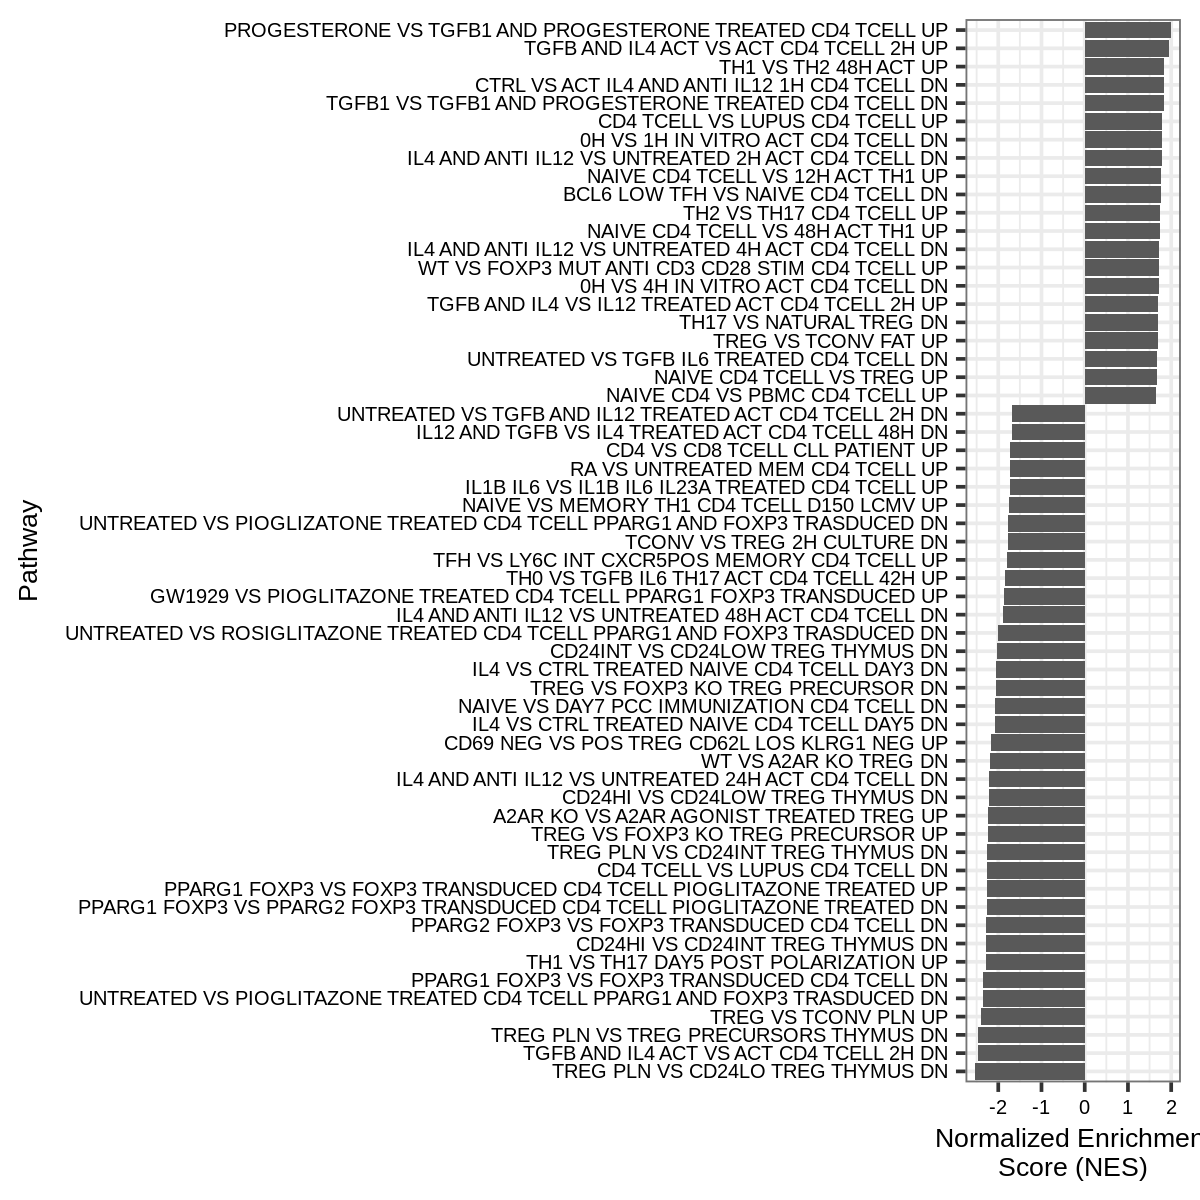

In [221]:
# pdf(file = '../Figures/GSEA_CD45_All.pdf', width = 10, height = 10)

fig.size(10, 10)
ggplot(res_filt)+
    geom_bar(aes(x = NES, y = as.factor(rev_rank)), stat = 'identity')+
    scale_y_discrete(labels = rev(res_filt[['pathway_label']]) %>% str_replace_all('_', ' '))+
    ylab('Pathway')+
    xlab('Normalized Enrichment\nScore (NES)')+
    theme_pres()+
    theme(axis.text.y = element_text(size = 12, color = 'black'), 
          axis.text.x = element_text(size = 12, color = 'black'), 
          axis.title.x = element_text(size = 16),axis.title.y = element_text(size = 16),
         )

# dev.off()

In [253]:
res_filt %>% select(-leadingEdge) %>% head(20)

pathway                                                             
GSE41978_ID2_KO_VS_ID2_KO_AND_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_DN GSE41978_ID2_KO_VS_ID2_KO_AND_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_DN
GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_UP GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_UP
KAECH_NAIVE_VS_DAY8_EFF_CD8_TCELL_UP                                 KAECH_NAIVE_VS_DAY8_EFF_CD8_TCELL_UP                                
GSE41978_KLRG1_HIGH_VS_LOW_EFFECTOR_CD8_TCELL_DN                     GSE41978_KLRG1_HIGH_VS_LOW_EFFECTOR_CD8_TCELL_DN                    
GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_UP                      GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_UP                     
GSE9650_EFFECTOR_VS_MEMORY_CD8_TCELL_DN                              GSE9650_EFFECTOR_VS_MEMORY_CD8_TCELL_DN                             
GSE9650_NAIVE_VS_EFF_CD8_TCELL_UP                                    GSE9650_NAIVE_VS_EFF_CD8_TCELL_UP                                   
GSE43260_BTLA_POS_VS_NEG_INTRATUMORAL_CD8_TCELL_DN                   GSE43260_BTLA_POS_VS_NEG_INTRATUMORAL_CD8_TCELL_DN                  
GSE22886_TH1_VS_TH2_48H_ACT_UP                                       GSE22886_TH1_VS_TH2_48H_ACT_UP                                      
GSE22025_TGFB1_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_DN        GSE22025_TGFB1_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_DN       
GSE17974_CTRL_VS_ACT_IL4_AND_ANTI_IL12_1H_CD4_TCELL_DN               GSE17974_CTRL_VS_ACT_IL4_AND_ANTI_IL12_1H_CD4_TCELL_DN              
GSE22886_NAIVE_TCELL_VS_DC_UP                                        GSE22886_NAIVE_TCELL_VS_DC_UP                                       
KAECH_DAY8_EFF_VS_MEMORY_CD8_TCELL_DN                                KAECH_DAY8_EFF_VS_MEMORY_CD8_TCELL_DN                               
GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT_CD4_TCELL_DN          GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT_CD4_TCELL_DN         
GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_UP                             GSE10325_CD4_TCELL_VS_LUPUS_CD4_TCELL_UP                            
GSE10239_NAIVE_VS_DAY4.5_EFF_CD8_TCELL_UP                            GSE10239_NAIVE_VS_DAY4.5_EFF_CD8_TCELL_UP                           
GSE24574_BCL6_LOW_TFH_VS_NAIVE_CD4_TCELL_DN                          GSE24574_BCL6_LOW_TFH_VS_NAIVE_CD4_TCELL_DN                         
GSE17974_0H_VS_1H_IN_VITRO_ACT_CD4_TCELL_DN                          GSE17974_0H_VS_1H_IN_VITRO_ACT_CD4_TCELL_DN                         
GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP                           GSE22886_NAIVE_CD4_TCELL_VS_12H_ACT_TH1_UP                          
GSE24081_CONTROLLER_VS_PROGRESSOR_HIV_SPECIFIC_CD8_TCELL_UP          GSE24081_CONTROLLER_VS_PROGRESSOR_HIV_SPECIFIC_CD8_TCELL_UP         
                                                                     pval        
GSE41978_ID2_KO_VS_ID2_KO_AND_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_DN 3.188303e-08
GSE22025_PROGESTERONE_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_UP 9.120108e-07
KAECH_NAIVE_VS_DAY8_EFF_CD8_TCELL_UP                                 9.238653e-07
GSE41978_KLRG1_HIGH_VS_LOW_EFFECTOR_CD8_TCELL_DN                     9.992832e-08
GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_UP                      2.531260e-06
GSE9650_EFFECTOR_VS_MEMORY_CD8_TCELL_DN                              2.879873e-05
GSE9650_NAIVE_VS_EFF_CD8_TCELL_UP                                    6.011958e-05
GSE43260_BTLA_POS_VS_NEG_INTRATUMORAL_CD8_TCELL_DN                   6.428571e-05
GSE22886_TH1_VS_TH2_48H_ACT_UP                                       3.226307e-04
GSE22025_TGFB1_VS_TGFB1_AND_PROGESTERONE_TREATED_CD4_TCELL_DN        2.002344e-04
GSE17974_CTRL_VS_ACT_IL4_AND_ANTI_IL12_1H_CD4_TCELL_DN               2.098009e-04
GSE22886_NAIVE_TCELL_VS_DC_UP                                        7.954518e-06
KAECH_DAY8_EFF_VS_MEMORY_CD8_TCELL_DN                                1.507731e-04
GSE17974_IL4_AND_ANTI_I

In [254]:
res_filt %>% select(-leadingEdge) %>% tail(10)

pathway                                                                           
GSE41978_ID2_KO_VS_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_UP                          GSE41978_ID2_KO_VS_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_UP                         
GSE37533_PPARG1_FOXP3_VS_FOXP3_TRANSDUCED_CD4_TCELL_DN                             GSE37533_PPARG1_FOXP3_VS_FOXP3_TRANSDUCED_CD4_TCELL_DN                            
GSE26030_TH1_VS_TH17_DAY5_POST_POLARIZATION_UP                                     GSE26030_TH1_VS_TH17_DAY5_POST_POLARIZATION_UP                                    
GSE21360_NAIVE_VS_QUATERNARY_MEMORY_CD8_TCELL_DN                                   GSE21360_NAIVE_VS_QUATERNARY_MEMORY_CD8_TCELL_DN                                  
GSE37534_UNTREATED_VS_PIOGLITAZONE_TREATED_CD4_TCELL_PPARG1_AND_FOXP3_TRASDUCED_DN GSE37534_UNTREATED_VS_PIOGLITAZONE_TREATED_CD4_TCELL_PPARG1_AND_FOXP3_TRASDUCED_DN
GSE21360_NAIVE_VS_QUATERNARY_MEMORY_CD8_TCELL_UP                                   GSE21360_NAIVE_VS_QUATERNARY_MEMORY_CD8_TCELL_UP                                  
GSE42021_TREG_VS_TCONV_PLN_UP                                                      GSE42021_TREG_VS_TCONV_PLN_UP                                                     
GSE42021_TREG_PLN_VS_TREG_PRECURSORS_THYMUS_DN                                     GSE42021_TREG_PLN_VS_TREG_PRECURSORS_THYMUS_DN                                    
GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_DN                                    GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_DN                                   
GSE42021_TREG_PLN_VS_CD24LO_TREG_THYMUS_DN                                         GSE42021_TREG_PLN_VS_CD24LO_TREG_THYMUS_DN                                        
                                                                                   pval        
GSE41978_ID2_KO_VS_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_UP                          5.993673e-12
GSE37533_PPARG1_FOXP3_VS_FOXP3_TRANSDUCED_CD4_TCELL_DN                             1.163131e-14
GSE26030_TH1_VS_TH17_DAY5_POST_POLARIZATION_UP                                     4.098676e-12
GSE21360_NAIVE_VS_QUATERNARY_MEMORY_CD8_TCELL_DN                                   2.100853e-14
GSE37534_UNTREATED_VS_PIOGLITAZONE_TREATED_CD4_TCELL_PPARG1_AND_FOXP3_TRASDUCED_DN 1.881448e-14
GSE21360_NAIVE_VS_QUATERNARY_MEMORY_CD8_TCELL_UP                                   1.359441e-15
GSE42021_TREG_VS_TCONV_PLN_UP                                                      3.029246e-16
GSE42021_TREG_PLN_VS_TREG_PRECURSORS_THYMUS_DN                                     9.232362e-18
GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_DN                                    1.546293e-18
GSE42021_TREG_PLN_VS_CD24LO_TREG_THYMUS_DN                                         2.084515e-19
                                                                                   padj        
GSE41978_ID2_KO_VS_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCELL_UP                          7.621955e-10
GSE37533_PPARG1_FOXP3_VS_FOXP3_TRANSDUCED_CD4_TCELL_DN                             2.958230e-12
GSE26030_TH1_VS_TH17_DAY5_POST_POLARIZATION_UP                                     5.685981e-10
GSE21360_NAIVE_VS_QUATERNARY_MEMORY_CD8_TCELL_DN                                   4.007377e-12
GSE37534_UNTREATED_VS_PIOGLITAZONE_TREATED_CD4_TCELL_PPARG1_AND_FOXP3_TRASDUCED_DN 4.007377e-12
GSE21360_NAIVE_VS_QUATERNARY_MEMORY_CD8_TCELL_UP                                   4.149013e-13
GSE42021_TREG_VS_TCONV_PLN_UP                                                      1.155657e-13
GSE42021_TREG_PLN_VS_TREG_PRECURSORS_THYMUS_DN                                     4.696195e-15
GSE2770_TGFB_AND_IL4_ACT_VS_ACT_CD4_TCELL_2H_DN                                    1.179822e-15
GSE42021_TREG_PLN_VS_CD24LO_TREG_THYMUS_DN                                         3.180970e-16
                                                                                   log2err  
GSE41978_ID2_KO_VS_BIM_KO_KLRG1_LOW_EFFECTOR_CD8_TCE

In [ ]:
pname = 'GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN'

In [ ]:
show_pathways = c('GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN', 'GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN')

In [ ]:
plotEnrichment

In [ ]:
plotEnrichment_mod <- function (pathway, stats, gseaParam = 1, ticksSize = 0.2) 
{
    rnk <- rank(-stats)
    ord <- order(rnk)
    statsAdj <- stats[ord]
    statsAdj <- sign(statsAdj) * (abs(statsAdj)^gseaParam)
    statsAdj <- statsAdj/max(abs(statsAdj))
    pathway <- unname(as.vector(na.omit(match(pathway, names(statsAdj)))))
    pathway <- sort(pathway)
    gseaRes <- calcGseaStat(statsAdj, selectedStats = pathway, 
        returnAllExtremes = TRUE)
    bottoms <- gseaRes$bottoms
    tops <- gseaRes$tops
    n <- length(statsAdj)
    xs <- as.vector(rbind(pathway - 1, pathway))
    ys <- as.vector(rbind(bottoms, tops))
    toPlot <- data.frame(x = c(0, xs, n + 1), y = c(0, ys, 0))
    diff <- (max(tops) - min(bottoms))/8
    x = y = NULL
    g <- ggplot(toPlot, aes(x = x, y = y)) + geom_point(color = "green", 
        size = 1) + geom_hline(yintercept = max(tops), colour = "black", 
        linetype = "dashed") + geom_hline(yintercept = min(bottoms), 
        colour = "black", linetype = "dashed") + geom_hline(yintercept = 0, 
        colour = "black") + geom_line(color = "green", size = 1) + theme_bw() + 
        geom_segment(data = data.frame(x = pathway), mapping = aes(x = x, 
            y = -diff/2, xend = x, yend = diff/2), size = ticksSize) + 
        theme(panel.border = element_blank(), panel.grid.minor = element_blank(),
              axis.text = element_text(size =17), axis.title =  element_text(size = 17), 
              title = element_text(size = 17)
             ) + 
        labs(x = "Rank", y = "Enrichment Score (ES)")
    g
}


In [ ]:
paste0(pname %>% str_split('_', n = 2) %>% map(2) %>% unlist, '      P=', 
       res_filt[pname, 'padj'] %>% formatC(format = "e", digits = 2))

In [ ]:
for (pname in show_pathways){
    fig.size(5, 8)
    p = plotEnrichment_mod(pathways[[pname]],
                   ranks) + 
    labs(title=paste0(pname %>% str_split('_', n = 2) %>% map(2) %>% unlist, '    P=', 
       res_filt[pname, 'padj'] %>% formatC(format = "e", digits = 2)) %>% str_replace_all('_', ' ')
        )
    print(p)

}

In [ ]:
show_pathways

In [ ]:
# pdf(file = '../Figures/GSEA_CD45_Naive_VS_Activated.pdf', width = 8, height = 5)
pname = 'GSE28726_NAIVE_VS_ACTIVATED_CD4_TCELL_DN'

p = plotEnrichment_mod(pathways[[pname]],
                   ranks) + 
    labs(title=paste0(pname %>% str_split('_', n = 2) %>% map(2) %>% unlist, '    P=', 
       res_filt[pname, 'padj'] %>% formatC(format = "e", digits = 2)) %>% str_replace_all('_', ' ')
        )
p

# dev.off()

In [ ]:
# pdf(file = '../Figures/GSEA_CD45_Memory_VS_Th1.pdf', width = 8, height = 5)
pname = 'GSE3982_MEMORY_CD4_TCELL_VS_TH1_DN'

p = plotEnrichment_mod(pathways[[pname]],
                   ranks) + 
    labs(title=paste0(pname %>% str_split('_', n = 2) %>% map(2) %>% unlist, '    P=', 
       res_filt[pname, 'padj'] %>% formatC(format = "e", digits = 2)) %>% str_replace_all('_', ' ')
        )
p

# dev.off()

## Pathways from Gosia

### Define pathways

In [15]:
library(presto)

In [12]:
sccounts = read10x_mtx('../Misc/Gosia_Effector/counts/')
scmeta = read.table('../Misc/Gosia_Effector/metadata.txt', sep = '\t', header = TRUE)

In [11]:
scmeta %>% head(2)

barcode                    cell.type cytokine.condition donor.id batch.10X
1 N_resting_AAACCTGAGCTGTCTA Naive     UNS                D4       2        
2 N_resting_AAACCTGTCACCACCT Naive     UNS                D4       2        
  nGene nUMI percent.mito S.Score    G2M.Score  Phase cluster.id   effectorness
1 1163  4172 0.02349556   -0.1341987 -0.1592109 G1    TN (resting) 0.15181238  
2 1037  3690 0.02086721   -0.1017561 -0.2037066 G1    TN (resting) 0.03176291

In [16]:
scmeta$cytokine.condition %>% table

.
iTreg   Th0  Th17   Th2   UNS 
12719  7309 10882  6933  5269 

In [17]:
scmeta$cell.type %>% table

.
Memory  Naive 
 22167  20945 

In [18]:
scmeta$cluster.id %>% table

.
          HSP.high           IFN.high            Mitotic    nTreg (resting) 
              1174               1318               1650                253 
       nTreg (Th0)      TCM (resting)         TCM1 (Th0)  TCM1 (Th17/iTreg) 
               959               1915               1909               1041 
        TCM2 (Th0)  TCM2 (Th17/iTreg)      TEM (resting)          TEM (Th0) 
              2596               3860                456               1297 
  TEM (Th17/iTreg)    TEMRA (resting)        TEMRA (Th0) TEMRA (Th17/iTreg) 
              2998                224                392                981 
        TN (iTreg)       TN (resting)           TN (Th0)          TN (Th17) 
              4383               2421               2410               4675 
   TN (Th17/iTreg)           TN (Th2) 
              2618               3582 

In [ ]:
# Single cell data does not include Th1

In [23]:
library(annotables)
library(SummarizedExperiment)

In [27]:
counts = read.table('../Misc/Gosia_Effector/bulk/NCOMMS-19-7936188_bulk_RNAseq_raw_counts.txt', 
                   sep = '\t', header = TRUE)
sample.info <- read.table('../Misc/Gosia_Effector/bulk/NCOMMS-19-7936188_bulk_RNAseq_metadata.txt', header=T, 
                          row.names=1, stringsAsFactors = T)

sample.info$sequencing_batch <- factor(sample.info$sequencing_batch)
sample.info$cell_culture_batch <- factor(sample.info$cell_culture_batch)
sample.info$activation_status <- ifelse(sample.info$cytokine_condition == "Resting", "Resting", "Activated")

In [29]:
## Fetching gene annotations from Ensembl87/GRCh38
features.data <- data.frame(grch38)
features.data <- features.data[!duplicated(features.data[c("ensgene")]),]
rownames(features.data) <- features.data$ensgene
features.data <- features.data[,-1]

gene.info <- data.frame(Gene_id = rownames(counts),
                        Gene_symbol = features.data[rownames(counts),"symbol"],
                        Chr = features.data[rownames(counts),"chr"],
                        Start = features.data[rownames(counts),"start"],
                        End = features.data[rownames(counts),"end"],
                        Strand = features.data[rownames(counts),"strand"],
                        Biotype = features.data[rownames(counts),"biotype"])

## Converting gene annotations to the most suitable data types
gene.info$Gene_id <- as.character(gene.info$Gene_id)
gene.info$Start <- as.numeric(gene.info$Start)
gene.info$End <- as.numeric(gene.info$End)
gene.info$Strand <- factor(gene.info$Strand)


## Creating a variable with relevant metadata for the study
meta <- list(
  Study="Mapping cytokine induced gene expression changes in human CD4+ T cells",
  Experiment="RNA-seq panel of cytokine induced T cell polarisations",
  Laboratory="Trynka Group, Wellcome Sanger Institute",
  Experimenter=c("Eddie Cano-Gamez",
                 "Blagoje Soskic",
                 "Deborah Plowman"),
  Description="To study cytokine-induced cell polarisation, we isolated human naive and memory CD4+ T cells in triplicate from peripheral blood of healthy individuals. Next, we polarised the cells with different cytokine combinations linked to autoimmunity and performed RNA-sequencing.",
  Methdology=c("Library Prep: Illumina TruSeq (Poly-A capture method)", 
               "Sequencing Platform: Illumina HiSeq 2500",
               "Read Alignment: STAR (MAPQ > 20)",
               "Read Quantification: featureCounts",
               "Reference: Ensembl 87 (GRCh38/hg38)"),
  Characteristics="Data type: Raw counts",
  Date="September, 2019",
  URL="https://doi.org/10.1101/753731"
)

rownames(sample.info) = NULL
rownames(gene.info) = NULL

# CREATING SUMMARIZED EXPERIMENT OBJECT
RNA.experiment <- SummarizedExperiment(assays=list(counts=as.matrix(counts)),
                     colData=sample.info,
                     rowData=gene.info,
                     metadata=meta)

In [55]:
rowData(RNA.experiment)$Gene_symbol %>% head(100)

[1] "DDX11L1"     "WASH7P"      "MIR6859-1"   "MIR1302-2HG" "FAM138A"    
  [6] "OR4G4P"      "OR4G11P"     "OR4F5"       ""            ""           
 [11] "CICP27"      ""            ""            ""            ""           
 [16] "RNU6-1100P"  ""            "DDX11L17"    "WASH9P"      "MIR6859-2"  
 [21] ""            NA            "RPL23AP24"   NA            ""           
 [26] ""            "WBP1LP7"     NA            NA            "CICP7"      
 [31] ""            "U6"          ""            ""            "MTND1P23"   
 [36] "MTND2P28"    "MTCO1P12"    ""            "MTCO2P12"    "MTATP8P1"   
 [41] "MTATP6P1"    "MTCO3P12"    "WBP1LP6"     NA            NA           
 [46] "CICP3"       ""            "RNU6-1199P"  ""            "LINC01409"  
 [51] ""            "FAM87B"      "LINC01128"   "LINC00115"   "FAM41C"     
 [56] "TUBB8P11"    ""            ""            ""            ""           
 [61] "LINC02593"   "SAMD11"      "NOC2L"       "KLHL17"      "PLEKHN1"    
 [66] "PERM1"       ""            "HES4"        "ISG15"       ""           
 [71] ""            "AGRN"        ""            ""            ""           
 [76] "RNF223"      "C1orf159"    "LINC01342"   "MIR200B"     "MIR200A"    
 [81] "MIR429"      ""            "TTLL10-AS1"  "TTLL10"      "TNFRSF18"   
 [86] "TNFRSF4"     "SDF4"        "B3GALT6"     "C1QTNF12"    ""           
 [91] "UBE2J2"      "LINC01786"   "SCNN1D"      "ACAP3"       "MIR6726"    
 [96] "PUSL1"       "INTS11"      ""            "CPTP"        "TAS1R3"

In [62]:
genes_filt = gene.info %>% filter(!Gene_symbol == '' & !is.na(Gene_symbol))

In [67]:
genes_filt$Gene_symbol %>% table

.
                5_8S_rRNA                   5S_rRNA                       7SK 
                        9                         4                         7 
                     A1BG                  A1BG-AS1                      A1CF 
                        1                         1                         1 
                      A2M                   A2M-AS1                     A2ML1 
                        1                         1                         1 
                A2ML1-AS1                 A2ML1-AS2                     A2MP1 
                        1                         1                         1 
                  A3GALT2                    A4GALT                     A4GNT 
                        1                         1                         1 
                     AA06                      AAAS                      AACS 
                        1                         1                         1 
                   AACSP1                     AADA

In [65]:
counts_filt = counts[genes_filt$Gene_id, ]

counts_filt$Gene_symbol = genes_filt$Gene_symbol

# Sum rows with identical names
counts_filt = counts_filt %>%
    group_by(Gene_symbol) %>%
    summarise(across(everything(), sum, na.rm = TRUE)) %>% as.data.frame

rownames(counts_filt) = counts_filt$Gene_symbol
counts_filt = counts_filt %>% select(-Gene_symbol)

In [81]:
counts_filt %>% head

I0712 I0713 I0717 I0721 I0726 I0731 I0732 I0734 I0735 I0736 ⋯ I0874
5S_rRNA    7     5      7     2     2    5     3     5      9    2    ⋯  3   
5_8S_rRNA  0     0      0     0     0    0     0     0      0    0    ⋯  0   
7SK        0     2      2     3     1    0     2     0      0    0    ⋯  3   
A1BG       6     5     35    13    19    7     7     8     20    7    ⋯  7   
A1BG-AS1  53    34    204   100   175   53    95    99    102   93    ⋯ 79   
A1CF       8     7      6    10     9    4     6     3      7    5    ⋯  9   
          I0875 I0876 I0877 I0878 I0883 I0884 I0885 I0886 I0887
5S_rRNA    2     2     1     2    10     5     5     0    12   
5_8S_rRNA  0     0     0     0     0     0     0     0     0   
7SK        0     0     2     0     0     1     0     0     0   
A1BG       6     1     5     8     6     9     9     7    11   
A1BG-AS1  84    32    54    42    71    61    59    90    51   
A1CF       1     6     3     6     3     7     2     6     2

In [82]:
write.table(
  counts_filt,
  file = '../Misc/Gosia_Effector/bulk/bulkcounts_geneNames.txt',
  sep = "\t",             
  row.names = TRUE,       
  col.names = TRUE,      
  quote = FALSE)


In [83]:
sample.info$cytokine_condition

[1] IFNB    Th17    Resting Th2     Th17    Th0     Th2     Th0     Resting
[10] Th2     IFNB    Th0     Resting Th2     Th0     iTreg   Th1     Th0    
[19] Resting iTreg   iTreg   Th1     iTreg   Th2     Th2     Th17    Th0    
[28] iTreg   Th2     Th0     IFNB    IFNB    Th1     Th0     Resting IFNB   
[37] Th1     Th2     Th1     Th0     Th2     Th17    Th0     Th17    Th17   
[46] IFNB    IFNB    Th0     Resting IFNB    Resting iTreg   iTreg   Resting
[55] iTreg   Th1     Th17    iTreg   Th2     Th0     IFNB    Th2     Th1    
[64] Resting Th0     Th17    Th1     Th17    Th17    Resting Th0     Th0    
[73] Resting Resting Th1     IFNB    Th0     Th1     Th0     iTreg   Th2    
[82] Th1     Th2     Th0     Th0     Th1     Th0     Th0     iTreg   Th0    
[91] iTreg   Th17    IFNB    Th0    
Levels: IFNB iTreg Resting Th0 Th1 Th17 Th2

In [86]:
rownames(sample.info) = sample.info$sample_id
counts_filt = counts_filt[, rownames(sample.info)]

In [92]:
table(sample.info$cytokine_condition, sample.info$cell_type)

         
          CD4_Memory CD4_Naive
  IFNB             6         5
  iTreg            6         6
  Resting          6         6
  Th0             12        11
  Th1              6         6
  Th17             5         6
  Th2              6         7

In [112]:
sample.info_filt = sample.info %>% filter(cytokine_condition %in% c('iTreg', 'Th1'))

In [111]:
sample.info$cytokine_condition %>% unique

[1] IFNB    Th17    Resting Th2     Th0     iTreg   Th1    
Levels: IFNB iTreg Resting Th0 Th1 Th17 Th2

In [104]:
library(DESeq2)


In [114]:
dds <- DESeqDataSetFromMatrix(
  countData = counts_filt[,rownames(sample.info_filt)],
  colData = sample.info_filt,
  design = ~ cytokine_condition # Specify the variable of interest
)


factor levels were dropped which had no samples



In [115]:
dds <- estimateSizeFactors(dds)
normalized_counts <- counts(dds, normalized = TRUE)


In [116]:
dds <- DESeq(dds)


using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1002 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [117]:
res <- results(dds)

# View the top differentially expressed genes
head(res)


log2 fold change (MLE): cytokine condition Th1 vs iTreg 
Wald test p-value: cytokine condition Th1 vs iTreg 
DataFrame with 6 rows and 6 columns
           baseMean log2FoldChange     lfcSE      stat    pvalue      padj
          <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
5S_rRNA    3.536184      -0.201032  0.529759 -0.379478 0.7043326  0.992588
5_8S_rRNA  0.035657       0.309742  3.003175  0.103138 0.9178532        NA
7SK        0.625908       0.258334  0.910002  0.283883 0.7764998        NA
A1BG       9.208148      -0.734207  0.312747 -2.347608 0.0188944  0.479159
A1BG-AS1  79.887972      -0.276686  0.281411 -0.983208 0.3255051  0.992588
A1CF       5.038660       0.647046  0.451000  1.434692 0.1513749  0.934414

In [123]:
as.data.frame(res) %>% filter(padj < 0.05) %>% arrange(log2FoldChange)

baseMean    log2FoldChange lfcSE     stat      pvalue      
DMRT1         15.472505  -6.155542      1.3755022 -4.475124 7.636711e-06
INAVA        173.580420  -5.856394      0.7907475 -7.406148 1.300203e-13
TINAGL1       18.052550  -5.824617      0.9084714 -6.411448 1.441440e-10
LINC00840      4.472772  -5.079623      1.1820512 -4.297295 1.728947e-05
MYOM3          6.095018  -5.029787      1.2778954 -3.935993 8.285337e-05
OPCML          3.434731  -4.949122      1.3252419 -3.734504 1.880853e-04
IGFBP5        12.952706  -4.705565      1.0947602 -4.298260 1.721439e-05
TGFBI        282.869538  -4.623978      0.9063281 -5.101880 3.362955e-07
SIGLEC18P      3.931238  -4.376747      1.1944745 -3.664161 2.481508e-04
KCNJ9         63.923920  -4.295440      0.6998367 -6.137775 8.368547e-10
ADGRF2         2.918047  -4.173524      1.0252206 -4.070855 4.684098e-05
FCRL4          8.519189  -4.155256      0.7833677 -5.304349 1.130759e-07
KRT79         10.694904  -3.927643      0.7400797 -5.307054 1.114113e-07
ADGRF4         2.764347  -3.571016      0.9658413 -3.697311 2.178955e-04
DKK3          10.758830  -3.551403      0.8232751 -4.313749 1.605088e-05
GPR25         54.021132  -3.510556      0.9012855 -3.895055 9.817654e-05
CADM3-AS1      1.856715  -3.450061      0.8673381 -3.977758 6.956816e-05
CLEC17A       93.700793  -3.357935      0.5177594 -6.485514 8.843001e-11
MMP2         176.428914  -3.318638      0.5889228 -5.635098 1.749585e-08
FGF1           9.680467  -3.299708      0.8641860 -3.818285 1.343825e-04
CHL1           1.908850  -3.286551      0.9017366 -3.644691 2.677132e-04
LINC02948     10.477398  -3.265239      0.8853179 -3.688210 2.258369e-04
TMEM108        7.981809  -3.247970      0.8030522 -4.044531 5.242787e-05
NSG1         312.013371  -3.220898      0.5830692 -5.524041 3.312902e-08
C12orf42      14.429937  -3.218893      0.7413349 -4.342023 1.411770e-05
C1QL1         26.480912  -3.141688      0.8697607 -3.612129 3.036938e-04
MYO5B        322.176168  -3.138657      0.7048117 -4.453185 8.460572e-06
TNFAIP8L3     25.605028  -3.061766      0.8066808 -3.795511 1.473397e-04
FBXO17        10.149825  -3.038763      0.6680121 -4.548964 5.391055e-06
SYN1         124.274117  -2.985861      0.6670000 -4.476554 7.585750e-06
⋮            ⋮           ⋮              ⋮         ⋮         ⋮           
MT1G           38.250317 1.231611       0.2618710 4.703122  2.562136e-06
G0S2          519.180003 1.248399       0.2935189 4.253216  2.107217e-05
RNF157       1677.163643 1.312143       0.2733971 4.799402  1.591400e-06
TNFSF15        29.863245 1.372541       0.3632905 3.778082  1.580411e-04
IL12RB2      8016.097708 1.398374       0.2217055 6.307347  2.838588e-10
B3GALNT1       92.928016 1.409216       0.2934354 4.802475  1.567161e-06
NKD2           38.703203 1.455035       0.3798294 3.830761  1.277477e-04
ACSBG1         24.224306 1.481272       0.4071807 3.637874  2.748976e-04
FGF2          154.201575 1.536024       0.2854211 5.381607  7.382360e-08
P2RX5         788.843565 1.577074       0.3485898 4.524154  6.063744e-06
SLC16A9        73.327933 1.601930       0.3535796 4.530607  5.881433e-06
IL18RAP      1258.009564 1.625784       0.3179245 5.113740  3.158413e-07
DPP4         4096.730008 1.627752       0.4057124 4.012084  6.018497e-05
IL21          797.109483 1.869817       0.2688358 6.955238  3.519674e-12
DPF3           27.791020 2.055112       0.4452686 4.615444  3.922563e-06
SLC26A4        82.226958 2.176739       0.5435104 4.004963  6.202711e-05
LINC01871     143.113822 2.244141       0.6018425 3.728784  1.924061e-04
ANXA3         180.218377 2.592578       0.7037501 3.683947  2.296496e-04
STEAP1         76.155337 2.668139       0.5140397 5.190531  2.096949e-07
ATP6V1B1        6.392897 2.789632       0.6717093 4.153034  3.280954e-05
CD36           71.816013 2.791371       0.7278298 3.835197  1.254636e-04
CLCN4          12.150158 2.830570       0.7244303 3.907304  9.333155e-05
WT1             3.439502 2.888695       0.6839419 4.223597  2.404337e-0

In [127]:
write.table(
  res,
  file = '../Misc/Gosia_Effector/bulkDGE_Th1Treg.txt',
  sep = "\t",             
  row.names = TRUE,       
  col.names = TRUE,      
  quote = FALSE)


In [156]:
res_bulk=res

In [151]:
res_bulk = read.table('../Misc/Gosia_Effector/bulkDGE_Th1Treg.txt', sep = '\t')

In [152]:
deg_th1 = res_bulk %>% filter(pvalue < 0.01, log2FoldChange >0) %>% rownames
deg_treg = res_bulk %>% filter(pvalue < 0.01, log2FoldChange <0) %>% rownames

In [8]:
res_bulk %>% filter(pvalue < 0.01) %>% dim

[1] 600   6

In [9]:
deg_treg %>% length

[1] 396

In [10]:
deg_th1 %>% length

[1] 204

### Run GSEA

In [29]:
# min_p = dge_all$pval[dge_all$pval!=0] %>% na.omit %>% min
# dge_all$pval_cap=dge_all$pval
# dge_all$pval_cap[dge_all$pval_cap==0] = min_p
# min_p

[1] 1.110223e-16

In [154]:
deg_pathways = list(deg_th1, deg_treg)
names(deg_pathways) = c('Th1_Gosia', 'Treg_Gosia')

In [159]:
dge_all

Genes      pval         beta          padj         label pval_cap    
1    TMSB10     0.000000e+00 -0.2301869    0.000000e+00 NA    1.110223e-16
2    RPL3       0.000000e+00  0.1808447    0.000000e+00 NA    1.110223e-16
3    RPLP0      0.000000e+00  0.2160179    0.000000e+00 NA    1.110223e-16
4    IL32       0.000000e+00 -0.3912568    0.000000e+00 NA    1.110223e-16
5    SH2D2A     0.000000e+00  0.3858102    0.000000e+00 NA    1.110223e-16
6    ISG15      0.000000e+00 -0.5452363    0.000000e+00 NA    1.110223e-16
7    IFI6       0.000000e+00 -0.5381996    0.000000e+00 NA    1.110223e-16
8    APOBEC3C   0.000000e+00  0.4081255    0.000000e+00 NA    1.110223e-16
9    RBPJ       0.000000e+00  0.5607353    0.000000e+00 NA    1.110223e-16
10   IFITM3     0.000000e+00 -0.6288018    0.000000e+00 NA    1.110223e-16
11   MX1        0.000000e+00 -0.5868175    0.000000e+00 NA    1.110223e-16
12   DUSP4      0.000000e+00  0.6549492    0.000000e+00 NA    1.110223e-16
13   RGCC       0.000000e+00  0.6806342    0.000000e+00 NA    1.110223e-16
14   JAML       0.000000e+00  0.6125221    0.000000e+00 NA    1.110223e-16
15   RGS16      0.000000e+00  0.9658450    0.000000e+00 NA    1.110223e-16
16   EPSTI1     0.000000e+00 -0.6158881    0.000000e+00 NA    1.110223e-16
17   CD38       0.000000e+00 -0.6198495    0.000000e+00 NA    1.110223e-16
18   TNFSF10    0.000000e+00 -0.7975559    0.000000e+00 NA    1.110223e-16
19   LMNA       0.000000e+00  0.8473812    0.000000e+00 NA    1.110223e-16
20   TIMP1      0.000000e+00  1.1603777    0.000000e+00 NA    1.110223e-16
21   OAS1       1.110223e-16 -0.5973656    2.123169e-14 NA    1.110223e-16
22   XAF1       3.330669e-16 -0.6740670    6.079985e-14 NA    3.330669e-16
23   IL4I1      4.440892e-16  0.8016455    7.754184e-14 NA    4.440892e-16
24   NFKBIA     6.661338e-16  0.4614428    1.114664e-13 NA    6.661338e-16
25   STAT1      1.110223e-15 -0.3844985    1.783462e-13 NA    1.110223e-15
26   AC116049.2 1.887379e-15 -0.5493374    2.915275e-13 NA    1.887379e-15
27   CAVIN3     2.886580e-15  0.8206040    4.293520e-13 NA    2.886580e-15
28   PABPC1     1.187939e-14  0.2464306    1.703843e-12 NA    1.187939e-14
29   MAL        2.942091e-14 -0.4786820    3.997928e-12 NA    2.942091e-14
30   PCED1B-AS1 2.986500e-14  0.4747822    3.997928e-12 NA    2.986500e-14
⋮    ⋮          ⋮            ⋮             ⋮            ⋮     ⋮           
3989 SDHB       0.9876353    -7.591650e-04 0.9943202    NA    0.9876353   
3990 NUP88      0.9883246     1.184515e-03 0.9944457    NA    0.9883246   
3991 PRPF31     0.9889714     9.612427e-04 0.9944457    NA    0.9889714   
3992 RCN2       0.9891812    -1.073454e-03 0.9944457    NA    0.9891812   
3993 INTS13     0.9894009     1.202831e-03 0.9944457    NA    0.9894009   
3994 GNG5       0.9895578    -3.872115e-04 0.9944457    NA    0.9895578   
3995 SLC27A2    0.9897587     1.010440e-03 0.9944457    NA    0.9897587   
3996 AL138733.1 0.9898909     7.157775e-04 0.9944457    NA    0.9898909   
3997 TOR1AIP1   0.9899441    -1.079272e-03 0.9944457    NA    0.9899441   
3998 TMEM246    0.9899885     8.993314e-04 0.9944457    NA    0.9899885   
3999 COX17      0.9903443     7.707326e-04 0.9944748    NA    0.9903443   
4000 RELB       0.9905526     8.221958e-04 0.9944748    NA    0.9905526   
4001 ITGB2      0.9907604     6.237249e-04 0.9944748    NA    0.9907604   
4002 GNL2       0.9912629    -9.045622e-04 0.9946647    NA    0.9912629   
4003 MTMR14     0.9914449     9.985639e-04 0.9946647    NA    0.9914449   
4004 ZNF862     0.9931099     7.408172e-04 0.9960863    NA    0.9931099   
4005 UBE2E3     0.9935244    -7.131700e-04 0.9962532    NA    0.9935244   
4006 OFD1       0.9939566     6.802538e-04 0.9964378    NA    0.9939566   
4007 PSAP       0.9951302     2.764833e-04 0.9973653    NA    0.9951302   
4008 NEMF       0.9957111    -3.914246e-04 0.9976985    NA    0.9957111   
4009 DAPP1      0.9964852    -4.103735e-04 0.9982251    NA    0.9964852   
4010 WIPF2      0.9968871     

In [164]:
# Use all genes
name = 'all'
dge = dge_all %>% select(-label) %>% drop_na # %>% select(-label)  %>% filter(padjBH < 0.1)   

ranks_name = '-sign(dosage)*log10(pval)'

# if (ranks_name=='-sign(dosage)*log10(pval)'){
ranks = -1*sign(dge$beta)*log10(dge$pval_cap)
# }
# else if (ranks_name=='-dosage*log10(pval)'){
#     ranks = -1*(dge$Dosage)*log10(dge$pval)}
# else {ranks = dge$Dosage}

names(ranks) = dge$Genes
ranks = sort(ranks)

gsea_res = fgsea(pathways = deg_pathways, 
              stats    = ranks)
res = gsea_res %>% as.data.frame


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.47% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [165]:
res

pathway    pval         padj         log2err   ES         NES       size
1 Th1_Gosia  3.507530e-05 3.507530e-05 0.5573322 -0.7697029 -1.947775 35  
2 Treg_Gosia 4.195625e-08 8.391249e-08 0.7195128  0.8645427  2.177191 35  
  leadingEdge                                                                                                                                                              
1 CD38   , IL32   , XBP1   , FDFT1  , P2RX5  , BDH1   , JAK2   , FDPS   , PTDSS1 , IDI1   , RPA1   , SLF1   , PTPN2  , PTPRD  , STT3B  , IL12RB2, UBE2E1 , HRH2   , CBLB   
2 RBPJ   , DUSP4  , RGCC   , JAML   , TIMP1  , DIXDC1 , GLB1   , OCIAD2 , PFKFB3 , FHL3   , IFNAR2 , DIPK1A , TMBIM1 , VIM    , PIK3IP1, DLGAP4 , RHOF

In [166]:
rownames(res) =  res$pathway

In [169]:
write.table(
  res %>% select(-leadingEdge),
  file = '../Misc/GSEA_TregTh1_IL2RA.txt',
  sep = "\t",             
  row.names = TRUE,       
  col.names = TRUE,      
  quote = FALSE)


In [180]:
plotEnrichment_mod <- function (pathway, stats, gseaParam = 1, ticksSize = 0.2) 
{
    rnk <- rank(-stats)
    ord <- order(rnk)
    statsAdj <- stats[ord]
    statsAdj <- sign(statsAdj) * (abs(statsAdj)^gseaParam)
    statsAdj <- statsAdj/max(abs(statsAdj))
    pathway <- unname(as.vector(na.omit(match(pathway, names(statsAdj)))))
    pathway <- sort(pathway)
    gseaRes <- calcGseaStat(statsAdj, selectedStats = pathway, 
        returnAllExtremes = TRUE)
    bottoms <- gseaRes$bottoms
    tops <- gseaRes$tops
    n <- length(statsAdj)
    xs <- as.vector(rbind(pathway - 1, pathway))
    ys <- as.vector(rbind(bottoms, tops))
    toPlot <- data.frame(x = c(0, xs, n + 1), y = c(0, ys, 0))
    diff <- (max(tops) - min(bottoms))/8
    x = y = NULL
    g <- ggplot(toPlot, aes(x = x, y = y)) + 
        geom_point(color = "green", size = 1) + 
        geom_hline(yintercept = max(tops), colour = "black", linetype = "dashed") + 
        geom_hline(yintercept = min(bottoms), colour = "black", linetype = "dashed") + 
        geom_hline(yintercept = 0, colour = "black") + 
        geom_line(color = "green", size = 1) + 
        theme_bw() + 
        geom_segment(data = data.frame(x = pathway), mapping = aes(x = x, 
            y = -diff/2, xend = x, yend = diff/2), size = ticksSize) + 
        theme(
            panel.border = element_blank(), 
            panel.grid.minor = element_blank(),
            axis.text = element_text(size = 17), 
            axis.title = element_text(size = 17), 
            title = element_text(size = 17),
            plot.margin = margin(t = 10, r = 10, b = 10, l = 10)  # Adjust margins as needed
        ) + 
        labs(x = "Rank", y = "Enrichment Score (ES)")
    g
}


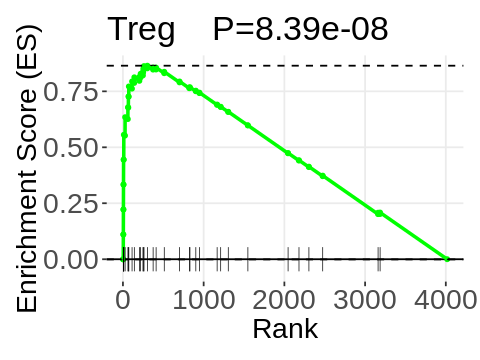

In [186]:
# pdf(file = '../Figures/GSEA_IL2RA_Treg.pdf', width = 4, height = 3)
pname = 'Treg_Gosia'

fig.size(3, 4)
p = plotEnrichment_mod(deg_pathways[[pname]],
                   ranks) + 
    labs(title=paste0(pname %>% str_split('_', n = 2) %>% map(1) %>% unlist, '    P=', 
       res[pname, 'padj'] %>% formatC(format = "e", digits = 2)) %>% str_replace_all('_', ' ')
        )
p

# dev.off()

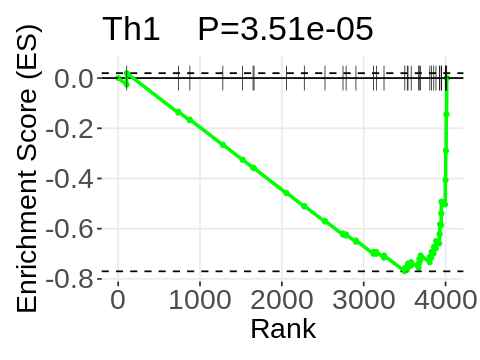

In [184]:
# pdf(file = '../Figures/GSEA_IL2RA_Th1.pdf', width = 4, height = 3)
pname = 'Th1_Gosia'

fig.size(3, 4)
p = plotEnrichment_mod(deg_pathways[[pname]],
                   ranks) + 
    labs(title=paste0(pname %>% str_split('_', n = 2) %>% map(1) %>% unlist, '    P=', 
       res[pname, 'padj'] %>% formatC(format = "e", digits = 2)) %>% str_replace_all('_', ' ')
        )
p

# dev.off()

# End

In [28]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /PHShome/mc1070/anaconda3/envs/seurat5_env/lib/libopenblasp-r0.3.27.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] fgsea_1.24.0            msigdbr_7.5.1           dendsort_0.3.4         
 [4] lubridate_1.9.3         forcats_1.0.0           stringr_1.5.1          
 [7] dplyr_1.1.4             purrr_1.0.2             readr_2.1.5            
[10] tidyr_1.3.1             tibble_3.2.1            ggplot2_3.